1. Download and unpack the files
2. Do EDA
    1. Count files
    2. Do EDA on the csv files
    3. Produce a couple of annotated per frame videos
3. Try SSD with pytorch

# 1. Download data, do initial EDA

## Download the files

In [1]:
import collections

file_dict = collections.OrderedDict()
file_dict['submission.csv'] = 'https://s3.amazonaws.com/drivendata/data/48/public/submission_format_zeros.csv'
file_dict['train.csv'] = 'https://s3.amazonaws.com/drivendata/data/48/public/training.csv'
file_dict['train.7z'] = 'https://s3.amazonaws.com/drivendata-public-assets/train_videos_2.7z'
file_dict['test.7z'] = 'https://s3.amazonaws.com/drivendata-public-assets/test_videos_2.7z'

In [2]:
for file,url in file_dict.items():
    url_q = "'" + url + "'"
    ! wget --continue --no-check-certificate --no-proxy -O $file $url_q

--2017-09-29 21:19:29--  https://s3.amazonaws.com/drivendata/data/48/public/submission_format_zeros.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.84.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.84.149|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2017-09-29 21:19:30--  https://s3.amazonaws.com/drivendata/data/48/public/training.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.72.170
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.72.170|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2017-09-29 21:19:31--  https://s3.amazonaws.com/drivendata-public-assets/train_videos_2.7z
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.86.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.86.53|:443... connected.
HTTP reque

## Unpack the files

In [4]:
! mkdir -p data
! mkdir -p data/train
! mkdir -p data/test

In [5]:
!ls -laht

total 95G
drwxrwxrwx  4  1001  1001 4.0K Oct  1 07:36 .
drwxr-xr-x  2 keras users 4.0K Oct  1 07:36 data
-rw-r--r--  1  1001  1001  28M Oct  1 07:35 keras_cars.ipynb
-rw-r--r--  1 keras users 8.8K Oct  1 07:35 fish_eda.ipynb
drwxr-xr-x 11 keras users 4.0K Sep 30 09:48 ..
-rw-r--r--  1 keras users  15K Sep 29 11:18 wget-log
drwxrwxrwx  2  1001  1001 4.0K Sep 29 11:12 .ipynb_checkpoints
-rw-r--r--  1 keras users  65G Sep  4 15:24 train.7z
-rw-r--r--  1 keras users  31G Sep  4 00:03 test.7z
-rw-r--r--  1 keras users 102M Aug 28 00:36 submission.csv
-rw-r--r--  1 keras users 4.5M Aug 25 01:49 train.csv


In [1]:
!7z x train.7z -aos


7-Zip [64] 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18
p7zip Version 9.20 (locale=C,Utf16=off,HugeFiles=on,8 CPUs)

Processing archive: train.7z

Extracting  train_videos
Skipping    train_videos/00WK7DR6FyPZ5u3A.json
Skipping    train_videos/00WK7DR6FyPZ5u3A.mp4
Skipping    train_videos/01wO3HNwawJYADQw.json
Skipping    train_videos/01wO3HNwawJYADQw.mp4
Skipping    train_videos/02p3Yn87z0b5grhL.json
Skipping    train_videos/02p3Yn87z0b5grhL.mp4
Skipping    train_videos/05RagNzyjVdXeUFR.json
Skipping    train_videos/05RagNzyjVdXeUFR.mp4
Skipping    train_videos/06aFbpjpYHVBLJZa.json
Skipping    train_videos/06aFbpjpYHVBLJZa.mp4
Skipping    train_videos/09GA0YdSz0NvJUJx.json
Skipping    train_videos/09GA0YdSz0NvJUJx.mp4
Skipping    train_videos/0D5zA3WRD5pXjr8j.json
Skipping    train_videos/0D5zA3WRD5pXjr8j.mp4
Skipping    train_videos/0EmM5wsVVNqaKNaM.json
Skipping    train_videos/0EmM5wsVVNqaKNaM.mp4
Skipping    train_videos/0L5wBDT4CEazgAw6.json
Skipping    train_videos/0L

Skipping    train_videos/4DWVfALdiot7VXrJ.mp4
Skipping    train_videos/4IP83ZpC040lKRFI.json
Skipping    train_videos/4IP83ZpC040lKRFI.mp4
Skipping    train_videos/4NCukDSWzGp1XEku.json
Skipping    train_videos/4NCukDSWzGp1XEku.mp4
Skipping    train_videos/4NKVYrWvsixku2l5.json
Skipping    train_videos/4NKVYrWvsixku2l5.mp4
Skipping    train_videos/4NhW1eXSsvKNaSER.json
Skipping    train_videos/4NhW1eXSsvKNaSER.mp4
Skipping    train_videos/4O5Yvo29zwuLeDkt.json
Skipping    train_videos/4O5Yvo29zwuLeDkt.mp4
Skipping    train_videos/4Sc7lKDpCbsFQnFW.json
Skipping    train_videos/4Sc7lKDpCbsFQnFW.mp4
Skipping    train_videos/4WdgKA2p9Hy3sJj0.json
Skipping    train_videos/4WdgKA2p9Hy3sJj0.mp4
Skipping    train_videos/4Zgr1BmaffX3LOLE.json
Skipping    train_videos/4Zgr1BmaffX3LOLE.mp4
Skipping    train_videos/4abznQY6wjUrwq4W.json
Skipping    train_videos/4abznQY6wjUrwq4W.mp4
Skipping    train_videos/4bZWNDwQP3mQv0dh.json
Skipping    train_videos/4bZWNDwQP3mQv0dh.mp4
Skipping    train_videos

Skipping    train_videos/8MCS5RriOnyYVz2Q.mp4
Skipping    train_videos/8MSU5HLAm7US3ttO.json
Skipping    train_videos/8MSU5HLAm7US3ttO.mp4
Skipping    train_videos/8T3gYIoChAcKOzSS.json
Skipping    train_videos/8T3gYIoChAcKOzSS.mp4
Skipping    train_videos/8YhBIQ7sM4bQGxou.json
Skipping    train_videos/8YhBIQ7sM4bQGxou.mp4
Skipping    train_videos/8aMecyGHa8Hjv93Z.json
Skipping    train_videos/8aMecyGHa8Hjv93Z.mp4
Skipping    train_videos/8deG29XGRpCApRIT.json
Skipping    train_videos/8deG29XGRpCApRIT.mp4
Skipping    train_videos/8e8qLnvb9Ga5dTEv.json
Skipping    train_videos/8e8qLnvb9Ga5dTEv.mp4
Skipping    train_videos/8ejClLRkkkBipdre.json
Skipping    train_videos/8ejClLRkkkBipdre.mp4
Skipping    train_videos/8gYAVBz4M1W8OfPM.json
Skipping    train_videos/8gYAVBz4M1W8OfPM.mp4
Skipping    train_videos/8jNWhpJA5PeGb2KD.json
Skipping    train_videos/8jNWhpJA5PeGb2KD.mp4
Skipping    train_videos/8kEvfvuB93YBqaOA.json
Skipping    train_videos/8kEvfvuB93YBqaOA.mp4
Skipping    train_videos

Skipping    train_videos/CItXD7AzyAOyNCXg.mp4
Skipping    train_videos/CNtkVDr2nlALVZ5f.json
Skipping    train_videos/CNtkVDr2nlALVZ5f.mp4
Skipping    train_videos/CRvhsDh3wHpkwQWP.json
Skipping    train_videos/CRvhsDh3wHpkwQWP.mp4
Skipping    train_videos/CS8agEW4hLbm2C5Z.json
Skipping    train_videos/CS8agEW4hLbm2C5Z.mp4
Skipping    train_videos/CVGA3bPW6pETOZcC.json
Skipping    train_videos/CVGA3bPW6pETOZcC.mp4
Skipping    train_videos/CVhcGFetxccENomv.json
Skipping    train_videos/CVhcGFetxccENomv.mp4
Skipping    train_videos/CXfE39CdzrrCR2xP.json
Skipping    train_videos/CXfE39CdzrrCR2xP.mp4
Skipping    train_videos/ChNdqhpHqMYIeKL7.json
Skipping    train_videos/ChNdqhpHqMYIeKL7.mp4
Skipping    train_videos/CiBCF5JM3h4uTEsZ.json
Skipping    train_videos/CiBCF5JM3h4uTEsZ.mp4
Skipping    train_videos/CpKIMVqhWkd8xQey.json
Skipping    train_videos/CpKIMVqhWkd8xQey.mp4
Skipping    train_videos/CqKGnnmc6C70FEGK.json
Skipping    train_videos/CqKGnnmc6C70FEGK.mp4
Skipping    train_videos

Skipping    train_videos/GrWP6WY358AlHiMr.mp4
Skipping    train_videos/GueE4caA0NkVJcN8.json
Skipping    train_videos/GueE4caA0NkVJcN8.mp4
Skipping    train_videos/Gx9k7yI07gHUmkpo.json
Skipping    train_videos/Gx9k7yI07gHUmkpo.mp4
Skipping    train_videos/GyAbrNg1Hq6UounP.json
Skipping    train_videos/GyAbrNg1Hq6UounP.mp4
Skipping    train_videos/GyyubMxuRD6NfcAv.json
Skipping    train_videos/GyyubMxuRD6NfcAv.mp4
Skipping    train_videos/GzAi3rGOo5UwSTEb.json
Skipping    train_videos/GzAi3rGOo5UwSTEb.mp4
Skipping    train_videos/H1QeZylO4sHsIEw8.json
Skipping    train_videos/H1QeZylO4sHsIEw8.mp4
Skipping    train_videos/H1sBF1TFGZLvzdGO.json
Skipping    train_videos/H1sBF1TFGZLvzdGO.mp4
Skipping    train_videos/H2zHzLj7SqtAf9Lv.json
Skipping    train_videos/H2zHzLj7SqtAf9Lv.mp4
Skipping    train_videos/H4iNxXelJnbdFzwm.json
Skipping    train_videos/H4iNxXelJnbdFzwm.mp4
Skipping    train_videos/H9OlISchjgudjSUa.json
Skipping    train_videos/H9OlISchjgudjSUa.mp4
Skipping    train_videos

Skipping    train_videos/KrvLjV1NRcD03c0p.mp4
Skipping    train_videos/KxOtzGLV9wZFsNyZ.json
Skipping    train_videos/KxOtzGLV9wZFsNyZ.mp4
Skipping    train_videos/KypGOVQ927hbsAbb.json
Skipping    train_videos/KypGOVQ927hbsAbb.mp4
Skipping    train_videos/L0FOxl8gFfXGoKFC.json
Skipping    train_videos/L0FOxl8gFfXGoKFC.mp4
Skipping    train_videos/L383eUgg0m4eR4pa.json
Skipping    train_videos/L383eUgg0m4eR4pa.mp4
Skipping    train_videos/L5y8NPQeEPg5Uuv8.json
Skipping    train_videos/L5y8NPQeEPg5Uuv8.mp4
Skipping    train_videos/LGOKZh6yN4Zs7A4c.json
Skipping    train_videos/LGOKZh6yN4Zs7A4c.mp4
Skipping    train_videos/LHnuBthdZMq5ukhm.json
Skipping    train_videos/LHnuBthdZMq5ukhm.mp4
Skipping    train_videos/LJvIMJBNFjAE64zH.json
Skipping    train_videos/LJvIMJBNFjAE64zH.mp4
Skipping    train_videos/LK4EptUPPyJDZExB.json
Skipping    train_videos/LK4EptUPPyJDZExB.mp4
Skipping    train_videos/LKTGmXlB8y9Ehchg.json
Skipping    train_videos/LKTGmXlB8y9Ehchg.mp4
Skipping    train_videos

Skipping    train_videos/P9lVRcIdhvYMOeww.mp4
Skipping    train_videos/PKLOvLUi9nzbk7Ss.json
Skipping    train_videos/PKLOvLUi9nzbk7Ss.mp4
Skipping    train_videos/PKgZlVK385tUaNbL.json
Skipping    train_videos/PKgZlVK385tUaNbL.mp4
Skipping    train_videos/PKwfhx6ZghkJBkZ8.json
Skipping    train_videos/PKwfhx6ZghkJBkZ8.mp4
Skipping    train_videos/PRXYnZo7W5Ig6DyJ.json
Skipping    train_videos/PRXYnZo7W5Ig6DyJ.mp4
Skipping    train_videos/PTFXNH730qHCREYa.json
Skipping    train_videos/PTFXNH730qHCREYa.mp4
Skipping    train_videos/PUvCBNUtF29Mqv8K.json
Skipping    train_videos/PUvCBNUtF29Mqv8K.mp4
Skipping    train_videos/PW05hc3ObtluSXmp.json
Skipping    train_videos/PW05hc3ObtluSXmp.mp4
Skipping    train_videos/PWzLgr0j72Is45ZH.json
Skipping    train_videos/PWzLgr0j72Is45ZH.mp4
Skipping    train_videos/Pd4CfSGpq3ZpPgZO.json
Skipping    train_videos/Pd4CfSGpq3ZpPgZO.mp4
Skipping    train_videos/PgaT8jKLff2CSDDM.json
Skipping    train_videos/PgaT8jKLff2CSDDM.mp4
Skipping    train_videos

Skipping    train_videos/TTrzQsP2lVgg7LXN.mp4
Skipping    train_videos/TgGJcVmd1q4XqYly.json
Skipping    train_videos/TgGJcVmd1q4XqYly.mp4
Skipping    train_videos/TgcmU5M9hG2y0mfI.json
Skipping    train_videos/TgcmU5M9hG2y0mfI.mp4
Skipping    train_videos/TgnZKghB5OdswNYO.json
Skipping    train_videos/TgnZKghB5OdswNYO.mp4
Skipping    train_videos/TiB8pIxeitKehR3w.json
Skipping    train_videos/TiB8pIxeitKehR3w.mp4
Skipping    train_videos/TkT5pxs5QB19tmwY.json
Skipping    train_videos/TkT5pxs5QB19tmwY.mp4
Skipping    train_videos/TnMsQsIKGAeLQyxp.json
Skipping    train_videos/TnMsQsIKGAeLQyxp.mp4
Skipping    train_videos/TnucjZr0tw8xYcfN.json
Skipping    train_videos/TnucjZr0tw8xYcfN.mp4
Skipping    train_videos/ToVEf2JhGuOjX2Ei.json
Skipping    train_videos/ToVEf2JhGuOjX2Ei.mp4
Skipping    train_videos/TxY5feWs6qler9fU.json
Skipping    train_videos/TxY5feWs6qler9fU.mp4
Skipping    train_videos/TzNJHyexu243juzo.json
Skipping    train_videos/TzNJHyexu243juzo.mp4
Skipping    train_videos

Skipping    train_videos/XZJcVaW0pgyvcLuK.mp4
Skipping    train_videos/XZNS08O2RZ4WsstV.json
Skipping    train_videos/XZNS08O2RZ4WsstV.mp4
Skipping    train_videos/Xa5h0UHsebovR5YS.json
Skipping    train_videos/Xa5h0UHsebovR5YS.mp4
Skipping    train_videos/XeYkpqg4zaFYwt52.json
Skipping    train_videos/XeYkpqg4zaFYwt52.mp4
Skipping    train_videos/Xhe0Dnj1hCcA10G3.json
Skipping    train_videos/Xhe0Dnj1hCcA10G3.mp4
Skipping    train_videos/XjTAbQ5JYE3ZTAij.json
Skipping    train_videos/XjTAbQ5JYE3ZTAij.mp4
Skipping    train_videos/XpuBGlgrg123Vki0.json
Skipping    train_videos/XpuBGlgrg123Vki0.mp4
Skipping    train_videos/Xqve6YVtu5o2aLx7.json
Skipping    train_videos/Xqve6YVtu5o2aLx7.mp4
Skipping    train_videos/XsKT5O5hS44Cjbk1.json
Skipping    train_videos/XsKT5O5hS44Cjbk1.mp4
Skipping    train_videos/XwJe4QR1dSd1SYrx.json
Skipping    train_videos/XwJe4QR1dSd1SYrx.mp4
Skipping    train_videos/XyN2nOs2Qdta7Ssa.json
Skipping    train_videos/XyN2nOs2Qdta7Ssa.mp4
Skipping    train_videos

Extracting  train_videos/bVDl6n0FVPkZAP8r.mp4
Extracting  train_videos/bcLVRsuGEh7qKoqP.json
Extracting  train_videos/bcLVRsuGEh7qKoqP.mp4
Extracting  train_videos/bdICF8cW75m1XYda.json
Extracting  train_videos/bdICF8cW75m1XYda.mp4
Extracting  train_videos/bh8CIHLpAoD55Crh.json
Extracting  train_videos/bh8CIHLpAoD55Crh.mp4
Extracting  train_videos/biqPLlfYZMsmBfuh.json
Extracting  train_videos/biqPLlfYZMsmBfuh.mp4
Extracting  train_videos/bjjn12E3GpKHWaut.json
Extracting  train_videos/bjjn12E3GpKHWaut.mp4
Extracting  train_videos/bmJnaghZKsZvV3Xg.json
Extracting  train_videos/bmJnaghZKsZvV3Xg.mp4
Extracting  train_videos/bprw5ZtLFVCsEMqJ.json
Extracting  train_videos/bprw5ZtLFVCsEMqJ.mp4
Extracting  train_videos/c5cYC6hj3ak82B9J.json
Extracting  train_videos/c5cYC6hj3ak82B9J.mp4
Extracting  train_videos/c6LxOP8KhwkxRu3Q.json
Extracting  train_videos/c6LxOP8KhwkxRu3Q.mp4
Extracting  train_videos/cCnJ9uFsReHdddV8.json
Extracting  train_videos/cCnJ9uFsReHdddV8.mp4
Extracting  train_videos

Extracting  train_videos/fnMMmqzB1tuXOeFG.mp4
Extracting  train_videos/fyCjmImOCTCXxMqA.json
Extracting  train_videos/fyCjmImOCTCXxMqA.mp4
Extracting  train_videos/fzpXNeOPJJQTGU92.json
Extracting  train_videos/fzpXNeOPJJQTGU92.mp4
Extracting  train_videos/g20frO7o4oL4WUK2.json
Extracting  train_videos/g20frO7o4oL4WUK2.mp4
Extracting  train_videos/g2vyEOn85EHdahlD.json
Extracting  train_videos/g2vyEOn85EHdahlD.mp4
Extracting  train_videos/g3W3rFm3gtDp8a0N.json
Extracting  train_videos/g3W3rFm3gtDp8a0N.mp4
Extracting  train_videos/g47AqlrjCMedT06O.json
Extracting  train_videos/g47AqlrjCMedT06O.mp4
Extracting  train_videos/g6Bd5D4cwMrlrkxU.json
Extracting  train_videos/g6Bd5D4cwMrlrkxU.mp4
Extracting  train_videos/g6Z02drZIh6EglIQ.json
Extracting  train_videos/g6Z02drZIh6EglIQ.mp4
Extracting  train_videos/g8aE1hoM7F3ZagnV.json
Extracting  train_videos/g8aE1hoM7F3ZagnV.mp4
Extracting  train_videos/gCVzzDADdbtDfQyY.json
Extracting  train_videos/gCVzzDADdbtDfQyY.mp4
Extracting  train_videos

Extracting  train_videos/kkgmU9jIbMvalRGR.mp4
Extracting  train_videos/klCzRNGHLLyRgvlK.json
Extracting  train_videos/klCzRNGHLLyRgvlK.mp4
Extracting  train_videos/kn9827svBOt6iofZ.json
Extracting  train_videos/kn9827svBOt6iofZ.mp4
Extracting  train_videos/kp8ZZJahmm7EHtST.json
Extracting  train_videos/kp8ZZJahmm7EHtST.mp4
Extracting  train_videos/ksQxueYehwE6JoBJ.json
Extracting  train_videos/ksQxueYehwE6JoBJ.mp4
Extracting  train_videos/kuPQpdrJKweJ9ICq.json
Extracting  train_videos/kuPQpdrJKweJ9ICq.mp4
Extracting  train_videos/kuqnx8qClSpHCpuV.json
Extracting  train_videos/kuqnx8qClSpHCpuV.mp4
Extracting  train_videos/kxNluuiAHNU7ZE04.json
Extracting  train_videos/kxNluuiAHNU7ZE04.mp4
Extracting  train_videos/kyHRmnD4puFu9mjW.json
Extracting  train_videos/kyHRmnD4puFu9mjW.mp4
Extracting  train_videos/l3tVQfK4cOTiMNfF.json
Extracting  train_videos/l3tVQfK4cOTiMNfF.mp4
Extracting  train_videos/l5UNSp5AJ4oyPjTv.json
Extracting  train_videos/l5UNSp5AJ4oyPjTv.mp4
Extracting  train_videos

Extracting  train_videos/ohmsZtc24HhvTHtO.mp4
Extracting  train_videos/oj2czljsHCPdfd12.json
Extracting  train_videos/oj2czljsHCPdfd12.mp4
Extracting  train_videos/oj9L06dTqbmN55sM.json
Extracting  train_videos/oj9L06dTqbmN55sM.mp4
Extracting  train_videos/ojg6m1Wi7c6XExH1.json
Extracting  train_videos/ojg6m1Wi7c6XExH1.mp4
Extracting  train_videos/opS1KPdUFend3Sql.json
Extracting  train_videos/opS1KPdUFend3Sql.mp4
Extracting  train_videos/opkTSJprjPD33Z0N.json
Extracting  train_videos/opkTSJprjPD33Z0N.mp4
Extracting  train_videos/oqPNUxwR4ENX81eE.json
Extracting  train_videos/oqPNUxwR4ENX81eE.mp4
Extracting  train_videos/osofmdpmXYeMDqs5.json
Extracting  train_videos/osofmdpmXYeMDqs5.mp4
Extracting  train_videos/ovCuSiaV63wAzuau.json
Extracting  train_videos/ovCuSiaV63wAzuau.mp4
Extracting  train_videos/oycjO8Zb0jDJcYI9.json
Extracting  train_videos/oycjO8Zb0jDJcYI9.mp4
Extracting  train_videos/oysGFZ0JNAcUy4lS.json
Extracting  train_videos/oysGFZ0JNAcUy4lS.mp4
Extracting  train_videos

Extracting  train_videos/rvoz7DsYrO573ThU.mp4
Extracting  train_videos/rx5eYAjD6hoqVwFk.json
Extracting  train_videos/rx5eYAjD6hoqVwFk.mp4
Extracting  train_videos/rxdZATIBPKXlqefE.json
Extracting  train_videos/rxdZATIBPKXlqefE.mp4
Extracting  train_videos/s30IMW02HL7qXU4U.json
Extracting  train_videos/s30IMW02HL7qXU4U.mp4
Extracting  train_videos/s7xDXsnwDl4ibI7S.json
Extracting  train_videos/s7xDXsnwDl4ibI7S.mp4
Extracting  train_videos/sHZf4ZdtCmeftvgE.json
Extracting  train_videos/sHZf4ZdtCmeftvgE.mp4
Extracting  train_videos/sMQzxniwNUbcMfPO.json
Extracting  train_videos/sMQzxniwNUbcMfPO.mp4
Extracting  train_videos/sNwCySda2sNwgWqk.json
Extracting  train_videos/sNwCySda2sNwgWqk.mp4
Extracting  train_videos/sODMwXVAAXuGj3zJ.json
Extracting  train_videos/sODMwXVAAXuGj3zJ.mp4
Extracting  train_videos/sOw8Ly9DPUEWR275.json
Extracting  train_videos/sOw8Ly9DPUEWR275.mp4
Extracting  train_videos/sRfLl8tpxuleUliw.json
Extracting  train_videos/sRfLl8tpxuleUliw.mp4
Extracting  train_videos

Extracting  train_videos/vyPxUXXE9MMj1QEL.mp4
Extracting  train_videos/vyU0KvvC9x4mPqVW.json
Extracting  train_videos/vyU0KvvC9x4mPqVW.mp4
Extracting  train_videos/vzoBRJvJH85tHIlE.json
Extracting  train_videos/vzoBRJvJH85tHIlE.mp4
Extracting  train_videos/w8qhA8iEiCIWEFtu.json
Extracting  train_videos/w8qhA8iEiCIWEFtu.mp4
Extracting  train_videos/wCNVd56vGUT2Otlw.json
Extracting  train_videos/wCNVd56vGUT2Otlw.mp4
Extracting  train_videos/wJ11HALwhBtFOxdF.json
Extracting  train_videos/wJ11HALwhBtFOxdF.mp4
Extracting  train_videos/wONt21oBFjAVKaZZ.json
Extracting  train_videos/wONt21oBFjAVKaZZ.mp4
Extracting  train_videos/wOOxOeyoVSnGVZSc.json
Extracting  train_videos/wOOxOeyoVSnGVZSc.mp4
Extracting  train_videos/waniFJ2104uj39iH.json
Extracting  train_videos/waniFJ2104uj39iH.mp4
Extracting  train_videos/wldMGL8ri5InJx6n.json
Extracting  train_videos/wldMGL8ri5InJx6n.mp4
Extracting  train_videos/wogKSSoem0aGtV3O.json
Extracting  train_videos/wogKSSoem0aGtV3O.mp4
Extracting  train_videos

In [2]:
!7z x test.7z -aos


7-Zip [64] 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18
p7zip Version 9.20 (locale=C,Utf16=off,HugeFiles=on,8 CPUs)

Processing archive: test.7z

Extracting  test_videos
Extracting  test_videos/01rFQwp0fqXLHg33.mp4
Extracting  test_videos/09WWcMSr5nbKk0lb.mp4
Extracting  test_videos/0EPdNQih279jPD8l.mp4
Extracting  test_videos/0G2cbTLjL7ktv4xM.mp4
Extracting  test_videos/0HrP0OiBI4sYCcCV.mp4
Extracting  test_videos/0L9psFjXfbRyaP9V.mp4
Extracting  test_videos/0QX98Q3xbQ8rxzu0.mp4
Extracting  test_videos/0S574yg8PXJcq9SM.mp4
Extracting  test_videos/0VuUJYLwKseiQmsU.mp4
Extracting  test_videos/0i5cuMc2D5KY93fK.mp4
Extracting  test_videos/0yilxxOP7NwX93ra.mp4
Extracting  test_videos/1E23Y5mgwCYHvOX8.mp4
Extracting  test_videos/1EoL3Gz9JNh20rXZ.mp4
Extracting  test_videos/1FD6KMzZdHSmJXyd.mp4
Extracting  test_videos/1G1GuHQekKba2TR5.mp4
Extracting  test_videos/1HeH70lWudoAoTpw.mp4
Extracting  test_videos/1OWjeqszOHU6tGNG.mp4
Extracting  test_videos/1XhbDiNACzoorjKS.mp4
Extracting

Extracting  test_videos/H26FYlOdfrBZCX8v.mp4
Extracting  test_videos/H2M2D4gNMSle6B6g.mp4
Extracting  test_videos/H90kxDoKX4cwv7aA.mp4
Extracting  test_videos/HCT3CRHtuPvA5cAR.mp4
Extracting  test_videos/HE3HSdkzUmJVMu8b.mp4
Extracting  test_videos/HJgNmWDiiAFfBaHn.mp4
Extracting  test_videos/HKFWFV0AJs4idAqR.mp4
Extracting  test_videos/HNvBjH12jXi5ObbY.mp4
Extracting  test_videos/HQ8W7z7FZLYxzXpR.mp4
Extracting  test_videos/HWUIdlAOuFpY7WUs.mp4
Extracting  test_videos/Hbmd20ZAIpNEXdfv.mp4
Extracting  test_videos/HjSJpApSrTlhVhZ8.mp4
Extracting  test_videos/HkD2oT1RF8RKYKB4.mp4
Extracting  test_videos/Hl18X13GqHzGCKtJ.mp4
Extracting  test_videos/Hq3Dj74bj41uq3FS.mp4
Extracting  test_videos/HzzxlcLRJPkjeGgx.mp4
Extracting  test_videos/I5NWqHdBgn8e8rCa.mp4
Extracting  test_videos/I7LgwFm5syuVdaL8.mp4
Extracting  test_videos/IRnY1dwoqBrG0BoY.mp4
Extracting  test_videos/IdNBjY9VV2W7Khq0.mp4
Extracting  test_videos/Ih1UtQxBeVmgbrPf.mp4
Extracting  test_videos/Iibo9b0ChvbC06qq.mp4
Extracting

Extracting  test_videos/YLPpw0VWhtjDYnqM.mp4
Extracting  test_videos/YOEHWRUtbrC3pAik.mp4
Extracting  test_videos/YYLPygGBVzjyux42.mp4
Extracting  test_videos/YcaLUNnd6nOI9USh.mp4
Extracting  test_videos/YkDKu3Oaes0Y6sIA.mp4
Extracting  test_videos/YmHHHnNiOnkg1fi0.mp4
Extracting  test_videos/YmvuPBvowIPLtrpA.mp4
Extracting  test_videos/YtiNfXUcUZUCSfOP.mp4
Extracting  test_videos/ZAKosyPYJFptY7wk.mp4
Extracting  test_videos/ZGYwO6DPgzSY4o8t.mp4
Extracting  test_videos/ZPbyZj8y7DnyCQ1Q.mp4
Extracting  test_videos/ZU6XtvFk0UMrHLEL.mp4
Extracting  test_videos/ZWhjMGsQagEQyKw4.mp4
Extracting  test_videos/ZjzVRo7gTHBqinWK.mp4
Extracting  test_videos/ZpRnoz8h1OSTlbrG.mp4
Extracting  test_videos/ZtuEqQbZV15Fgexj.mp4
Extracting  test_videos/ZuUXSVYizhuz6GRl.mp4
Extracting  test_videos/Zx4sYm4mNgSiE4Ef.mp4
Extracting  test_videos/a0qvsW1C4uB6cmWD.mp4
Extracting  test_videos/a3kyag6Imn5zVm7S.mp4
Extracting  test_videos/a6IWENlQ6ExIF1L7.mp4
Extracting  test_videos/a9z9b82vKoW0zBwD.mp4
Extracting

Extracting  test_videos/o6mtuGTjkowreRCT.mp4
Extracting  test_videos/o73vJhIcWsXbHLre.mp4
Extracting  test_videos/oMCINwZ5qCUNPfY9.mp4
Extracting  test_videos/oR0Vh9XIXDviiXmW.mp4
Extracting  test_videos/oRAKfcmph8WWzYa8.mp4
Extracting  test_videos/ofGUH80fFl1bhed1.mp4
Extracting  test_videos/ojrRDZ0LnLkJZWiN.mp4
Extracting  test_videos/okeKJQU2Pz527yp7.mp4
Extracting  test_videos/on1XUl2zy2vCfSMq.mp4
Extracting  test_videos/orSCQHEURXzZQOdm.mp4
Extracting  test_videos/ozIB1viWOgtbrAFZ.mp4
Extracting  test_videos/p6kWHz4JgirZnT8C.mp4
Extracting  test_videos/pGd0FSJQcDH5DI8x.mp4
Extracting  test_videos/pVYIojRdjdNXRc8J.mp4
Extracting  test_videos/pVkg7szc2eZ7yM3k.mp4
Extracting  test_videos/pWchuFC5ZGsg2lQd.mp4
Extracting  test_videos/pt9Yoqt30gc4LHfx.mp4
Extracting  test_videos/pyPxSO6xOgHEE92t.mp4
Extracting  test_videos/q6BQFidOnRW90KJu.mp4
Extracting  test_videos/qBpkwXKcx2uXgNjY.mp4
Extracting  test_videos/qDyRTEYfTf07mKLC.mp4
Extracting  test_videos/qUXoG9qx8aMXD5Tr.mp4
Extracting

## Convert the train images to files and check vs train labels

In [6]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

row_id          video_id  frame  fish_number    length     x1     y1  \
0       0  00WK7DR6FyPZ5u3A      0          1.0  165.3028  766.0  531.0   
1       1  00WK7DR6FyPZ5u3A     18          2.0  176.5814  776.0  540.0   
2       2  00WK7DR6FyPZ5u3A     41          3.0  172.4297  772.0  538.0   
3       3  00WK7DR6FyPZ5u3A     63          4.0  166.6433  770.0  531.0   
4       4  00WK7DR6FyPZ5u3A     82          5.0  177.8820  777.0  544.0   

      x2     y2  species_fourspot  species_grey sole  species_other  \
0  659.0  405.0                 0                  1              0   
1  661.0  406.0                 0                  1              0   
2  666.0  402.0                 0                  1              0   
3  667.0  400.0                 0                  1              0   
4  666.0  405.0                 0                  1              0   

   species_plaice  species_summer  species_windowpane  species_winter  
0               0               0                   0               0  
1               0               0                   0               0  
2               0               0                   0               0  
3               0               0                   0               0  
4               0               0                   0               0

In [7]:
df[df.video_id == '00WK7DR6FyPZ5u3A']

row_id          video_id  frame  fish_number    length     x1     y1  \
0        0  00WK7DR6FyPZ5u3A      0          1.0  165.3028  766.0  531.0   
1        1  00WK7DR6FyPZ5u3A     18          2.0  176.5814  776.0  540.0   
2        2  00WK7DR6FyPZ5u3A     41          3.0  172.4297  772.0  538.0   
3        3  00WK7DR6FyPZ5u3A     63          4.0  166.6433  770.0  531.0   
4        4  00WK7DR6FyPZ5u3A     82          5.0  177.8820  777.0  544.0   
5        5  00WK7DR6FyPZ5u3A    100          6.0  161.4435  763.0  527.0   
6        6  00WK7DR6FyPZ5u3A    115          NaN       NaN    NaN    NaN   
7        7  00WK7DR6FyPZ5u3A    123          7.0  181.6865  777.0  543.0   
8        8  00WK7DR6FyPZ5u3A    142          8.0  206.4655  789.0  563.0   
9        9  00WK7DR6FyPZ5u3A    160          9.0  197.0913  783.0  556.0   
10      10  00WK7DR6FyPZ5u3A    180         10.0  170.8567  764.0  543.0   
11      11  00WK7DR6FyPZ5u3A    198         11.0  142.9475  755.0  512.0   
12      12  00WK7DR6FyPZ5u3A    236         12.0  199.7523  784.0  558.0   
13      13  00WK7DR6FyPZ5u3A    259         13.0  197.3069  788.0  555.0   
14      14  00WK7DR6FyPZ5u3A    279         14.0  205.8009  786.0  569.0   
15      15  00WK7DR6FyPZ5u3A    299         15.0  169.6143  766.0  542.0   
16      16  00WK7DR6FyPZ5u3A    318         16.0  169.4255  773.0  532.0   
17      17  00WK7DR6FyPZ5u3A    345         17.0  155.9006  755.0  530.0   
18      18  00WK7DR6FyPZ5u3A    377         18.0  177.4289  772.0  546.0   
19      19  00WK7DR6FyPZ5u3A    400         19.0  177.8820  779.0  540.0   
20      20  00WK7DR6FyPZ5u3A    422         20.0  155.5699  773.0  518.0   
21      21  00WK7DR6FyPZ5u3A    440         21.0  176.9548  774.0  542.0   
22      22  00WK7DR6FyPZ5u3A    464         22.0   99.0202  723.0  487.0   
23      23  00WK7DR6FyPZ5u3A    489         23.0  168.5052  771.0  533.0   
24      24  00WK7DR6FyPZ5u3A    522         24.0   72.3464  712.0  459.0   
25      25  00WK7DR6FyPZ5u3A    537          NaN       NaN    NaN    NaN   
26      26  00WK7DR6FyPZ5u3A    556         25.0  166.4242  773.0  529.0   

       x2     y2  species_fourspot  species_grey sole  species_other  \
0   659.0  405.0                 0                  1              0   
1   661.0  406.0                 0                  1              0   
2   666.0  402.0                 0                  1              0   
3   667.0  400.0                 0                  1              0   
4   666.0  405.0                 0                  1              0   
5   655.0  407.0                 0                  1              0   
6     NaN    NaN                 0                  0              0   
7   660.0  404.0                 0                  1              0   
8   661.0  401.0                 0                  1              0   
9   660.0  402.0                 0                  1              0   
10  658.0  409.0                 0                  1              0   
11  658.0  407.0                 0                  1              0   
12  658.0  403.0                 0                  1              0   
13  661.0  404.0                 0                  1              0   
14  663.0  404.0                 0                  1              0   
15  666.0  405.0                 0                  1              0   
16  662.0  404.0                 0                  1              0   
17  666.0  402.0                 0                  1              0   
18  663.0  406.0                 0                  1              0   
19  668.0  401.0                 0                  1              0   
20  662.0  409.0                 0                  1              0   
21  662.0  405.0                 0                  1              0   
22  662.0  409.0                 0                  1              0   
23  658.0  408.0                 0                  1              0   
24  665.0  404.0                 0                  0              1   
25 

In [8]:
! ls

fish_eda.ipynb	  submission.csv  train.csv	wget-log
keras_cars.ipynb  test_videos	  train_videos


In [9]:
!ls train_videos | head

00WK7DR6FyPZ5u3A.json
00WK7DR6FyPZ5u3A.mp4
01wO3HNwawJYADQw.json
01wO3HNwawJYADQw.mp4
02p3Yn87z0b5grhL.json
02p3Yn87z0b5grhL.mp4
05RagNzyjVdXeUFR.json
05RagNzyjVdXeUFR.mp4
06aFbpjpYHVBLJZa.json
06aFbpjpYHVBLJZa.mp4
ls: write error: Broken pipe


In [13]:
import json
import pprint

with open('train_videos/00WK7DR6FyPZ5u3A.json') as json_data:
    d = json.load(json_data)

    
    pp = pprint.PrettyPrinter(depth=6)
    pp.pprint(d)

{'detections': [{'frame': '0',
                 'h': '405',
                 'id': '1',
                 'prob': '1.0',
                 'species': 'FLAT',
                 'type': 'line',
                 'w': '659',
                 'x': '766',
                 'y': '531'},
                {'frame': '18',
                 'h': '406',
                 'id': '2',
                 'prob': '1.0',
                 'species': 'FLAT',
                 'type': 'line',
                 'w': '661',
                 'x': '776',
                 'y': '540'},
                {'frame': '41',
                 'h': '402',
                 'id': '3',
                 'prob': '1.0',
                 'species': 'FLAT',
                 'type': 'line',
                 'w': '666',
                 'x': '772',
                 'y': '538'},
                {'frame': '63',
                 'h': '400',
                 'id': '4',
                 'prob': '1.0',
                 'species': 'FLAT',
          

In [48]:
import glob

g = glob.glob('train_videos/*.mp4')
g.sort()

In [49]:
g

['train_videos/00WK7DR6FyPZ5u3A.mp4',
 'train_videos/01wO3HNwawJYADQw.mp4',
 'train_videos/02p3Yn87z0b5grhL.mp4',
 'train_videos/05RagNzyjVdXeUFR.mp4',
 'train_videos/06aFbpjpYHVBLJZa.mp4',
 'train_videos/09GA0YdSz0NvJUJx.mp4',
 'train_videos/0D5zA3WRD5pXjr8j.mp4',
 'train_videos/0EmM5wsVVNqaKNaM.mp4',
 'train_videos/0L5wBDT4CEazgAw6.mp4',
 'train_videos/0QAlqRiUad7xcB9k.mp4',
 'train_videos/0RBt5mjWuPIpTlAq.mp4',
 'train_videos/0S3x7rSjWlcdVULR.mp4',
 'train_videos/0TmU6uLOCJQDb8Ju.mp4',
 'train_videos/0Vn7LRp72VjFggGy.mp4',
 'train_videos/0YA78pqMbqAs1Mk3.mp4',
 'train_videos/0YsfhFfuq7HoPOJx.mp4',
 'train_videos/0ZoXfnjB82Q7Kyq1.mp4',
 'train_videos/0agWG0Rmk8SIeSsf.mp4',
 'train_videos/0fI0yACOinj2bEBy.mp4',
 'train_videos/0n671B0EAA03ki6A.mp4',
 'train_videos/0wDNYLUdgepveUqr.mp4',
 'train_videos/0xJRvZlYaS9MgdGw.mp4',
 'train_videos/15BJl5UY1mIOryI1.mp4',
 'train_videos/18SCfijb56F6l4dR.mp4',
 'train_videos/1C1Rpz3r3WwKl0Y4.mp4',
 'train_videos/1DNPTfbb4A9cinjB.mp4',
 'train_vide

In [19]:
!mkdir -p train_pics
!mkdir -p valid_pics
!mkdir -p test_pics

In [112]:
f = 'train_videos/00WK7DR6FyPZ5u3A.mp4'
!ffmpeg -i $f -vsync 0 -qscale:v 2 train_pics/%04d.jpg

ffmpeg version 2.8.11-0ubuntu0.16.04.1 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.4) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e

In [50]:
g = glob.glob('train_pics/*.jpg')
g.sort()
g

['train_pics/0001.jpg',
 'train_pics/0002.jpg',
 'train_pics/0003.jpg',
 'train_pics/0004.jpg',
 'train_pics/0005.jpg',
 'train_pics/0006.jpg',
 'train_pics/0007.jpg',
 'train_pics/0008.jpg',
 'train_pics/0009.jpg',
 'train_pics/0010.jpg',
 'train_pics/0011.jpg',
 'train_pics/0012.jpg',
 'train_pics/0013.jpg',
 'train_pics/0014.jpg',
 'train_pics/0015.jpg',
 'train_pics/0016.jpg',
 'train_pics/0017.jpg',
 'train_pics/0018.jpg',
 'train_pics/0019.jpg',
 'train_pics/0020.jpg',
 'train_pics/0021.jpg',
 'train_pics/0022.jpg',
 'train_pics/0023.jpg',
 'train_pics/0024.jpg',
 'train_pics/0025.jpg',
 'train_pics/0026.jpg',
 'train_pics/0027.jpg',
 'train_pics/0028.jpg',
 'train_pics/0029.jpg',
 'train_pics/0030.jpg',
 'train_pics/0031.jpg',
 'train_pics/0032.jpg',
 'train_pics/0033.jpg',
 'train_pics/0034.jpg',
 'train_pics/0035.jpg',
 'train_pics/0036.jpg',
 'train_pics/0037.jpg',
 'train_pics/0038.jpg',
 'train_pics/0039.jpg',
 'train_pics/0040.jpg',
 'train_pics/0041.jpg',
 'train_pics/004

In [61]:
import cv2

def draw_box(image,xmin,ymin,xmax,ymax,label):
    

    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (255,0,0), 2)
    cv2.putText(image, label, 
                (xmin, ymin + 16), 
                0, 
                1e-3 * image.shape[0], 
                (255,0,0), 2)
        
    return image  

In [28]:
import cv2

def draw_boxes(image, boxes, labels):
    
    for box in boxes:
        cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (255,0,0), 2)
        cv2.putText(image, labels[box.get_label()] + ' ' + str(box.get_score()), 
                    (xmin, ymin + 16), 
                    0, 
                    1e-3 * image.shape[0], 
                    (255,0,0), 2)
        
    return image  

In [33]:
g

['train_pics/0227.jpg',
 'train_pics/0164.jpg',
 'train_pics/0048.jpg',
 'train_pics/0514.jpg',
 'train_pics/0403.jpg',
 'train_pics/0087.jpg',
 'train_pics/0104.jpg',
 'train_pics/0488.jpg',
 'train_pics/0528.jpg',
 'train_pics/0411.jpg',
 'train_pics/0478.jpg',
 'train_pics/0494.jpg',
 'train_pics/0278.jpg',
 'train_pics/0304.jpg',
 'train_pics/0388.jpg',
 'train_pics/0138.jpg',
 'train_pics/0059.jpg',
 'train_pics/0537.jpg',
 'train_pics/0347.jpg',
 'train_pics/0431.jpg',
 'train_pics/0369.jpg',
 'train_pics/0054.jpg',
 'train_pics/0542.jpg',
 'train_pics/0523.jpg',
 'train_pics/0358.jpg',
 'train_pics/0440.jpg',
 'train_pics/0360.jpg',
 'train_pics/0003.jpg',
 'train_pics/0404.jpg',
 'train_pics/0142.jpg',
 'train_pics/0110.jpg',
 'train_pics/0459.jpg',
 'train_pics/0153.jpg',
 'train_pics/0065.jpg',
 'train_pics/0345.jpg',
 'train_pics/0518.jpg',
 'train_pics/0482.jpg',
 'train_pics/0429.jpg',
 'train_pics/0050.jpg',
 'train_pics/0334.jpg',
 'train_pics/0011.jpg',
 'train_pics/008

In [51]:
(g[0].split('/')[1].split('.')[0])

'0001'

In [106]:
data = df[(df.video_id == '00WK7DR6FyPZ5u3A') & (df.frame == int(g[1].split('/')[1].split('.')[0])-1)][['x1','y1','x2','y2']].values
data.shape[0]

0

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 0
for image in g:
    
    data = df[(df.video_id == '00WK7DR6FyPZ5u3A') & (df.frame == int(g[i].split('/')[1].split('.')[0])-1)][['x1','y1','x2','y2']].values 

    if data.shape[0]>0:
        data = data[0]
        print(data)
        try:
            img = cv2.imread(image) 
            img = draw_box(img,int(data[2]),int(data[3]),int(data[0]),int(data[1]),'fish')
            cv2.imwrite(image, img)
        except:
            print ('na row')
    i += 1

[ 766.  531.  659.  405.]
[ 776.  540.  661.  406.]
[ 772.  538.  666.  402.]
[ 770.  531.  667.  400.]
[ 777.  544.  666.  405.]
[ 763.  527.  655.  407.]
[ nan  nan  nan  nan]
na row
[ 777.  543.  660.  404.]
[ 789.  563.  661.  401.]
[ 783.  556.  660.  402.]
[ 764.  543.  658.  409.]
[ 755.  512.  658.  407.]
[ 784.  558.  658.  403.]
[ 788.  555.  661.  404.]
[ 786.  569.  663.  404.]
[ 766.  542.  666.  405.]
[ 773.  532.  662.  404.]
[ 755.  530.  666.  402.]
[ 772.  546.  663.  406.]
[ 779.  540.  668.  401.]
[ 773.  518.  662.  409.]
[ 774.  542.  662.  405.]
[ 723.  487.  662.  409.]
[ 771.  533.  658.  408.]
[ 712.  459.  665.  404.]
[ nan  nan  nan  nan]
na row
[ 773.  529.  662.  405.]


In [115]:
!ffmpeg -f image2 -framerate 25 -i train_pics/%04d.jpg foo.avi

ffmpeg version 2.8.11-0ubuntu0.16.04.1 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.4) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e

In [ ]:
!ffmpeg -r 1/5 -i train_pics/%04d.png -c:v libx264 -vf "fps=25,format=yuv420p" out.mp4

In [68]:
!ffmpeg -r 1/5 -i train_pics/%04d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4

ffmpeg version 2.8.11-0ubuntu0.16.04.1 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.4) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e

In [ ]:
ffmpeg -i $f -vsync 0 -qscale:v 2 img/$base/%04d.jpg1

## Perform data check on test data

In [45]:
!md5sum test_videos/bpGfJI45hBwdteWL.mp4

870a6baa4f3486c59c8de51235c1da81  test_videos/bpGfJI45hBwdteWL.mp4


In [ ]:
!rm submission.csv

import collections

file_dict = collections.OrderedDict()
file_dict['submission.csv'] = 'https://s3.amazonaws.com/drivendata/data/48/public/submission_format_zeros.csv'

for file,url in file_dict.items():
    url_q = "'" + url + "'"
    ! wget --continue --no-check-certificate --no-proxy -O $file $url_q

In [16]:
df_sub = pd.read_csv('submission.csv')
df_sub.head()

row_id  frame          video_id  fish_number  length  species_fourspot  \
0       0      0  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1       1      1  01rFQwp0fqXLHg33          0.0     0.0               0.0   
2       2      2  01rFQwp0fqXLHg33          0.0     0.0               0.0   
3       3      3  01rFQwp0fqXLHg33          0.0     0.0               0.0   
4       4      4  01rFQwp0fqXLHg33          0.0     0.0               0.0   

   species_grey sole  species_other  species_plaice  species_summer  \
0                0.0            0.0             0.0             0.0   
1                0.0            0.0             0.0             0.0   
2                0.0            0.0             0.0             0.0   
3                0.0            0.0             0.0             0.0   
4                0.0            0.0             0.0             0.0   

   species_windowpane  species_winter  
0                 0.0             0.0  
1                 0.0             0.0  
2                 0.0             0.0  
3                 0.0             0.0  
4                 0.0             0.0

In [18]:
df_sub[df_sub.video_id == '01rFQwp0fqXLHg33']

row_id  frame          video_id  fish_number  length  species_fourspot  \
0          0      0  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1          1      1  01rFQwp0fqXLHg33          0.0     0.0               0.0   
2          2      2  01rFQwp0fqXLHg33          0.0     0.0               0.0   
3          3      3  01rFQwp0fqXLHg33          0.0     0.0               0.0   
4          4      4  01rFQwp0fqXLHg33          0.0     0.0               0.0   
5          5      5  01rFQwp0fqXLHg33          0.0     0.0               0.0   
6          6      6  01rFQwp0fqXLHg33          0.0     0.0               0.0   
7          7      7  01rFQwp0fqXLHg33          0.0     0.0               0.0   
8          8      8  01rFQwp0fqXLHg33          0.0     0.0               0.0   
9          9      9  01rFQwp0fqXLHg33          0.0     0.0               0.0   
10        10     10  01rFQwp0fqXLHg33          0.0     0.0               0.0   
11        11     11  01rFQwp0fqXLHg33          0.0     0.0               0.0   
12        12     12  01rFQwp0fqXLHg33          0.0     0.0               0.0   
13        13     13  01rFQwp0fqXLHg33          0.0     0.0               0.0   
14        14     14  01rFQwp0fqXLHg33          0.0     0.0               0.0   
15        15     15  01rFQwp0fqXLHg33          0.0     0.0               0.0   
16        16     16  01rFQwp0fqXLHg33          0.0     0.0               0.0   
17        17     17  01rFQwp0fqXLHg33          0.0     0.0               0.0   
18        18     18  01rFQwp0fqXLHg33          0.0     0.0               0.0   
19        19     19  01rFQwp0fqXLHg33          0.0     0.0               0.0   
20        20     20  01rFQwp0fqXLHg33          0.0     0.0               0.0   
21        21     21  01rFQwp0fqXLHg33          0.0     0.0               0.0   
22        22     22  01rFQwp0fqXLHg33          0.0     0.0               0.0   
23        23     23  01rFQwp0fqXLHg33          0.0     0.0               0.0   
24        24     24  01rFQwp0fqXLHg33          0.0     0.0               0.0   
25        25     25  01rFQwp0fqXLHg33          0.0     0.0               0.0   
26        26     26  01rFQwp0fqXLHg33          0.0     0.0               0.0   
27        27     27  01rFQwp0fqXLHg33          0.0     0.0               0.0   
28        28     28  01rFQwp0fqXLHg33          0.0     0.0               0.0   
29        29     29  01rFQwp0fqXLHg33          0.0     0.0               0.0   
...      ...    ...               ...          ...     ...               ...   
1914    1914   1914  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1915    1915   1915  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1916    1916   1916  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1917    1917   1917  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1918    1918   1918  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1919    1919   1919  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1920    1920   1920  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1921    1921   1921  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1922    1922   1922  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1923    1923   1923  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1924    1924   1924  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1925    1925   1925  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1926    1926   1926  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1927    1927   1927  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1928    1928   1928  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1929    1929   1929  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1930    1930   1930  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1931    1931   1931  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1932  

In [111]:
table = pd.pivot_table(
    df_sub,
    index=["video_id"],
    values=["frame"],
    aggfunc={"frame":pd.Series.nunique
            },
    fill_value=0)

table

frame
video_id               
01rFQwp0fqXLHg33   1944
09WWcMSr5nbKk0lb   2174
0EPdNQih279jPD8l    584
0G2cbTLjL7ktv4xM   1378
0HrP0OiBI4sYCcCV   3498
0L9psFjXfbRyaP9V   3114
0QX98Q3xbQ8rxzu0    453
0S574yg8PXJcq9SM   3291
0VuUJYLwKseiQmsU    397
0i5cuMc2D5KY93fK    999
0yilxxOP7NwX93ra    560
1E23Y5mgwCYHvOX8    951
1EoL3Gz9JNh20rXZ   1919
1FD6KMzZdHSmJXyd   1466
1G1GuHQekKba2TR5     32
1HeH70lWudoAoTpw    856
1OWjeqszOHU6tGNG   1630
1XhbDiNACzoorjKS   1236
1gmx9ynxuy7pNcjz    129
1nqPVoJcyvzZek3t     62
1sN77e35JRQVQ9sQ    409
1sqmlvpjoSQujwio   2091
2AAxb1uTHxyoDwCK    675
2BFYChXc0EgH4sXw    641
2H3zFFKpNXUgyXvA     31
2KtU4Nu5DQDfaodN   1386
2LFB8pV8cwX7jmWq   1107
2eqKsOfMLMoP43yb    582
2nkU0NWcpFAHkadd   1186
2rN1s5D5XMQ8XkOB    717
...                 ...
wKrPIo042kZsmAow   1875
wQwlvCGOo6vn88Dk    476
wUc9pDOkwZjpW1Zl    502
wVOigqhdYAtYoCKO     89
wXy8KJAyOooGnJ9z   1150
wb6oltuROn18mj5H   2799
wprDR9IgMOaWfqb0    998
x3umztv2yRpZ1aGF   4107
x9JsRnL6KClSeElE    652
xWMq9SGPf3sE0F1m   1957
xcrYIFekbilbxk2i    847
xihFVdkdnhjuTWY5   2086
xxyJIpwgvm1hvQ92   3321
xzPXYidqXQVMk20S   1930
xzo3wNe4D9jx5dK9   2085
y25nn2sEk5Z0vxwa   1536
yJ401V4XyitAcblO    892
yg7ECQpO3ldaUfeK    203
z9IYZ8OvL9aSQFaA    828
zAKCL7Vth3sddIrd    343
zFhPI1QBcDZonG2v   1005
zJBjpCwPNiusxZca    952
zNBoeW9RsZaK64ox    975
zRDrkGy8NdLbtCjQ   3080
zZTSa7AIHkoOtowY   2417
zaVDOVQfvHeg93mx   1514
zjvCxfbC8cNvFYin   1877
zx15Tp4qAqEKS6RC   3617
zx9jOj9W1l0QfH6E    828
zyjEx84aUTaBzbIX   2634

[667 rows x 1 columns]

In [53]:
table.loc['zyjEx84aUTaBzbIX'].frame

2633

In [56]:
import glob


g = glob.glob('test_videos/*.mp4')


In [75]:
!rm -rf test_pics/bLiKgTK6ajsLDMuf

In [113]:
from tqdm import tqdm

folder = 'test_pics'

with tqdm(total=len(g)) as pbar:
    
    for f in g:

        video_id = f.split('/')[1].split('.')[0]
        !mkdir -p $folder/$video_id        
        !ffmpeg -v 16 -i $f -vsync 0 -qscale:v 2 $folder/$video_id/%04d.jpg
            
        pbar.update(1)


100%|██████████| 667/667 [1:27:19<00:00,  7.32s/it]


In [115]:
import os
cpt = {r:len(files) for r, d, files in os.walk('test_pics/')}
del cpt['test_pics/']
cpt = {k.split('/')[1]: v for k, v in cpt.items()}

In [117]:
len(cpt)

667

In [118]:
for key,value in cpt.items():
    if (table.loc[key].frame)!=value:
        print('Frame count error with video {}\n'.format(key))
        print('{} vs {}'.format(table.loc[key].frame,value))

Frame count error with video LU2DSX6VZcIsiyaW

1286 vs 1285
Frame count error with video ZU6XtvFk0UMrHLEL

2267 vs 2266
Frame count error with video pGd0FSJQcDH5DI8x

876 vs 875
Frame count error with video P3QkoeOjxoM6pDKb

259 vs 87
Frame count error with video 8jkQWJWPCtIvcnmH

1130 vs 1129
Frame count error with video tJinkrdMMZ477RGi

426 vs 429
Frame count error with video Sw0AgnH8BY1BDGHu

556 vs 555
Frame count error with video bc6hkwua3iLReunk

1577 vs 1576


## Do the EDA on the annotations file

In [5]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

row_id          video_id  frame  fish_number    length     x1     y1  \
0       0  00WK7DR6FyPZ5u3A      0          1.0  165.3028  766.0  531.0   
1       1  00WK7DR6FyPZ5u3A     18          2.0  176.5814  776.0  540.0   
2       2  00WK7DR6FyPZ5u3A     41          3.0  172.4297  772.0  538.0   
3       3  00WK7DR6FyPZ5u3A     63          4.0  166.6433  770.0  531.0   
4       4  00WK7DR6FyPZ5u3A     82          5.0  177.8820  777.0  544.0   

      x2     y2  species_fourspot  species_grey sole  species_other  \
0  659.0  405.0                 0                  1              0   
1  661.0  406.0                 0                  1              0   
2  666.0  402.0                 0                  1              0   
3  667.0  400.0                 0                  1              0   
4  666.0  405.0                 0                  1              0   

   species_plaice  species_summer  species_windowpane  species_winter  
0               0               0                   0               0  
1               0               0                   0               0  
2               0               0                   0               0  
3               0               0                   0               0  
4               0               0                   0               0

In [12]:
df.shape

(60140, 16)

In [29]:
import numpy as np

table = pd.pivot_table(
    df,
    index=["video_id"],
    values=["frame","fish_number", "species_fourspot",'species_grey sole','species_other','species_plaice','species_summer','species_windowpane','species_winter'],
    aggfunc={"frame":pd.Series.nunique,
             "fish_number":np.max,
             "species_fourspot" : np.sum,
             'species_grey sole' :np.sum, 
             'species_other' : np.sum,
             'species_plaice' :np.sum, 
             'species_summer' :np.sum, 
             'species_windowpane':np.sum,
             'species_winter':np.sum
            },
    fill_value=0,
    margins=True)

table['fish_sum'] = table[["species_fourspot",'species_grey sole','species_other','species_plaice','species_summer','species_windowpane','species_winter']].sum(axis=1)

AttributeError: 'PairGrid' object has no attribute 'fish_number'

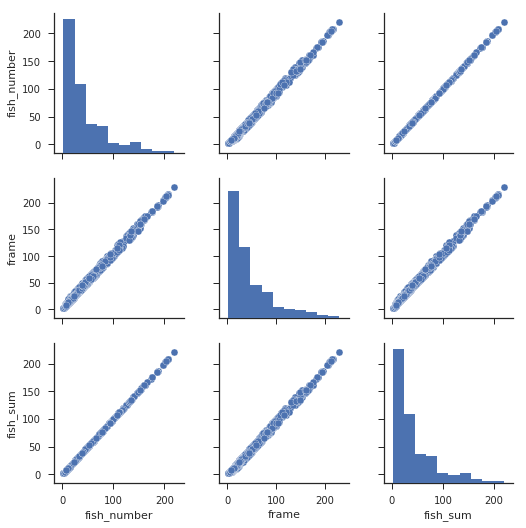

In [37]:
import seaborn as sns
%matplotlib inline

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(table[['fish_number','frame','fish_sum']].fillna(value=0)[:-1]).fish_number.plot(kind='')

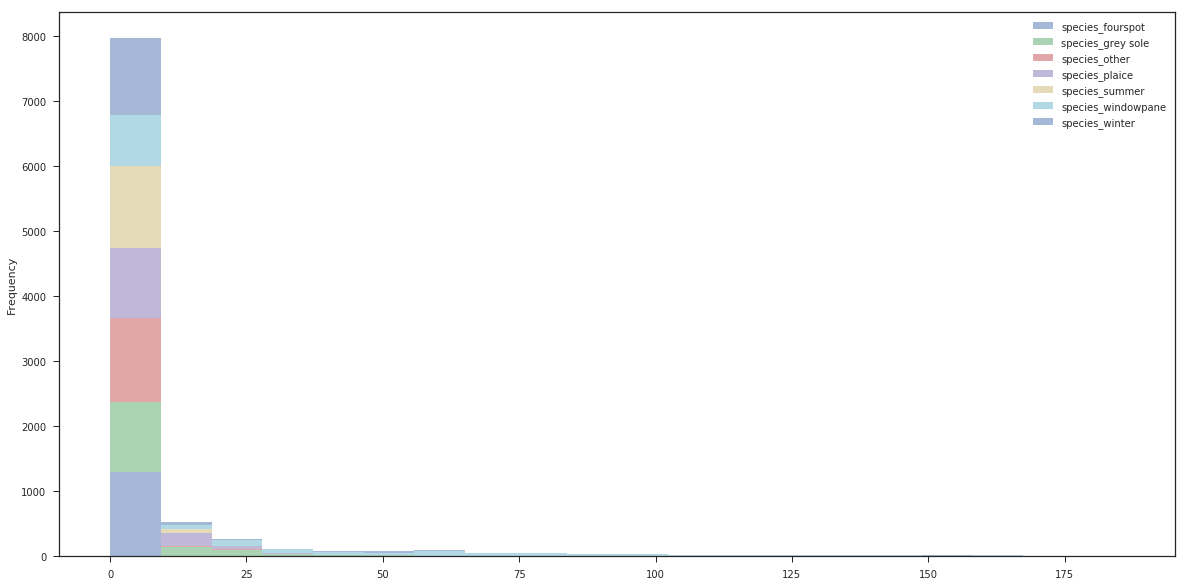

In [44]:
table[["species_fourspot",'species_grey sole','species_other','species_plaice','species_summer','species_windowpane','species_winter']][:-1].plot.hist(alpha=0.5, figsize=(20, 10), stacked=True, bins = 20)


## Unpack the train data

In [1]:
import glob

g = glob.glob('train_videos/*.mp4')

In [2]:
from tqdm import tqdm

folder = '../extra_space/train_pics'

with tqdm(total=len(g)) as pbar:
    
    for f in g:

        video_id = f.split('/')[1].split('.')[0]
        !mkdir -p $folder/$video_id        
        !ffmpeg -v 16 -i $f -vsync 0 -qscale:v 2 $folder/$video_id/%04d.jpg
            
        pbar.update(1)

  1%|▏         | 17/1332 [02:36<2:02:55,  5.61s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x22e5240] moov atom not found
train_videos/ZZ4qcDCvrB2ThFu6.mp4: Invalid data found when processing input


  5%|▍         | 63/1332 [08:32<2:32:44,  7.22s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xfdf240] moov atom not found
train_videos/ZpQfx3wAesvyITIS.mp4: Invalid data found when processing input


 12%|█▏        | 154/1332 [18:58<2:09:00,  6.57s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x14b0240] moov atom not found
train_videos/a316RCdA1ktcAarw.mp4: Invalid data found when processing input


 13%|█▎        | 175/1332 [21:46<2:26:09,  7.58s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x23cb240] moov atom not found
train_videos/affzuc7u4b3vPLSq.mp4: Invalid data found when processing input


 15%|█▍        | 195/1332 [23:40<1:28:20,  4.66s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x12d6240] moov atom not found
train_videos/zPtOCQYZ330dffkt.mp4: Invalid data found when processing input


 15%|█▍        | 199/1332 [24:03<2:04:42,  6.60s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x17e7240] moov atom not found
train_videos/ZfxBVBPqd8hy3XGA.mp4: Invalid data found when processing input


 15%|█▌        | 200/1332 [24:03<1:30:37,  4.80s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x8f1240] moov atom not found
train_videos/b3jHaPo8SGKkfWNw.mp4: Invalid data found when processing input


 15%|█▌        | 203/1332 [24:28<2:25:09,  7.71s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x10b6240] moov atom not found
train_videos/aZjiJ2RDG7e5QpwF.mp4: Invalid data found when processing input


 17%|█▋        | 221/1332 [26:24<3:12:19, 10.39s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1925240] moov atom not found
train_videos/zVTfNIDEQIXpfRTu.mp4: Invalid data found when processing input


 17%|█▋        | 222/1332 [26:25<2:17:58,  7.46s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x2165240] moov atom not found
train_videos/Zeoyn8b7h8P8IEc2.mp4: Invalid data found when processing input


 18%|█▊        | 245/1332 [28:57<2:27:58,  8.17s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1522240] moov atom not found
train_videos/ZllPMGx3BaMdaoXD.mp4: Invalid data found when processing input


 22%|██▏       | 293/1332 [34:26<2:09:10,  7.46s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1659240] moov atom not found
train_videos/zmYfc0lC2MQ3gfrW.mp4: Invalid data found when processing input


 23%|██▎       | 301/1332 [34:55<1:01:17,  3.57s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x12a7240] moov atom not found
train_videos/zR3vz986JhrV8VXA.mp4: Invalid data found when processing input


 23%|██▎       | 311/1332 [36:08<2:15:53,  7.99s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xc96240] moov atom not found
train_videos/b31OnfHQoKzTchz2.mp4: Invalid data found when processing input


 27%|██▋       | 357/1332 [40:50<1:29:27,  5.51s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xc84240] moov atom not found
train_videos/ZyWVWGHjmzX4vBbE.mp4: Invalid data found when processing input


 27%|██▋       | 365/1332 [41:42<1:28:12,  5.47s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x13df240] moov atom not found
train_videos/aAFz58FbVJmDaME3.mp4: Invalid data found when processing input


 28%|██▊       | 372/1332 [42:34<2:32:35,  9.54s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xf8a240] moov atom not found
train_videos/z57R24zsQTgq4Gt7.mp4: Invalid data found when processing input


 29%|██▊       | 380/1332 [43:42<2:25:10,  9.15s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xce3240] moov atom not found
train_videos/akyPDa0Z7qKCPSCI.mp4: Invalid data found when processing input


 29%|██▉       | 390/1332 [44:20<1:00:32,  3.86s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xcf1240] moov atom not found
train_videos/zZCiaXh6FllAYILs.mp4: Invalid data found when processing input


 32%|███▏      | 426/1332 [49:09<1:42:39,  6.80s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xd15240] moov atom not found
train_videos/zKKeeH3Y462lmM3f.mp4: Invalid data found when processing input


 38%|███▊      | 504/1332 [58:13<57:50,  4.19s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xab2240] moov atom not found
train_videos/ZzNv0x8nujQXuz35.mp4: Invalid data found when processing input


 38%|███▊      | 509/1332 [58:29<48:48,  3.56s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xa84240] moov atom not found
train_videos/zqWCbHoUPI9lMVBK.mp4: Invalid data found when processing input


 40%|████      | 536/1332 [1:01:20<1:13:18,  5.53s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1ab9240] moov atom not found
train_videos/a8hGfXMSkA6fcYmy.mp4: Invalid data found when processing input


 42%|████▏     | 561/1332 [1:04:51<1:18:07,  6.08s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xbba240] moov atom not found
train_videos/zrqy3XarL6jSoraK.mp4: Invalid data found when processing input


 42%|████▏     | 563/1332 [1:05:06<1:36:48,  7.55s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1dbb240] moov atom not found
train_videos/ziSjGcGfbowUyuBO.mp4: Invalid data found when processing input


 46%|████▌     | 607/1332 [1:11:07<2:10:58, 10.84s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x15ed240] moov atom not found
train_videos/ZYs9NeGe4Y472z0p.mp4: Invalid data found when processing input


 46%|████▌     | 613/1332 [1:11:43<1:19:10,  6.61s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x23fd240] moov atom not found
train_videos/akFoHqgD1CDXHQ0a.mp4: Invalid data found when processing input


 48%|████▊     | 633/1332 [1:14:09<1:23:35,  7.17s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xf08240] moov atom not found
train_videos/zdwVt8U2VF8pzpsy.mp4: Invalid data found when processing input


 48%|████▊     | 639/1332 [1:14:33<57:13,  4.96s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x237d240] moov atom not found
train_videos/zS1CWBe6SQZPQ56Y.mp4: Invalid data found when processing input


 49%|████▉     | 657/1332 [1:16:42<1:02:21,  5.54s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x139a240] moov atom not found
train_videos/aL8Y15sWfsnYM9ne.mp4: Invalid data found when processing input


 57%|█████▋    | 753/1332 [1:29:33<1:27:14,  9.04s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xe9a240] moov atom not found
train_videos/awfhX1OxW67P6wSc.mp4: Invalid data found when processing input


 58%|█████▊    | 772/1332 [1:32:17<43:44,  4.69s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x2056240] moov atom not found
train_videos/a1uy17GHhyf1DKKO.mp4: Invalid data found when processing input


 59%|█████▉    | 790/1332 [1:34:40<1:11:28,  7.91s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1476240] moov atom not found
train_videos/a91R6ZFKxGqx9a75.mp4: Invalid data found when processing input


 60%|█████▉    | 799/1332 [1:35:50<1:22:14,  9.26s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1131240] moov atom not found
train_videos/aaPrtIbbJtLtjJwX.mp4: Invalid data found when processing input


 61%|██████    | 813/1332 [1:37:30<1:02:30,  7.23s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x8e8240] moov atom not found
train_videos/artGl2rst71DWkU5.mp4: Invalid data found when processing input


 64%|██████▍   | 854/1332 [1:42:07<51:57,  6.52s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x869240] moov atom not found
train_videos/zxjr6V8bFiFHxpNU.mp4: Invalid data found when processing input


 64%|██████▍   | 858/1332 [1:42:36<58:00,  7.34s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x214a240] moov atom not found
train_videos/ZgNrh7WtzNa5i1OO.mp4: Invalid data found when processing input


 66%|██████▌   | 879/1332 [1:45:00<1:23:33, 11.07s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1bdb240] moov atom not found
train_videos/aL1C8loY1KVp2htK.mp4: Invalid data found when processing input


 69%|██████▉   | 918/1332 [1:49:18<38:18,  5.55s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1db9240] moov atom not found
train_videos/Zqp3yxvsMHRCcU4L.mp4: Invalid data found when processing input


 69%|██████▉   | 924/1332 [1:49:57<52:01,  7.65s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x2669240] moov atom not found
train_videos/zmYmO0WstvQIl19P.mp4: Invalid data found when processing input


 70%|███████   | 934/1332 [1:51:29<1:04:06,  9.66s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x979240] moov atom not found
train_videos/aH1GB7WdbfJtKgrI.mp4: Invalid data found when processing input


 70%|███████   | 937/1332 [1:51:40<42:42,  6.49s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xc1c240] moov atom not found
train_videos/ZVg07UANwbxMkOpk.mp4: Invalid data found when processing input


 73%|███████▎  | 977/1332 [1:57:01<39:33,  6.69s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1b66240] moov atom not found
train_videos/aqtoaebDL0fCfCTh.mp4: Invalid data found when processing input


 74%|███████▍  | 986/1332 [1:57:47<28:44,  4.98s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1e2f240] moov atom not found
train_videos/zIhh4cs0rX8jtdfw.mp4: Invalid data found when processing input


 75%|███████▌  | 1003/1332 [1:59:48<46:05,  8.40s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xfa7240] moov atom not found
train_videos/axQux1dKbTi4Vw5N.mp4: Invalid data found when processing input


 76%|███████▌  | 1006/1332 [2:00:06<36:45,  6.77s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1271240] moov atom not found
train_videos/aTAbz4Jg702G65sq.mp4: Invalid data found when processing input


 76%|███████▌  | 1015/1332 [2:01:28<45:58,  8.70s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x263b240] moov atom not found
train_videos/aefBRZ4IHqDwq8yT.mp4: Invalid data found when processing input


 84%|████████▍ | 1123/1332 [2:14:47<19:17,  5.54s/it]  

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x16a0240] moov atom not found
train_videos/aYn1aa78CLZQ9ScX.mp4: Invalid data found when processing input


 85%|████████▌ | 1133/1332 [2:15:34<13:00,  3.92s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xb8d240] moov atom not found
train_videos/aWOKS1eGEek84n0o.mp4: Invalid data found when processing input


 91%|█████████ | 1210/1332 [2:26:47<14:34,  7.17s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1ba8240] moov atom not found
train_videos/zXZSvmqfqvnwJgn1.mp4: Invalid data found when processing input


 92%|█████████▏| 1221/1332 [2:27:45<07:29,  4.05s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1fc5240] moov atom not found
train_videos/zgjGuS2fRDKbmb5x.mp4: Invalid data found when processing input


 94%|█████████▍| 1256/1332 [2:32:45<05:49,  4.60s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1541240] moov atom not found
train_videos/ZgXMtK2CqqXasx5a.mp4: Invalid data found when processing input


 97%|█████████▋| 1292/1332 [2:37:04<06:58, 10.46s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1b52240] moov atom not found
train_videos/zN0R9OrjupOmzpmZ.mp4: Invalid data found when processing input


 98%|█████████▊| 1300/1332 [2:37:43<03:24,  6.38s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x24c3240] moov atom not found
train_videos/zP3VySyM54eyj5mZ.mp4: Invalid data found when processing input


 98%|█████████▊| 1310/1332 [2:38:42<02:08,  5.83s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x2592240] moov atom not found
train_videos/aKAyWmEie96RKAPz.mp4: Invalid data found when processing input


 99%|█████████▊| 1314/1332 [2:39:01<01:38,  5.45s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xd15240] moov atom not found
train_videos/zR6VkJBSdt1ZrAEx.mp4: Invalid data found when processing input


 99%|█████████▉| 1318/1332 [2:39:20<01:30,  6.47s/it]

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x1aaa240] moov atom not found
train_videos/alk0Ovfjvxxafmnn.mp4: Invalid data found when processing input


100%|██████████| 1332/1332 [2:41:21<00:00,  9.96s/it]


## Check the unpacked data

### Check for zero pictures

In [ ]:
# list from error log 
ZZ4qcDCvrB2ThFu6.mp4

train_videos/ZpQfx3wAesvyITIS.mp4: Invalid data found when processing input
train_videos/a316RCdA1ktcAarw.mp4: Invalid data found when processing input
train_videos/affzuc7u4b3vPLSq.mp4: Invalid data found when processing input
train_videos/zPtOCQYZ330dffkt.mp4: Invalid data found when processing input
train_videos/ZfxBVBPqd8hy3XGA.mp4: Invalid data found when processing input
train_videos/b3jHaPo8SGKkfWNw.mp4: Invalid data found when processing input
train_videos/aZjiJ2RDG7e5QpwF.mp4: Invalid data found when processing input
train_videos/zVTfNIDEQIXpfRTu.mp4: Invalid data found when processing input
train_videos/Zeoyn8b7h8P8IEc2.mp4: Invalid data found when processing input
train_videos/ZllPMGx3BaMdaoXD.mp4: Invalid data found when processing input
train_videos/zmYfc0lC2MQ3gfrW.mp4: Invalid data found when processing input
train_videos/zR3vz986JhrV8VXA.mp4: Invalid data found when processing input
train_videos/b31OnfHQoKzTchz2.mp4: Invalid data found when processing input
train_videos/ZyWVWGHjmzX4vBbE.mp4: Invalid data found when processing input
train_videos/aAFz58FbVJmDaME3.mp4: Invalid data found when processing input
train_videos/z57R24zsQTgq4Gt7.mp4: Invalid data found when processing input
train_videos/akyPDa0Z7qKCPSCI.mp4: Invalid data found when processing input
train_videos/zZCiaXh6FllAYILs.mp4: Invalid data found when processing input
train_videos/zKKeeH3Y462lmM3f.mp4: Invalid data found when processing input
train_videos/ZzNv0x8nujQXuz35.mp4: Invalid data found when processing input
train_videos/zqWCbHoUPI9lMVBK.mp4: Invalid data found when processing input
train_videos/a8hGfXMSkA6fcYmy.mp4: Invalid data found when processing input
train_videos/zrqy3XarL6jSoraK.mp4: Invalid data found when processing input
train_videos/ziSjGcGfbowUyuBO.mp4: Invalid data found when processing input
train_videos/ZYs9NeGe4Y472z0p.mp4: Invalid data found when processing input
train_videos/akFoHqgD1CDXHQ0a.mp4: Invalid data found when processing input
train_videos/zdwVt8U2VF8pzpsy.mp4: Invalid data found when processing input
train_videos/zS1CWBe6SQZPQ56Y.mp4: Invalid data found when processing input
train_videos/aL8Y15sWfsnYM9ne.mp4: Invalid data found when processing input
train_videos/awfhX1OxW67P6wSc.mp4: Invalid data found when processing input
train_videos/a1uy17GHhyf1DKKO.mp4: Invalid data found when processing input
train_videos/a91R6ZFKxGqx9a75.mp4: Invalid data found when processing input
train_videos/aaPrtIbbJtLtjJwX.mp4: Invalid data found when processing input
train_videos/artGl2rst71DWkU5.mp4: Invalid data found when processing input
train_videos/zxjr6V8bFiFHxpNU.mp4: Invalid data found when processing input
train_videos/ZgNrh7WtzNa5i1OO.mp4: Invalid data found when processing input
train_videos/aL1C8loY1KVp2htK.mp4: Invalid data found when processing input
train_videos/Zqp3yxvsMHRCcU4L.mp4: Invalid data found when processing input
train_videos/zmYmO0WstvQIl19P.mp4: Invalid data found when processing input
train_videos/aH1GB7WdbfJtKgrI.mp4: Invalid data found when processing input
train_videos/ZVg07UANwbxMkOpk.mp4: Invalid data found when processing input
train_videos/aqtoaebDL0fCfCTh.mp4: Invalid data found when processing input
train_videos/zIhh4cs0rX8jtdfw.mp4: Invalid data found when processing input
train_videos/axQux1dKbTi4Vw5N.mp4: Invalid data found when processing input
train_videos/aTAbz4Jg702G65sq.mp4: Invalid data found when processing input
train_videos/aefBRZ4IHqDwq8yT.mp4: Invalid data found when processing input
train_videos/aYn1aa78CLZQ9ScX.mp4: Invalid data found when processing input
train_videos/aWOKS1eGEek84n0o.mp4: Invalid data found when processing input
train_videos/zXZSvmqfqvnwJgn1.mp4: Invalid data found when processing input
train_videos/zgjGuS2fRDKbmb5x.mp4: Invalid data found when processing input
train_videos/ZgXMtK2CqqXasx5a.mp4: Invalid data found when processing input
train_videos/zN0R9OrjupOmzpmZ.mp4: Invalid data found when processing input
train_videos/zP3VySyM54eyj5mZ.mp4: Invalid data found when processing input
train_videos/aKAyWmEie96RKAPz.mp4: Invalid data found when processing input
train_videos/zR6VkJBSdt1ZrAEx.mp4: Invalid data found when processing input
train_videos/alk0Ovfjvxxafmnn.mp4: Invalid data found when processing input


In [11]:
import os

cpt = {r:len(files) for r, d, files in os.walk('../extra_space/train_pics/')}
del cpt['../extra_space/train_pics/']
# cpt = {k.split('/')[1]: v for k, v in cpt.items()}

In [12]:
cpt_zero = {k: v for k, v in cpt.items() if v == 0}
cpt_zero

{'../extra_space/train_pics/ZVg07UANwbxMkOpk': 0,
 '../extra_space/train_pics/ZYs9NeGe4Y472z0p': 0,
 '../extra_space/train_pics/ZZ4qcDCvrB2ThFu6': 0,
 '../extra_space/train_pics/Zeoyn8b7h8P8IEc2': 0,
 '../extra_space/train_pics/ZfxBVBPqd8hy3XGA': 0,
 '../extra_space/train_pics/ZgNrh7WtzNa5i1OO': 0,
 '../extra_space/train_pics/ZgXMtK2CqqXasx5a': 0,
 '../extra_space/train_pics/ZllPMGx3BaMdaoXD': 0,
 '../extra_space/train_pics/ZpQfx3wAesvyITIS': 0,
 '../extra_space/train_pics/Zqp3yxvsMHRCcU4L': 0,
 '../extra_space/train_pics/ZyWVWGHjmzX4vBbE': 0,
 '../extra_space/train_pics/ZzNv0x8nujQXuz35': 0,
 '../extra_space/train_pics/a1uy17GHhyf1DKKO': 0,
 '../extra_space/train_pics/a316RCdA1ktcAarw': 0,
 '../extra_space/train_pics/a8hGfXMSkA6fcYmy': 0,
 '../extra_space/train_pics/a91R6ZFKxGqx9a75': 0,
 '../extra_space/train_pics/aAFz58FbVJmDaME3': 0,
 '../extra_space/train_pics/aH1GB7WdbfJtKgrI': 0,
 '../extra_space/train_pics/aKAyWmEie96RKAPz': 0,
 '../extra_space/train_pics/aL1C8loY1KVp2htK': 0,


In [13]:
len(cpt_zero)

57

### Check that videos contain more frames that the largest fish frame data annotation

In [15]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

row_id          video_id  frame  fish_number    length     x1     y1  \
0       0  00WK7DR6FyPZ5u3A      0          1.0  165.3028  766.0  531.0   
1       1  00WK7DR6FyPZ5u3A     18          2.0  176.5814  776.0  540.0   
2       2  00WK7DR6FyPZ5u3A     41          3.0  172.4297  772.0  538.0   
3       3  00WK7DR6FyPZ5u3A     63          4.0  166.6433  770.0  531.0   
4       4  00WK7DR6FyPZ5u3A     82          5.0  177.8820  777.0  544.0   

      x2     y2  species_fourspot  species_grey sole  species_other  \
0  659.0  405.0                 0                  1              0   
1  661.0  406.0                 0                  1              0   
2  666.0  402.0                 0                  1              0   
3  667.0  400.0                 0                  1              0   
4  666.0  405.0                 0                  1              0   

   species_plaice  species_summer  species_windowpane  species_winter  
0               0               0                   0               0  
1               0               0                   0               0  
2               0               0                   0               0  
3               0               0                   0               0  
4               0               0                   0               0

In [19]:
import numpy as np

table = pd.pivot_table(
    df,
    index=["video_id"],
    values=["frame"],
    aggfunc={"frame":np.max
            },
    fill_value=0)


In [28]:
import os

cpt = {r:len(files) for r, d, files in os.walk('../extra_space/train_pics/')}
del cpt['../extra_space/train_pics/']
cpt = {k.split('/')[3]: v for k, v in cpt.items()}
cpt_non_zero = {k: v for k, v in cpt.items() if v > 0}

In [32]:
len(cpt_non_zero)

1275

In [36]:
for key,value in cpt_non_zero.items():
    if (table.loc[key].frame) > value:
        print('Frame count error with video {}'.format(key))
        print('annotation max {} vs video count {}'.format(table.loc[key].frame,value))

### Make 100 videos for manual sanity check

In [93]:
df[df.video_id == '00WK7DR6FyPZ5u3A']

row_id          video_id  frame  fish_number    length     x1     y1  \
0        0  00WK7DR6FyPZ5u3A      0          1.0  165.3028  766.0  531.0   
1        1  00WK7DR6FyPZ5u3A     18          2.0  176.5814  776.0  540.0   
2        2  00WK7DR6FyPZ5u3A     41          3.0  172.4297  772.0  538.0   
3        3  00WK7DR6FyPZ5u3A     63          4.0  166.6433  770.0  531.0   
4        4  00WK7DR6FyPZ5u3A     82          5.0  177.8820  777.0  544.0   
5        5  00WK7DR6FyPZ5u3A    100          6.0  161.4435  763.0  527.0   
6        6  00WK7DR6FyPZ5u3A    115          NaN       NaN    NaN    NaN   
7        7  00WK7DR6FyPZ5u3A    123          7.0  181.6865  777.0  543.0   
8        8  00WK7DR6FyPZ5u3A    142          8.0  206.4655  789.0  563.0   
9        9  00WK7DR6FyPZ5u3A    160          9.0  197.0913  783.0  556.0   
10      10  00WK7DR6FyPZ5u3A    180         10.0  170.8567  764.0  543.0   
11      11  00WK7DR6FyPZ5u3A    198         11.0  142.9475  755.0  512.0   
12      12  00WK7DR6FyPZ5u3A    236         12.0  199.7523  784.0  558.0   
13      13  00WK7DR6FyPZ5u3A    259         13.0  197.3069  788.0  555.0   
14      14  00WK7DR6FyPZ5u3A    279         14.0  205.8009  786.0  569.0   
15      15  00WK7DR6FyPZ5u3A    299         15.0  169.6143  766.0  542.0   
16      16  00WK7DR6FyPZ5u3A    318         16.0  169.4255  773.0  532.0   
17      17  00WK7DR6FyPZ5u3A    345         17.0  155.9006  755.0  530.0   
18      18  00WK7DR6FyPZ5u3A    377         18.0  177.4289  772.0  546.0   
19      19  00WK7DR6FyPZ5u3A    400         19.0  177.8820  779.0  540.0   
20      20  00WK7DR6FyPZ5u3A    422         20.0  155.5699  773.0  518.0   
21      21  00WK7DR6FyPZ5u3A    440         21.0  176.9548  774.0  542.0   
22      22  00WK7DR6FyPZ5u3A    464         22.0   99.0202  723.0  487.0   
23      23  00WK7DR6FyPZ5u3A    489         23.0  168.5052  771.0  533.0   
24      24  00WK7DR6FyPZ5u3A    522         24.0   72.3464  712.0  459.0   
25      25  00WK7DR6FyPZ5u3A    537          NaN       NaN    NaN    NaN   
26      26  00WK7DR6FyPZ5u3A    556         25.0  166.4242  773.0  529.0   

       x2     y2  species_fourspot  species_grey sole  species_other  \
0   659.0  405.0                 0                  1              0   
1   661.0  406.0                 0                  1              0   
2   666.0  402.0                 0                  1              0   
3   667.0  400.0                 0                  1              0   
4   666.0  405.0                 0                  1              0   
5   655.0  407.0                 0                  1              0   
6     NaN    NaN                 0                  0              0   
7   660.0  404.0                 0                  1              0   
8   661.0  401.0                 0                  1              0   
9   660.0  402.0                 0                  1              0   
10  658.0  409.0                 0                  1              0   
11  658.0  407.0                 0                  1              0   
12  658.0  403.0                 0                  1              0   
13  661.0  404.0                 0                  1              0   
14  663.0  404.0                 0                  1              0   
15  666.0  405.0                 0                  1              0   
16  662.0  404.0                 0                  1              0   
17  666.0  402.0                 0                  1              0   
18  663.0  406.0                 0                  1              0   
19  668.0  401.0                 0                  1              0   
20  662.0  409.0                 0                  1              0   
21  662.0  405.0                 0                  1              0   
22  662.0  409.0                 0                  1              0   
23  658.0  408.0                 0                  1              0   
24  665.0  404.0                 0                  0              1   
25 

In [92]:
df[df.length.isnull()].head()

row_id          video_id  frame  fish_number  length  x1  y1  x2  y2  \
6        6  00WK7DR6FyPZ5u3A    115          NaN     NaN NaN NaN NaN NaN   
25      25  00WK7DR6FyPZ5u3A    537          NaN     NaN NaN NaN NaN NaN   
45      45  02p3Yn87z0b5grhL    107          NaN     NaN NaN NaN NaN NaN   
55      55  05RagNzyjVdXeUFR    133          NaN     NaN NaN NaN NaN NaN   
61      61  05RagNzyjVdXeUFR    358          NaN     NaN NaN NaN NaN NaN   

    species_fourspot  species_grey sole  species_other  species_plaice  \
6                  0                  0              0               0   
25                 0                  0              0               0   
45                 0                  0              0               0   
55                 0                  0              0               0   
61                 0                  0              0               0   

    species_summer  species_windowpane  species_winter  
6                0                   0               0  
25               0                   0               0  
45               0                   0               0  
55               0                   0               0  
61               0                   0               0

In [77]:
df.columns.values

array(['row_id', 'video_id', 'frame', 'fish_number', 'length', 'x1', 'y1',
       'x2', 'y2', 'species_fourspot', 'species_grey sole',
       'species_other', 'species_plaice', 'species_summer',
       'species_windowpane', 'species_winter'], dtype=object)

In [62]:
!ls

basic-yolo-keras  keras_cars.ipynb  test_videos   valid_pics
fish_eda.ipynb	  out.mp4	    train.csv	  wget-log
inspect_vids	  submission.csv    train_videos


In [61]:
!mkdir inspect_vids

In [132]:
!mkdir inspect_vids/vids

In [144]:
from random import shuffle
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

non_zero_vids = list(cpt_non_zero.keys())
shuffle(non_zero_vids)
sample_vids = non_zero_vids[0:100]
g = glob.glob('train_videos/*.mp4')
species_list = ['species_fourspot', 'species_grey sole','species_other', 'species_plaice', 'species_summer','species_windowpane', 'species_winter']

def draw_box(image,xmin,ymin,xmax,ymax,label):
    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (255,0,0), 2)
    cv2.putText(image, label, 
                (xmin, ymin + 16), 
                0, 
                1e-3 * image.shape[0], 
                (255,0,0), 2)
        
    return image 

with tqdm(total=len(sample_vids)) as pbar:

    for vid in sample_vids:

        # print(vid)
        !mkdir -p inspect_vids/$vid
        !cp -a ../extra_space/train_pics/$vid/*.jpg inspect_vids/$vid

        imgs = glob.glob('../extra_space/train_pics/{}/*.jpg'.format(vid))
        imgs.sort()

        i = 0
        for img in imgs:

            data = df[(df.video_id == vid) & (df.frame == int(img.split('/')[4].split('.')[0])-1)][['x1','y1','x2','y2']].values 

            if data.shape[0]>0:

                label = df[(df.video_id == vid) & (df.frame == int(img.split('/')[4].split('.')[0])-1)][species_list].values.argmax()
                label = species_list[label]

                data = data[0]
                # print(data)
                try:
                    np_img = cv2.imread(img) 
                    np_img = draw_box(np_img,int(data[2]),int(data[3]),int(data[0]),int(data[1]),label)
                    # print(img.replace('../extra_space/train_pics/','inspect_vids/'))
                    cv2.imwrite(img.replace('../extra_space/train_pics/','inspect_vids/'), np_img)
                except Exception as e: 
                    # print (str(e))
                    pass

            else:
                dst = img.replace('../extra_space/train_pics/','inspect_vids/')

            i += 1

        vid_file = 'inspect_vids/vids/'+vid+'.avi'
        !ffmpeg -loglevel quiet -f image2 -framerate 25 -i inspect_vids/$vid/%04d.jpg $vid_file
        pbar.update(1)



100%|██████████| 100/100 [36:40<00:00, 23.04s/it]


In [145]:
!tar czf inspect_vids/vids/vids.tar.gz inspect_vids/vids/

tar: inspect_vids/vids: file changed as we read it


In [142]:
vid = 'lfqHHs2t6EevQhA5' 
vid_file = 'inspect_vids/vids/'+vid+'.avi'
!ffmpeg -loglevel quiet -f image2 -framerate 25 -i inspect_vids/$vid/%04d.jpg $vid_file

In [97]:
cv2.imread('../extra_space/train_pics/MYaKZYGbtL50x2PE/0560.jpg') 

NameError: name 'cv2' is not defined

In [75]:
int(img.split('/')[4].split('.')[0])

1

In [87]:

img = '../extra_space/train_pics/D7WtoycPCNwFjOqi/0001.jpg'
vid = 'D7WtoycPCNwFjOqi'
data = df[(df.video_id == vid) & (df.frame == int(img.split('/')[4].split('.')[0])-1)][['x1','y1','x2','y2']].values 
label = df[(df.video_id == vid) & (df.frame == int(img.split('/')[4].split('.')[0])-1)][species_list].values.argmax()
label = species_list[label]

In [88]:
label

'species_windowpane'

In [53]:
non_zero_vids = list(cpt_non_zero.keys())
shuffle(non_zero_vids)
sample_vids = non_zero_vids[0:100]

In [54]:
sample_vids[0]

'D7WtoycPCNwFjOqi'

In [56]:
vid_path = [x for x in g if sample_vids[0] in x][0]
vid_path

'train_videos/D7WtoycPCNwFjOqi.mp4'

In [52]:
vid_id

'train_videos/GlFJ04BcGCZOJtkK.mp4'

In [65]:
g[0].replace('../extra_space/train_pics/','inspect_vids/')

'inspect_vids/D7WtoycPCNwFjOqi/0001.jpg'

In [58]:
g = glob.glob('../extra_space/train_pics/{}/*.jpg'.format(sample_vids[0]))
g.sort()
g

['../extra_space/train_pics/D7WtoycPCNwFjOqi/0001.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0002.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0003.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0004.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0005.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0006.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0007.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0008.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0009.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0010.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0011.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0012.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0013.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0014.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0015.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0016.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/0017.jpg',
 '../extra_space/train_pics/D7WtoycPCNwFjOqi/001

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 0
for image in g:
    
    data = df[(df.video_id == '00WK7DR6FyPZ5u3A') & (df.frame == int(g[i].split('/')[1].split('.')[0])-1)][['x1','y1','x2','y2']].values 

    if data.shape[0]>0:
        data = data[0]
        print(data)
        try:
            img = cv2.imread(image) 
            img = draw_box(img,int(data[2]),int(data[3]),int(data[0]),int(data[1]),'fish')
            cv2.imwrite(image, img)
        except:
            print ('na row')
    i += 1

In [ ]:
!ffmpeg -f image2 -framerate 25 -i train_pics/%04d.jpg foo.avi

### Check the NA frames

In [146]:
df[df.length.isnull()].shape

(4008, 16)

In [148]:
df[df.length.isnull()].head()

row_id          video_id  frame  fish_number  length  x1  y1  x2  y2  \
6        6  00WK7DR6FyPZ5u3A    115          NaN     NaN NaN NaN NaN NaN   
25      25  00WK7DR6FyPZ5u3A    537          NaN     NaN NaN NaN NaN NaN   
45      45  02p3Yn87z0b5grhL    107          NaN     NaN NaN NaN NaN NaN   
55      55  05RagNzyjVdXeUFR    133          NaN     NaN NaN NaN NaN NaN   
61      61  05RagNzyjVdXeUFR    358          NaN     NaN NaN NaN NaN NaN   

    species_fourspot  species_grey sole  species_other  species_plaice  \
6                  0                  0              0               0   
25                 0                  0              0               0   
45                 0                  0              0               0   
55                 0                  0              0               0   
61                 0                  0              0               0   

    species_summer  species_windowpane  species_winter  
6                0                   0               0  
25               0                   0               0  
45               0                   0               0  
55               0                   0               0  
61               0                   0               0

In [174]:
df[df.length.isnull()].video_id.unique().shape[0]

888

In [168]:
!mkdir na_frames

In [175]:
with tqdm(total=df[df.length.isnull()].video_id.unique().shape[0]) as pbar:
    for na_vid in list(df[df.length.isnull()].video_id.unique()):
        for frame in df[(df.length.isnull()) & (df.video_id == na_vid)].frame.values:
            img = ('../extra_space/train_pics/{}/{}.jpg'.format(na_vid,str(frame).zfill(4)) )
            copy_name = 'na_frames/'+na_vid+'_'+str(frame).zfill(4)+'.jpg'
            !cp -a $img $copy_name
        pbar.update(1)

 58%|█████▊    | 516/888 [10:57<07:49,  1.26s/it]

cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/0714.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/0749.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/0804.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/0828.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/0871.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/0923.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/1006.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/1080.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/1154.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZVg07UANwbxMkOpk/1251.jpg': No such file or directory


 58%|█████▊    | 517/888 [11:00<10:30,  1.70s/it]

cp: cannot stat '../extra_space/train_pics/ZYs9NeGe4Y472z0p/0053.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZYs9NeGe4Y472z0p/0537.jpg': No such file or directory


 58%|█████▊    | 518/888 [11:00<08:22,  1.36s/it]

cp: cannot stat '../extra_space/train_pics/ZgXMtK2CqqXasx5a/0362.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZgXMtK2CqqXasx5a/0557.jpg': No such file or directory


 58%|█████▊    | 519/888 [11:01<06:48,  1.11s/it]

cp: cannot stat '../extra_space/train_pics/ZllPMGx3BaMdaoXD/0111.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZllPMGx3BaMdaoXD/0294.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZllPMGx3BaMdaoXD/1134.jpg': No such file or directory


 59%|█████▊    | 520/888 [11:01<06:12,  1.01s/it]

cp: cannot stat '../extra_space/train_pics/Zqp3yxvsMHRCcU4L/0198.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/Zqp3yxvsMHRCcU4L/0381.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/Zqp3yxvsMHRCcU4L/1221.jpg': No such file or directory


 59%|█████▊    | 521/888 [11:02<05:49,  1.05it/s]

cp: cannot stat '../extra_space/train_pics/ZyWVWGHjmzX4vBbE/0155.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZyWVWGHjmzX4vBbE/0723.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZyWVWGHjmzX4vBbE/0739.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZyWVWGHjmzX4vBbE/0758.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZyWVWGHjmzX4vBbE/0824.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZyWVWGHjmzX4vBbE/0881.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZyWVWGHjmzX4vBbE/0916.jpg': No such file or directory


 59%|█████▉    | 522/888 [11:04<07:48,  1.28s/it]

cp: cannot stat '../extra_space/train_pics/ZzNv0x8nujQXuz35/0670.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZzNv0x8nujQXuz35/0720.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZzNv0x8nujQXuz35/0790.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZzNv0x8nujQXuz35/0865.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZzNv0x8nujQXuz35/0968.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZzNv0x8nujQXuz35/1061.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZzNv0x8nujQXuz35/1150.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/ZzNv0x8nujQXuz35/1213.jpg': No such file or directory


 59%|█████▉    | 523/888 [11:06<09:22,  1.54s/it]

cp: cannot stat '../extra_space/train_pics/a1uy17GHhyf1DKKO/0015.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/a1uy17GHhyf1DKKO/0050.jpg': No such file or directory


 59%|█████▉    | 524/888 [11:07<07:38,  1.26s/it]

cp: cannot stat '../extra_space/train_pics/a316RCdA1ktcAarw/0054.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/a316RCdA1ktcAarw/0846.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/a316RCdA1ktcAarw/1463.jpg': No such file or directory


 59%|█████▉    | 525/888 [11:08<06:51,  1.13s/it]

cp: cannot stat '../extra_space/train_pics/a8hGfXMSkA6fcYmy/0133.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/a8hGfXMSkA6fcYmy/0358.jpg': No such file or directory


 59%|█████▉    | 526/888 [11:08<05:49,  1.04it/s]

cp: cannot stat '../extra_space/train_pics/a91R6ZFKxGqx9a75/0114.jpg': No such file or directory


 59%|█████▉    | 527/888 [11:09<04:36,  1.31it/s]

cp: cannot stat '../extra_space/train_pics/aAFz58FbVJmDaME3/1168.jpg': No such file or directory


 59%|█████▉    | 528/888 [11:09<03:46,  1.59it/s]

cp: cannot stat '../extra_space/train_pics/aH1GB7WdbfJtKgrI/0005.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aH1GB7WdbfJtKgrI/0007.jpg': No such file or directory


 60%|█████▉    | 529/888 [11:10<03:39,  1.63it/s]

cp: cannot stat '../extra_space/train_pics/aL1C8loY1KVp2htK/0527.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aL1C8loY1KVp2htK/0928.jpg': No such file or directory


 60%|█████▉    | 530/888 [11:10<03:38,  1.64it/s]

cp: cannot stat '../extra_space/train_pics/aTAbz4Jg702G65sq/2046.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aTAbz4Jg702G65sq/2069.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aTAbz4Jg702G65sq/2118.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aTAbz4Jg702G65sq/2146.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aTAbz4Jg702G65sq/2268.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aTAbz4Jg702G65sq/2320.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aTAbz4Jg702G65sq/2338.jpg': No such file or directory


 60%|█████▉    | 531/888 [11:12<06:00,  1.01s/it]

cp: cannot stat '../extra_space/train_pics/aWOKS1eGEek84n0o/0154.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aWOKS1eGEek84n0o/0946.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aWOKS1eGEek84n0o/1563.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aWOKS1eGEek84n0o/2649.jpg': No such file or directory


 60%|█████▉    | 532/888 [11:13<06:15,  1.06s/it]

cp: cannot stat '../extra_space/train_pics/aYn1aa78CLZQ9ScX/0093.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aYn1aa78CLZQ9ScX/0313.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aYn1aa78CLZQ9ScX/0956.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aYn1aa78CLZQ9ScX/1653.jpg': No such file or directory


 60%|██████    | 533/888 [11:14<06:26,  1.09s/it]

cp: cannot stat '../extra_space/train_pics/aaPrtIbbJtLtjJwX/0168.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aaPrtIbbJtLtjJwX/0351.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aaPrtIbbJtLtjJwX/1191.jpg': No such file or directory


 60%|██████    | 534/888 [11:15<05:58,  1.01s/it]

cp: cannot stat '../extra_space/train_pics/affzuc7u4b3vPLSq/0145.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/affzuc7u4b3vPLSq/0385.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/affzuc7u4b3vPLSq/0568.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/affzuc7u4b3vPLSq/1408.jpg': No such file or directory


 60%|██████    | 535/888 [11:16<06:12,  1.05s/it]

cp: cannot stat '../extra_space/train_pics/akyPDa0Z7qKCPSCI/0218.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/akyPDa0Z7qKCPSCI/0254.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/akyPDa0Z7qKCPSCI/0272.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/akyPDa0Z7qKCPSCI/0300.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/akyPDa0Z7qKCPSCI/0341.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/akyPDa0Z7qKCPSCI/0382.jpg': No such file or directory


 60%|██████    | 536/888 [11:18<07:25,  1.27s/it]

cp: cannot stat '../extra_space/train_pics/alk0Ovfjvxxafmnn/0080.jpg': No such file or directory


 60%|██████    | 537/888 [11:18<05:38,  1.04it/s]

cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/0872.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/0903.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/1124.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/1184.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/1360.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/1385.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/1425.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/1609.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/1722.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/aqtoaebDL0fCfCTh/1772.jpg': No such file or directory
cp: cannot stat '../extra_spac

 61%|██████    | 538/888 [11:22<10:31,  1.80s/it]

cp: cannot stat '../extra_space/train_pics/artGl2rst71DWkU5/0087.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/artGl2rst71DWkU5/0270.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/artGl2rst71DWkU5/1110.jpg': No such file or directory


 61%|██████    | 539/888 [11:23<08:44,  1.50s/it]

cp: cannot stat '../extra_space/train_pics/awfhX1OxW67P6wSc/0330.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/awfhX1OxW67P6wSc/0368.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/awfhX1OxW67P6wSc/0433.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/awfhX1OxW67P6wSc/0501.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/awfhX1OxW67P6wSc/0572.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/awfhX1OxW67P6wSc/0668.jpg': No such file or directory


 61%|██████    | 540/888 [11:25<09:27,  1.63s/it]

cp: cannot stat '../extra_space/train_pics/b31OnfHQoKzTchz2/0124.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b31OnfHQoKzTchz2/0319.jpg': No such file or directory


 61%|██████    | 541/888 [11:26<07:32,  1.30s/it]

cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/1264.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/1325.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/1391.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/1501.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/1555.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/1664.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/1851.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/1966.jpg': No such file or directory
cp: cannot stat '../extra_space/train_pics/b3jHaPo8SGKkfWNw/2063.jpg': No such file or directory


 74%|███████▍  | 656/888 [13:48<04:39,  1.21s/it]


UnboundLocalError: local variable 'child' referenced before assignment

In [176]:
!tar czf na_frames.tar.gz na_frames/

## Analyze bbox sizes

In [177]:
df.head()

row_id          video_id  frame  fish_number    length     x1     y1  \
0       0  00WK7DR6FyPZ5u3A      0          1.0  165.3028  766.0  531.0   
1       1  00WK7DR6FyPZ5u3A     18          2.0  176.5814  776.0  540.0   
2       2  00WK7DR6FyPZ5u3A     41          3.0  172.4297  772.0  538.0   
3       3  00WK7DR6FyPZ5u3A     63          4.0  166.6433  770.0  531.0   
4       4  00WK7DR6FyPZ5u3A     82          5.0  177.8820  777.0  544.0   

      x2     y2  species_fourspot  species_grey sole  species_other  \
0  659.0  405.0                 0                  1              0   
1  661.0  406.0                 0                  1              0   
2  666.0  402.0                 0                  1              0   
3  667.0  400.0                 0                  1              0   
4  666.0  405.0                 0                  1              0   

   species_plaice  species_summer  species_windowpane  species_winter  
0               0               0                   0               0  
1               0               0                   0               0  
2               0               0                   0               0  
3               0               0                   0               0  
4               0               0                   0               0

In [178]:
df.columns.values

array(['row_id', 'video_id', 'frame', 'fish_number', 'length', 'x1', 'y1',
       'x2', 'y2', 'species_fourspot', 'species_grey sole',
       'species_other', 'species_plaice', 'species_summer',
       'species_windowpane', 'species_winter'], dtype=object)

In [179]:
df_sizes = df[['row_id', 'video_id', 'frame', 'fish_number', 'length', 'x1', 'y1','x2', 'y2']]

In [181]:
df_sizes['length_l2'] = df_sizes[['x1', 'y1','x2', 'y2']].apply(lambda x: (x[0]-x[2])**2 + (x[1]-x[3])**2  )

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
import math 

df_sizes['length_l2']= df_sizes.apply(lambda row: math.sqrt( (row['x1']-row['x2'])**2 + (row['y1']-row['y2'])**2 ) , axis=1)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


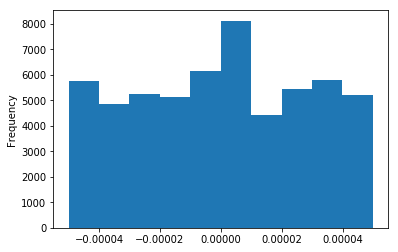

In [192]:
df_sizes['diff'] = df_sizes['length_l2'] - df_sizes['length']
df_sizes['diff'].plot(kind='hist')

In [193]:
df_sizes['x_diff'] = df_sizes['x1'] - df_sizes['x2']
df_sizes['y_diff'] = df_sizes['y1'] - df_sizes['y2']


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [194]:
df_sizes.head()

row_id          video_id  frame  fish_number    length     x1     y1  \
0       0  00WK7DR6FyPZ5u3A      0          1.0  165.3028  766.0  531.0   
1       1  00WK7DR6FyPZ5u3A     18          2.0  176.5814  776.0  540.0   
2       2  00WK7DR6FyPZ5u3A     41          3.0  172.4297  772.0  538.0   
3       3  00WK7DR6FyPZ5u3A     63          4.0  166.6433  770.0  531.0   
4       4  00WK7DR6FyPZ5u3A     82          5.0  177.8820  777.0  544.0   

      x2     y2   length_l2      diff  x_diff  y_diff  
0  659.0  405.0  165.302753 -0.000047   107.0   126.0  
1  661.0  406.0  176.581426  0.000026   115.0   134.0  
2  666.0  402.0  172.429696 -0.000004   106.0   136.0  
3  667.0  400.0  166.643332  0.000032   103.0   131.0  
4  666.0  405.0  177.881983 -0.000017   111.0   139.0

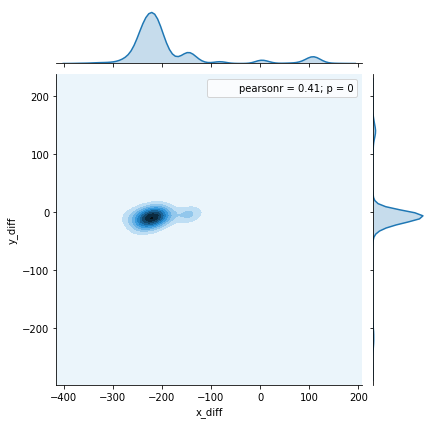

In [195]:
import seaborn as sns

sns.jointplot(x="x_diff", y="y_diff", data=df_sizes, kind="kde")
plt.show()

# 2. Calculate rectangular bboxes

In [231]:
import pandas as pd

df = pd.read_csv('train.csv')

In [207]:
df[df.video_id == '5Nvu5esMH64QdnoT'].head()

row_id          video_id  frame  fish_number    length     x1     y1  \
4495    4495  5Nvu5esMH64QdnoT      0          1.0  226.4972  642.0  398.0   
4496    4496  5Nvu5esMH64QdnoT     19          2.0  229.9652  645.0  400.0   
4497    4497  5Nvu5esMH64QdnoT     37          3.0  219.3855  643.0  400.0   
4498    4498  5Nvu5esMH64QdnoT     62          4.0  217.3315  643.0  416.0   
4499    4499  5Nvu5esMH64QdnoT     88          5.0  232.2154  645.0  406.0   

         x2     y2  species_fourspot  species_grey sole  species_other  \
4495  868.0  413.0                 0                  0              0   
4496  873.0  430.0                 0                  0              0   
4497  862.0  413.0                 0                  0              0   
4498  860.0  428.0                 0                  0              0   
4499  877.0  416.0                 0                  0              0   

      species_plaice  species_summer  species_windowpane  species_winter  
4495               0               0                   0               1  
4496               0               0                   0               1  
4497               0               0                   0               1  
4498               0               0                   0               1  
4499               0               0                   0               1

In [274]:
def change_coords(x1,y1,x2,y2,f_len):
    
    max_x = 1280
    max_y = 720
    
    x_av = (x2+x1)/2
    y_av = (y2+y1)/2
    

    if(x_av-f_len/2)>max_x:
        x1_new = max_x
    elif (x_av-f_len/2)<0:
        x1_new = 0
    else:
        x1_new=x_av-f_len/2 
        
    if(x_av+f_len/2)>max_x:
        x2_new = max_x
    else:
        x2_new=x_av+f_len/2 
        
    if(y_av-f_len/2)>max_y:
        y1_new = max_y
    elif (y_av-f_len/2)<0:
        y1_new = 0
    else:
        y1_new=y_av-f_len/2 

    if(y_av+f_len/2)>max_y:
        y2_new = max_y
    else:
        y2_new=y_av+f_len/2

    return x1_new,y1_new,x2_new,y2_new

In [275]:
df['_'] = df.apply(lambda row: change_coords(row['x1'],row['y1'],row['x2'],row['y2'],row['length']), axis=1)
df[['x1_new','y1_new','x2_new','y2_new']] = df['_'].apply(pd.Series)
del df['_']

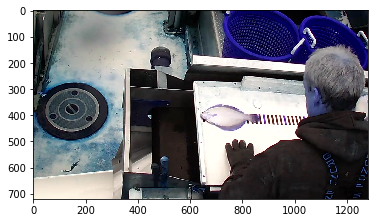

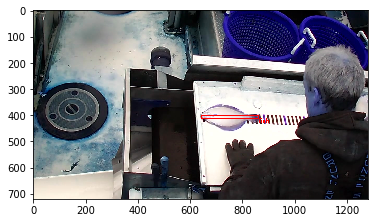

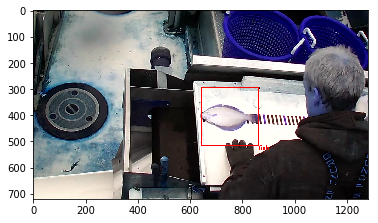

In [280]:
from random import shuffle
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def draw_box(image,xmin,ymin,xmax,ymax,label):
    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (255,0,0), 2)
    cv2.putText(image, label, 
                (xmin, ymin + 16), 
                0, 
                1e-3 * image.shape[0], 
                (255,0,0), 2)
        
    return image 


img = '../extra_space/train_pics/5Nvu5esMH64QdnoT/0038.jpg'

data = df[(df.video_id == '5Nvu5esMH64QdnoT') & (df.frame == int(img.split('/')[4].split('.')[0])-1)][['x1','y1','x2','y2']].values 
data = data[0]

np_img = cv2.imread(img) 
plt.imshow(np_img)
plt.show()

np_img = draw_box(np_img,int(data[2]),int(data[3]),int(data[0]),int(data[1]),'fish')
plt.imshow(np_img)
plt.show()

data = df[(df.video_id == '5Nvu5esMH64QdnoT') & (df.frame == int(img.split('/')[4].split('.')[0])-1)][['x1_new','y1_new','x2_new','y2_new']].values 
data = data[0]

np_img = cv2.imread(img) 
np_img = draw_box(np_img,int(data[2]),int(data[3]),int(data[0]),int(data[1]),'fish')
plt.imshow(np_img)
plt.show()

In [282]:
# create one video with bigger boxes

from random import shuffle
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

non_zero_vids = list(cpt_non_zero.keys())
shuffle(non_zero_vids)
sample_vids = non_zero_vids[0:5]
g = glob.glob('train_videos/*.mp4')
species_list = ['species_fourspot', 'species_grey sole','species_other', 'species_plaice', 'species_summer','species_windowpane', 'species_winter']

def draw_box(image,xmin,ymin,xmax,ymax,label):
    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (255,0,0), 2)
    cv2.putText(image, label, 
                (xmin, ymin + 16), 
                0, 
                1e-3 * image.shape[0], 
                (255,0,0), 2)
        
    return image 

with tqdm(total=len(sample_vids)) as pbar:
    
    for vid in sample_vids:

        print(vid)
        !mkdir -p inspect_vids/$vid
        !cp -a ../extra_space/train_pics/$vid/*.jpg inspect_vids/$vid

        imgs = glob.glob('../extra_space/train_pics/{}/*.jpg'.format(vid))
        imgs.sort()

        i = 0
        for img in imgs:

            data = df[(df.video_id == vid) & (df.frame == int(img.split('/')[4].split('.')[0])-1)][['x1_new','y1_new','x2_new','y2_new']].values 

            if data.shape[0]>0:

                label = df[(df.video_id == vid) & (df.frame == int(img.split('/')[4].split('.')[0])-1)][species_list].values.argmax()
                label = species_list[label]

                data = data[0]
                # print(data)
                try:
                    np_img = cv2.imread(img) 
                    np_img = draw_box(np_img,int(data[2]),int(data[3]),int(data[0]),int(data[1]),label)
                    # print(img.replace('../extra_space/train_pics/','inspect_vids/'))
                    cv2.imwrite(img.replace('../extra_space/train_pics/','inspect_vids/'), np_img)
                except Exception as e: 
                    # print (str(e))
                    pass

            else:
                dst = img.replace('../extra_space/train_pics/','inspect_vids/')

            i += 1

        vid_file = 'inspect_vids/vids/'+vid+'.avi'
        !ffmpeg -loglevel quiet -f image2 -framerate 25 -i inspect_vids/$vid/%04d.jpg $vid_file
        pbar.update(1)



  0%|          | 0/5 [00:00<?, ?it/s]

VUJZDLKPIIGAmACv


 20%|██        | 1/5 [00:32<02:08, 32.19s/it]

6ntJ1G4gVBZJg6OI


 40%|████      | 2/5 [01:08<01:40, 33.39s/it]

g2vyEOn85EHdahlD


 60%|██████    | 3/5 [01:11<00:48, 24.31s/it]

VbAOfnLzAHysmjuM


 80%|████████  | 4/5 [01:22<00:20, 20.19s/it]

m2E6zy4bKdoUOnV7


100%|██████████| 5/5 [01:27<00:00, 15.76s/it]


# 3. Understand and rewrite the data generator

## 3.0 Use existing yolo generator, add our data

Annotation format

<pre>
{'filename': 'annotations_tr/COCO_train2014_000000000781.jpg',
 'height': 612,
 'object': [{'name': 'person',
   'xmax': 268,
   'xmin': 230,
   'ymax': 570,
   'ymin': 526},
  {'name': 'surfboard', 'xmax': 281, 'xmin': 267, 'ymax': 568, 'ymin': 555},
  {'name': 'kite', 'xmax': 514, 'xmin': 419, 'ymax': 167, 'ymin': 35}],
 'width': 612}
 </pre>

{'filename': '../extra_space/train_pics/zxjr6V8bFiFHxpNU/0670.jpg',
 'object': [{'name': 'species_windowpane',
             'xmax': 873.0101,
             'xmin': 649.9899,
             'ymax': 541.0101,
             'ymin': 317.98990000000003}]
             }

In [18]:
import os
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split

def change_coords(x1,y1,x2,y2,f_len):
    
    max_x = 1280
    max_y = 720
    
    x_av = (x2+x1)/2
    y_av = (y2+y1)/2
    

    if(x_av-f_len/2)>max_x:
        x1_new = max_x
    elif (x_av-f_len/2)<0:
        x1_new = 0
    else:
        x1_new=x_av-f_len/2 
        
    if(x_av+f_len/2)>max_x:
        x2_new = max_x
    else:
        x2_new=x_av+f_len/2 
        
    if(y_av-f_len/2)>max_y:
        y1_new = max_y
    elif (y_av-f_len/2)<0:
        y1_new = 0
    else:
        y1_new=y_av-f_len/2 

    if(y_av+f_len/2)>max_y:
        y2_new = max_y
    else:
        y2_new=y_av+f_len/2

    return x1_new,y1_new,x2_new,y2_new

def create_annot_dict(filename,label,xmin,xmax,ymin,ymax):
    try:
        return {
            'filename':filename,
            'object': [{
                'name': label,
                'xmax': int(xmax),
                'xmin': int(xmin),
                'ymax': int(ymax),
                'ymin': int(ymin)
            }]
        }    
    except:
        return {
            'filename':filename,
            'object': []
        }


df = pd.read_csv('train.csv')
df['_'] = df.apply(lambda row: change_coords(row['x1'],row['y1'],row['x2'],row['y2'],row['length']), axis=1)
df[['x1_new','y1_new','x2_new','y2_new']] = df['_'].apply(pd.Series)
del df['_']

cpt = {r:len(files) for r, d, files in os.walk('../extra_space/train_pics/')}
del cpt['../extra_space/train_pics/']
cpt = {k.split('/')[3]: v for k, v in cpt.items()}
cpt_zero = {k: v for k, v in cpt.items() if v == 0}
cpt_non_zero = {k: v for k, v in cpt.items() if v > 0}

species_list = ['species_fourspot',
                'species_grey sole',
                'species_other', 
                'species_plaice',
                'species_summer',
                'species_windowpane',
                'species_winter']


df['species'] = df[species_list].idxmax(axis=1)
df.loc[df.fish_number.isnull()==True, 'species'] = np.nan
df['path'] = df.apply(lambda row: '../extra_space/train_pics/{}/{}.jpg'.format(row['video_id'],str(row['frame']+1).zfill(4)), axis=1)
df['dict'] = df.apply(lambda row: create_annot_dict(row['path'],row['species'],row['x1_new'],row['x2_new'],row['y1_new'],row['y2_new']), axis=1)

blank_imgs = []
imgs_fish = set(list(df[df['fish_number'].notnull()].path.values))

# Create a list with all the images wo fishes using sets
# List comprehension is soooo fast compared to iteration
for vid in list(cpt_non_zero.keys()):
    imgs = glob.glob('../extra_space/train_pics/{}/*.jpg'.format(vid))
    imgs.sort()
    imgs = set(imgs)
    blank_imgs += [({'object':[], 'filename':img_path}) for img_path in imgs-imgs_fish]

annotated_imgs = []    
# Add images with annotation
annotated_imgs += [(row.dict) for index, row in df[ (df['fish_number'].notnull()) & (~df.video_id.isin(list(cpt_zero.keys()))) ].iterrows()]

del df

In [13]:
df.vi

['OO3pnZ58H9a0Z6UB',
 'PKwfhx6ZghkJBkZ8',
 'LM0Lq5LCqviuhJQE',
 'fSnFm3Fc5r05O7gW',
 'O87RSvQd3MadRvWc',
 'ye8VOWLdTRXf5H8G',
 'r9LWIK77fCVEjnTK',
 'hoSs3k9Nquf2R0TO',
 'PsluplmCXNjnPyVW',
 'YjP9qwyi2s0GwLcb',
 '1LWTahl4UDaBkAZh',
 '9xO7mYlzQlSWmcYD',
 '8I6lufpUpYuUqclW',
 'Di29V1cE51bZuh6D',
 '7mw5Bm0EVbIhYt6M',
 'UxVByxmEqfxhIOpV',
 '4abznQY6wjUrwq4W',
 'uQsAWakTSuitTwvn',
 'XLwOek1B3opImm0e',
 'bmJnaghZKsZvV3Xg',
 'qcp68XXpBWodRRLi',
 'MCeUwhsLuf6zLpEh',
 'NfoaOpe3WFssL07K',
 '8FUOw0b1mGyyE32n',
 'WgdRsE5q7AfifkVN',
 'qyKJ6Icmzz0kIBTj',
 '0wDNYLUdgepveUqr',
 'uZGoVJj5wfoBwybw',
 'YqMNv17kZDd4GoqG',
 'HGukwl6sCwwilakI',
 'EmSXpVp0IWsIkSXy',
 'UeJUDLSTJclm3dRw',
 'jFS5LM7ajfuYZ22y',
 '63d7Mp2bbq9LDQeJ',
 'U7MhD7KcpkaYgPnb',
 'Nrg2glUsUVnXG5Dh',
 'L5y8NPQeEPg5Uuv8',
 '3m2UBdGStG37E2dx',
 'Od9meHnzh9osQhmO',
 '7jPavr5tNSpgYSTj',
 'rOW8d2HkOvDQzCab',
 'waniFJ2104uj39iH',
 'eBOvlHu9KXwOGpxU',
 'eYmyYLpfds4ESsnV',
 'wJ11HALwhBtFOxdF',
 'pJD8FcwtbSJLhh9H',
 'JHGoRx6P3Z7fkAKh',
 'GFW7C1jlCj2

In [64]:
import os
import cv2
import copy
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
import xml.etree.ElementTree as ET
from utils import BoundBox, normalize, bbox_iou
import matplotlib.pyplot as plt

class BatchGenerator:
    def __init__(self, images, 
                       config, 
                       shuffle=True, 
                       jitter=True, 
                       norm=True,
                       aug_freq = 0.5):

        self.images = images
        self.config = config

        self.shuffle = shuffle
        self.jitter  = jitter
        self.norm    = norm

        self.anchors = [BoundBox(0, 0, config['ANCHORS'][2*i], config['ANCHORS'][2*i+1]) for i in range(int(len(config['ANCHORS'])/2))]

        ### augmentors by https://github.com/aleju/imgaug
        sometimes = lambda aug: iaa.Sometimes(aug_freq, aug)

        # Define our sequence of augmentation steps that will be applied to every image
        # All augmenters with per_channel=0.5 will sample one value _per image_
        # in 50% of all cases. In all other cases they will sample new values
        # _per channel_.
        self.aug_pipe = iaa.Sequential(
            [
                # apply the following augmenters to most images
                #iaa.Fliplr(0.5), # horizontally flip 50% of all images
                #iaa.Flipud(0.2), # vertically flip 20% of all images
                #sometimes(iaa.Crop(percent=(0, 0.1))), # crop images by 0-10% of their height/width
                sometimes(iaa.Affine(
                    #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
                    #translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
                    #rotate=(-5, 5), # rotate by -45 to +45 degrees
                    #shear=(-5, 5), # shear by -16 to +16 degrees
                    #order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
                    #cval=(0, 255), # if mode is constant, use a cval between 0 and 255
                    #mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
                )),
                # execute 0 to 5 of the following (less important) augmenters per image
                # don't execute all of them, as that would often be way too strong
                iaa.SomeOf((1, 5),
                    [
                        #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                        iaa.OneOf([
                            iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                            iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                            iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                        ]),
                        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                        #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                        # search either for all edges or for directed edges
                        #sometimes(iaa.OneOf([
                        #    iaa.EdgeDetect(alpha=(0, 0.7)),
                        #    iaa.DirectedEdgeDetect(alpha=(0, 0.7), direction=(0.0, 1.0)),
                        #])),
                        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                        iaa.OneOf([
                            iaa.Dropout((0.01, 0.5), per_channel=0.1), # randomly remove up to 10% of the pixels
                            #iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                        ]),
                        #iaa.Invert(0.05, per_channel=True), # invert color channels
                        iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                        iaa.Multiply((0.5, 1.5), per_channel=0.5), # change brightness of images (50-150% of original value)
                        iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5), # improve or worsen the contrast
                        #iaa.Grayscale(alpha=(0.0, 1.0)),
                        #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                        #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))) # sometimes move parts of the image around
                    ],
                    random_order=True
                )
            ],
            random_order=True
        )

        if shuffle: np.random.shuffle(self.images)

    def get_generator(self):
        num_img = len(self.images)
        
        total_count = 0
        batch_count = 0
        
        x_batch = np.zeros((self.config['BATCH_SIZE'], self.config['IMAGE_H'], self.config['IMAGE_W'], 3))                         # input images
        b_batch = np.zeros((self.config['BATCH_SIZE'], 1     , 1     , 1    ,  self.config['TRUE_BOX_BUFFER'], 4))   # list of self.config['TRUE_self.config['BOX']_BUFFER'] GT boxes
        y_batch = np.zeros((self.config['BATCH_SIZE'], self.config['GRID_H'],  self.config['GRID_W'], self.config['BOX'], 4+1+1))                # desired network output
        
        while True:
            if total_count < num_img:
                train_instance = self.images[total_count]

                # augment input image and fix object's position and size
                img, all_objs = self.aug_image(train_instance, jitter=self.jitter)
                
                # construct output from object's x, y, w, h
                true_box_index = 0
                
                for obj in all_objs:
                    if obj['xmax'] > obj['xmin'] and obj['ymax'] > obj['ymin'] and obj['name'] in self.config['LABELS']:
                        center_x = .5*(obj['xmin'] + obj['xmax'])
                        center_x = center_x / (float(self.config['IMAGE_W']) / self.config['GRID_W'])
                        center_y = .5*(obj['ymin'] + obj['ymax'])
                        center_y = center_y / (float(self.config['IMAGE_H']) / self.config['GRID_H'])

                        grid_x = int(np.floor(center_x))
                        grid_y = int(np.floor(center_y))

                        if grid_x < self.config['GRID_W'] and grid_y < self.config['GRID_H']:
                            obj_indx  = self.config['LABELS'].index(obj['name'])
                            
                            center_w = (obj['xmax'] - obj['xmin']) / (float(self.config['IMAGE_W']) / self.config['GRID_W']) # unit: grid cell
                            center_h = (obj['ymax'] - obj['ymin']) / (float(self.config['IMAGE_W']) / self.config['GRID_W']) # unit: grid cell
                            
                            box = [center_x, center_y, center_w, center_h]

                            # find the anchor that best predicts this box
                            best_anchor = -1
                            max_iou     = -1
                            
                            shifted_box = BoundBox(0, 
                                                   0, 
                                                   center_w, 
                                                   center_h)
                            
                            for i in range(len(self.anchors)):
                                anchor = self.anchors[i]
                                iou    = bbox_iou(shifted_box, anchor)
                                
                                if max_iou < iou:
                                    best_anchor = i
                                    max_iou     = iou
                                    
                            # assign ground truth x, y, w, h, confidence and class probs to y_batch
                            y_batch[batch_count, grid_y, grid_x, best_anchor, 0:4]        = box
                            y_batch[batch_count, grid_y, grid_x, best_anchor, 4  ]        = 1.
                            y_batch[batch_count, grid_y, grid_x, best_anchor, 5  ]        = obj_indx
                            
                            # assign the true box to b_batch
                            b_batch[batch_count, 0, 0, 0, true_box_index] = box
                            
                            true_box_index += 1
                            true_box_index = true_box_index % self.config['TRUE_BOX_BUFFER']
                                
                # assign input image to x_batch
                if self.norm: 
                    x_batch[batch_count] = normalize(img)
                    
                    # plot image and bounding boxes for sanity check
                    for obj in all_objs:
                        if obj['xmax'] > obj['xmin'] and obj['ymax'] > obj['ymin']:
                            cv2.rectangle(img[:,:,::-1], (obj['xmin'],obj['ymin']), (obj['xmax'],obj['ymax']), (255,0,0), 3)
                            cv2.putText(img[:,:,::-1], obj['name'], 
                                        (obj['xmin']+2, obj['ymin']+12), 
                                        0, 1.2e-3 * img.shape[0], 
                                        (0,255,0), 2)
                    plt.figure(figsize=(5,5)); plt.imshow(img); plt.show()
                    
                else:
                    x_batch[batch_count] = img



                # increase instance counter in current batch
                batch_count += 1  
                    
            total_count += 1
            if total_count >= num_img:
                total_count = 0
                if self.shuffle: np.random.shuffle(self.images)                    

            if batch_count >= self.config['BATCH_SIZE']:
                yield [x_batch, b_batch], y_batch
                
                x_batch = np.zeros((self.config['BATCH_SIZE'], self.config['IMAGE_H'], self.config['IMAGE_W'], 3))
                y_batch = np.zeros((self.config['BATCH_SIZE'], self.config['GRID_H'],  self.config['GRID_W'],  self.config['BOX'], 5+self.config['CLASS']))       
                
                batch_count = 0

    def aug_image(self, train_instance, jitter):
        image_name = train_instance['filename']
        print(image_name)
        
        image = cv2.imread(image_name)

        h, w, c = image.shape
        
        all_objs = copy.deepcopy(train_instance['object'])

        if jitter:
            ### scale the image
            scale = np.random.uniform() / 10. + 1.
            image = cv2.resize(image, (0,0), fx = scale, fy = scale)

            ### translate the image
            max_offx = (scale-1.) * w
            max_offy = (scale-1.) * h
            offx = int(np.random.uniform() * max_offx)
            offy = int(np.random.uniform() * max_offy)
            
            image = image[offy : (offy + h), offx : (offx + w)]

            ### flip the image
            flip = np.random.binomial(1, .5)
            if flip > 0.5: image = cv2.flip(image, 1)
                
            image = self.aug_pipe.augment_image(image)            
            
        # resize the image to standard size
        image = cv2.resize(image, (self.config['IMAGE_H'], self.config['IMAGE_W']))
        image = image[:,:,::-1]

        # fix object's position and size
        for obj in all_objs:
            for attr in ['xmin', 'xmax']:
                if jitter: obj[attr] = int(obj[attr] * scale - offx)
                    
                obj[attr] = int(obj[attr] * float(self.config['IMAGE_W']) / w)
                obj[attr] = max(min(obj[attr], self.config['IMAGE_W']), 0)
                
            for attr in ['ymin', 'ymax']:
                if jitter: obj[attr] = int(obj[attr] * scale - offy)
                    
                obj[attr] = int(obj[attr] * float(self.config['IMAGE_H']) / h)
                obj[attr] = max(min(obj[attr], self.config['IMAGE_H']), 0)

            if jitter and flip > 0.5:
                xmin = obj['xmin']
                obj['xmin'] = self.config['IMAGE_W'] - obj['xmax']
                obj['xmax'] = self.config['IMAGE_W'] - xmin
                
        return image, all_objs

    def get_dateset_size(self):
        return len(self.images)/self.config['BATCH_SIZE']

In [2]:
len(annotated_imgs)

56132

In [7]:
!ls ../extra_space/train_pics/ZVg07UANwbxMkOpk/

In [20]:
len(annotated_imgs)

53869

In [19]:
from pathlib import Path

i=0
for d in annotated_imgs:
    my_file = Path(d['filename'])
    if not my_file.is_file():
        i+=1

In [49]:
len(all_imgs)

244118

../extra_space/train_pics/3QJEa8JchQ6vT5Uo/3543.jpg


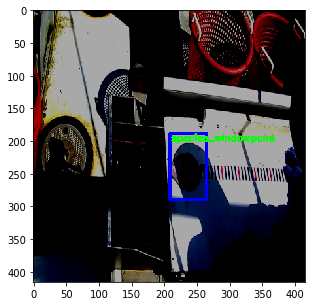

../extra_space/train_pics/gNQafQmsraR0hRHE/0100.jpg


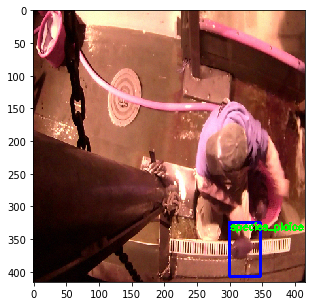

../extra_space/train_pics/VKANdmeVagzqEOEa/0438.jpg


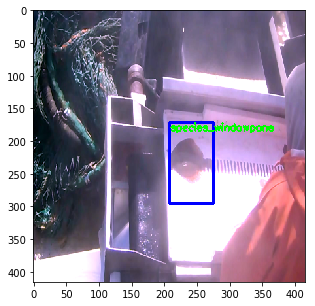

../extra_space/train_pics/BjAEkoY78RzsHmqU/0529.jpg


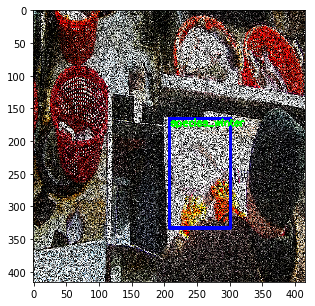

../extra_space/train_pics/TnucjZr0tw8xYcfN/0188.jpg


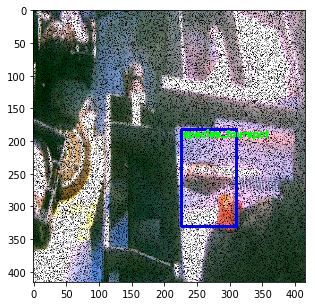

../extra_space/train_pics/KypGOVQ927hbsAbb/0753.jpg


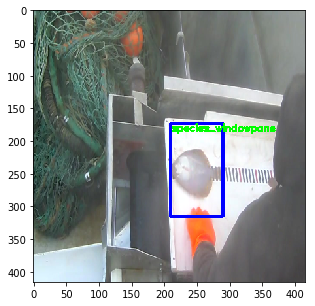

../extra_space/train_pics/59MAIrvUa1gaBNO0/0491.jpg


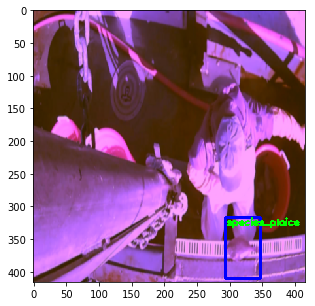

../extra_space/train_pics/BjAEkoY78RzsHmqU/2029.jpg


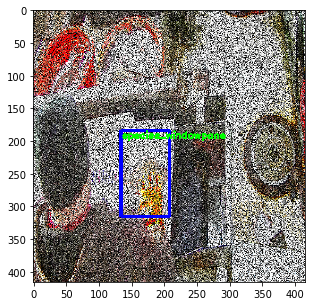

../extra_space/train_pics/qcp68XXpBWodRRLi/2334.jpg


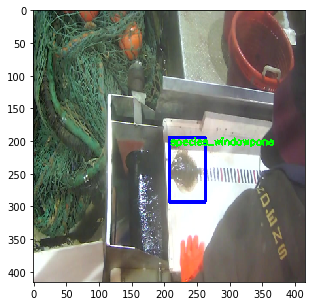

../extra_space/train_pics/KXlNhPpCgzBa7fMT/2405.jpg


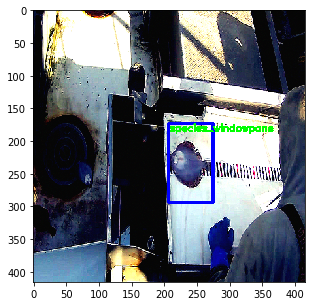

../extra_space/train_pics/xx0sW3Bw2b8fTNl4/0467.jpg


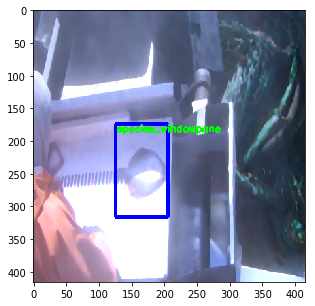

../extra_space/train_pics/dNqGK5IqMiVpFIKg/0983.jpg


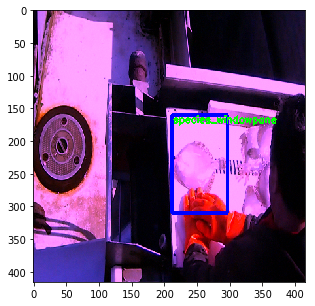

In [66]:
import random 

LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 2 * 6
WARM_UP_BATCHES  = 0
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.7

generator_config = {
    'IMAGE_H'         : IMAGE_H, 
    'IMAGE_W'         : IMAGE_W,
    'GRID_H'          : GRID_H,  
    'GRID_W'          : GRID_W,
    'BOX'             : BOX,
    'LABELS'          : LABELS,
    'CLASS'           : len(LABELS),
    'ANCHORS'         : ANCHORS,
    'BATCH_SIZE'      : BATCH_SIZE,
    'TRUE_BOX_BUFFER' : 50,
}

blank_imgs = random.sample(blank_imgs, int(len(blank_imgs)*(1-REMOVE_NEGATIVE_ITEMS)))
all_imgs = annotated_imgs + blank_imgs

train_imgs, valid_imgs = train_test_split(all_imgs, test_size=0.25, random_state=42)

train_batch = BatchGenerator(train_imgs, generator_config, jitter=True, aug_freq = 0.1)
valid_batch = BatchGenerator(valid_imgs, generator_config, jitter=True, aug_freq = 0.1)

batch = next(train_batch.get_generator())

../extra_space/train_pics/STGnqotNr63sZNqR/1363.jpg


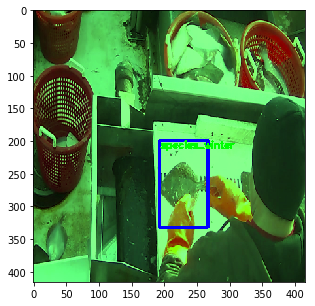

../extra_space/train_pics/ONO8fsACHoOPwimX/0495.jpg


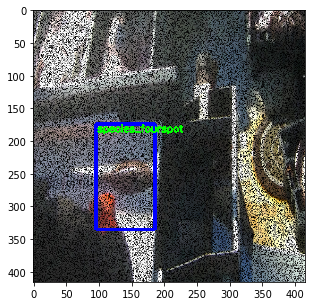

../extra_space/train_pics/hXD5gmov6jvRtg3U/2405.jpg


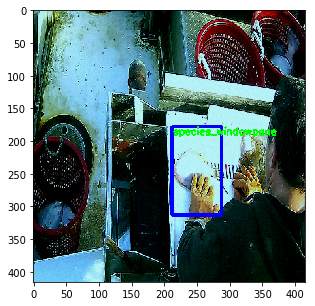

../extra_space/train_pics/6JQs2QybRSxJyHzd/0147.jpg


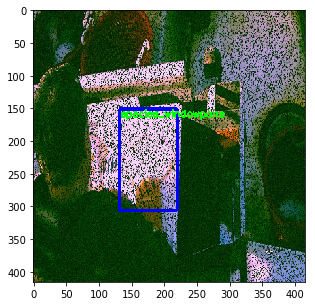

../extra_space/train_pics/VUJZDLKPIIGAmACv/0519.jpg


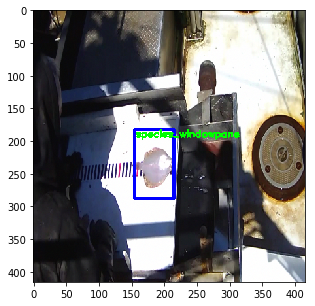

../extra_space/train_pics/1nEQbWGvn0KtuvxH/0879.jpg


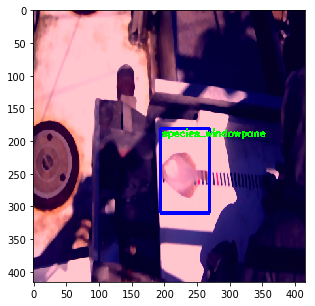

../extra_space/train_pics/KrvLjV1NRcD03c0p/0216.jpg


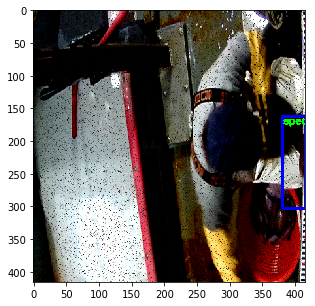

../extra_space/train_pics/cj41X6wIrsk2KbYO/0421.jpg


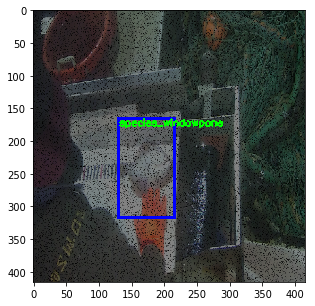

../extra_space/train_pics/SjsgbAtLMgqmLIRo/0307.jpg


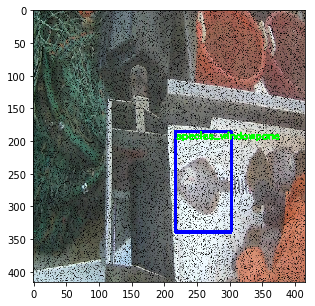

../extra_space/train_pics/MCeUwhsLuf6zLpEh/4032.jpg


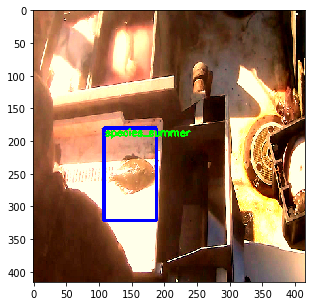

../extra_space/train_pics/ERQaFNlwmV7jUoCZ/0234.jpg


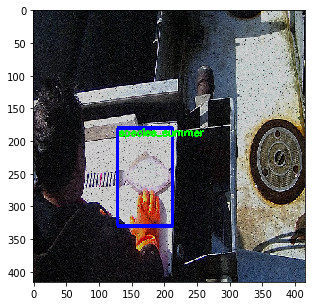

../extra_space/train_pics/m6FfOqtWnDLtG9Yh/0353.jpg


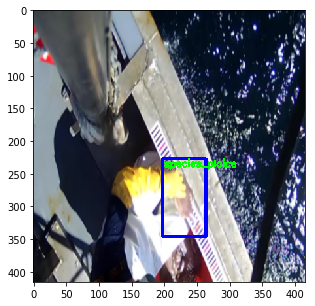

In [63]:
batch = next(train_batch.get_generator())

In [56]:
len(all_imgs)

61207

In [19]:
batch = next(train_batch.get_generator())

In [28]:
batch[0][0].shape

(24, 416, 416, 3)

## 3.1 Thread-safe generator

In [2]:
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import pickle
import os, cv2
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import random 

In [3]:
LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 2
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG_FREQ = 0.2
VALID_SHARE = 0.2
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']

In [4]:
def change_coords(x1,y1,x2,y2,f_len):
    
    max_x = 1280
    max_y = 720
    
    x_av = (x2+x1)/2
    y_av = (y2+y1)/2
    

    if(x_av-f_len/2)>max_x:`
        x1_new = max_x
    elif (x_av-f_len/2)<0:
        x1_new = 0
    else:
        x1_new=x_av-f_len/2 
        
    if(x_av+f_len/2)>max_x:
        x2_new = max_x
    else:
        x2_new=x_av+f_len/2 
        
    if(y_av-f_len/2)>max_y:
        y1_new = max_y
    elif (y_av-f_len/2)<0:
        y1_new = 0
    else:
        y1_new=y_av-f_len/2 

    if(y_av+f_len/2)>max_y:
        y2_new = max_y
    else:
        y2_new=y_av+f_len/2

    return x1_new,y1_new,x2_new,y2_new

def create_annot_dict(filename,label,xmin,xmax,ymin,ymax):
    try:
        return {
            'filename':filename,
            'object': [{
                'name': label,
                'xmax': int(xmax),
                'xmin': int(xmin),
                'ymax': int(ymax),
                'ymin': int(ymin)
            }]
        }    
    except:
        return {
            'filename':filename,
            'object': []
        }

df = pd.read_csv('train.csv')
df['_'] = df.apply(lambda row: change_coords(row['x1'],row['y1'],row['x2'],row['y2'],row['length']), axis=1)
df[['x1_new','y1_new','x2_new','y2_new']] = df['_'].apply(pd.Series)
del df['_']

cpt = {r:len(files) for r, d, files in os.walk('../extra_space/train_pics/')}
del cpt['../extra_space/train_pics/']
cpt = {k.split('/')[3]: v for k, v in cpt.items()}
cpt_zero = {k: v for k, v in cpt.items() if v == 0}
cpt_non_zero = {k: v for k, v in cpt.items() if v > 0}

species_list = LABELS

df['species'] = df[species_list].idxmax(axis=1)
df.loc[df.fish_number.isnull()==True, 'species'] = np.nan
df['path'] = df.apply(lambda row: '../extra_space/train_pics/{}/{}.jpg'.format(row['video_id'],str(row['frame']+1).zfill(4)), axis=1)
df['dict'] = df.apply(lambda row: create_annot_dict(row['path'],row['species'],row['x1_new'],row['x2_new'],row['y1_new'],row['y2_new']), axis=1)

blank_imgs = []
imgs_fish = set(list(df[df['fish_number'].notnull()].path.values))

# Create a list with all the images wo fishes using sets
# List comprehension is soooo fast compared to iteration
for vid in list(cpt_non_zero.keys()):
    imgs = glob.glob('../extra_space/train_pics/{}/*.jpg'.format(vid))
    imgs.sort()
    imgs = set(imgs)
    blank_imgs += [({'object':[], 'filename':img_path}) for img_path in imgs-imgs_fish]

annotated_imgs = []    
# Add images with annotation
# annotated_imgs += [(row.dict) for index, row in df[df['fish_number'].notnull()].iterrows()]
annotated_imgs += [(row.dict) for index, row in df[ (df['fish_number'].notnull()) & (~df.video_id.isin(list(cpt_zero.keys()))) ].iterrows()]


blank_imgs = random.sample(blank_imgs, int(len(blank_imgs)*(1-REMOVE_NEGATIVE_ITEMS)))
all_imgs = annotated_imgs + blank_imgs

train_imgs, valid_imgs = train_test_split(all_imgs, test_size=VALID_SHARE, random_state=42)

del all_imgs,blank_imgs,annotated_imgs,df


SyntaxError: invalid syntax (<ipython-input-4-ba771f2664b0>, line 10)

In [ ]:
import os
import cv2
import copy
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
import xml.etree.ElementTree as ET
from utils import BoundBox, normalize, bbox_iou

import time
import threading

class threadsafe_iter:
    """Takes an iterator/generator and makes it thread-safe by
    serializing call to the `next` method of given iterator/generator.
    """
    def __init__(self, it):
        self.it = it
        self.lock = threading.Lock()

    def __iter__(self):
        return self

    def next(self):
        with self.lock:
            return self.it.next()


def threadsafe_generator(f):
    """A decorator that takes a generator function and makes it thread-safe.
    """
    def g(*a, **kw):
        return threadsafe_iter(f(*a, **kw))
    return g


def parse_annotation(ann_dir, labels=[]):
    all_imgs = []
    
    for ann in sorted(os.listdir(ann_dir)):
        img = {'object':[]}
        
        tree = ET.parse(ann_dir + ann)
        
        for elem in tree.iter():
            if 'filename' in elem.tag:
                all_imgs += [img]
                img['filename'] = ann_dir[:-4] + '/' + elem.text
            if 'width' in elem.tag:
                img['width'] = int(elem.text)
            if 'height' in elem.tag:
                img['height'] = int(elem.text)
            if 'object' in elem.tag or 'part' in elem.tag:
                obj = {}
                
                for attr in list(elem):
                    if 'name' in attr.tag:
                        obj['name'] = attr.text
                        
                        if len(labels) > 0 and obj['name'] not in labels:
                            break
                        else:
                            img['object'] += [obj]
                            
                    if 'bndbox' in attr.tag:
                        for dim in list(attr):
                            if 'xmin' in dim.tag:
                                obj['xmin'] = int(round(float(dim.text)))
                            if 'ymin' in dim.tag:
                                obj['ymin'] = int(round(float(dim.text)))
                            if 'xmax' in dim.tag:
                                obj['xmax'] = int(round(float(dim.text)))
                            if 'ymax' in dim.tag:
                                obj['ymax'] = int(round(float(dim.text)))
                        
    return all_imgs

class BatchGenerator:
    def __init__(self, images, 
                       config, 
                       shuffle=True, 
                       jitter=True, 
                       norm=True,
                       aug_freq = 0.5):

        self.lock = threading.Lock()
        
        self.images = images
        self.config = config

        self.shuffle = shuffle
        self.jitter  = jitter
        self.norm    = norm

        self.anchors = [BoundBox(0, 0, config['ANCHORS'][2*i], config['ANCHORS'][2*i+1]) for i in range(int(len(config['ANCHORS'])/2))]

        ### augmentors by https://github.com/aleju/imgaug
        sometimes = lambda aug: iaa.Sometimes(aug_freq, aug)

        # Define our sequence of augmentation steps that will be applied to every image
        # All augmenters with per_channel=0.5 will sample one value _per image_
        # in 50% of all cases. In all other cases they will sample new values
        # _per channel_.
        self.aug_pipe = iaa.Sequential(
            [
                # apply the following augmenters to most images
                #iaa.Fliplr(0.5), # horizontally flip 50% of all images
                #iaa.Flipud(0.2), # vertically flip 20% of all images
                #sometimes(iaa.Crop(percent=(0, 0.1))), # crop images by 0-10% of their height/width
                sometimes(iaa.Affine(
                    #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
                    #translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
                    #rotate=(-5, 5), # rotate by -45 to +45 degrees
                    #shear=(-5, 5), # shear by -16 to +16 degrees
                    #order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
                    #cval=(0, 255), # if mode is constant, use a cval between 0 and 255
                    #mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
                )),
                # execute 0 to 5 of the following (less important) augmenters per image
                # don't execute all of them, as that would often be way too strong
                iaa.SomeOf((1, 5),
                    [
                        #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                        iaa.OneOf([
                            iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                            iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                            iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                        ]),
                        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                        #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                        # search either for all edges or for directed edges
                        #sometimes(iaa.OneOf([
                        #    iaa.EdgeDetect(alpha=(0, 0.7)),
                        #    iaa.DirectedEdgeDetect(alpha=(0, 0.7), direction=(0.0, 1.0)),
                        #])),
                        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                        iaa.OneOf([
                            iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                            #iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                        ]),
                        #iaa.Invert(0.05, per_channel=True), # invert color channels
                        iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                        iaa.Multiply((0.5, 1.5), per_channel=0.5), # change brightness of images (50-150% of original value)
                        iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5), # improve or worsen the contrast
                        #iaa.Grayscale(alpha=(0.0, 1.0)),
                        #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                        #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))) # sometimes move parts of the image around
                    ],
                    random_order=True
                )
            ],
            random_order=True
        )

        if shuffle: np.random.shuffle(self.images)

    def get_generator(self):
        
        with self.lock:
            
            num_img = len(self.images)

            total_count = 0
            batch_count = 0

            x_batch = np.zeros((self.config['BATCH_SIZE'], self.config['IMAGE_H'], self.config['IMAGE_W'], 3))                         # input images
            b_batch = np.zeros((self.config['BATCH_SIZE'], 1     , 1     , 1    ,  self.config['TRUE_BOX_BUFFER'], 4))   # list of self.config['TRUE_self.config['BOX']_BUFFER'] GT boxes
            y_batch = np.zeros((self.config['BATCH_SIZE'], self.config['GRID_H'],  self.config['GRID_W'], self.config['BOX'], 4+1+1))                # desired network output

            while True:
                if total_count < num_img:
                    train_instance = self.images[total_count]

                    # augment input image and fix object's position and size
                    img, all_objs = self.aug_image(train_instance, jitter=self.jitter)

                    # construct output from object's x, y, w, h
                    true_box_index = 0

                    for obj in all_objs:
                        if obj['xmax'] > obj['xmin'] and obj['ymax'] > obj['ymin'] and obj['name'] in self.config['LABELS']:
                            center_x = .5*(obj['xmin'] + obj['xmax'])
                            center_x = center_x / (float(self.config['IMAGE_W']) / self.config['GRID_W'])
                            center_y = .5*(obj['ymin'] + obj['ymax'])
                            center_y = center_y / (float(self.config['IMAGE_H']) / self.config['GRID_H'])

                            grid_x = int(np.floor(center_x))
                            grid_y = int(np.floor(center_y))

                            if grid_x < self.config['GRID_W'] and grid_y < self.config['GRID_H']:
                                obj_indx  = self.config['LABELS'].index(obj['name'])

                                center_w = (obj['xmax'] - obj['xmin']) / (float(self.config['IMAGE_W']) / self.config['GRID_W']) # unit: grid cell
                                center_h = (obj['ymax'] - obj['ymin']) / (float(self.config['IMAGE_W']) / self.config['GRID_W']) # unit: grid cell

                                box = [center_x, center_y, center_w, center_h]

                                # find the anchor that best predicts this box
                                best_anchor = -1
                                max_iou     = -1

                                shifted_box = BoundBox(0, 
                                                       0, 
                                                       center_w, 
                                                       center_h)

                                for i in range(len(self.anchors)):
                                    anchor = self.anchors[i]
                                    iou    = bbox_iou(shifted_box, anchor)

                                    if max_iou < iou:
                                        best_anchor = i
                                        max_iou     = iou

                                # assign ground truth x, y, w, h, confidence and class probs to y_batch
                                y_batch[batch_count, grid_y, grid_x, best_anchor, 0:4]        = box
                                y_batch[batch_count, grid_y, grid_x, best_anchor, 4  ]        = 1.
                                y_batch[batch_count, grid_y, grid_x, best_anchor, 5  ]        = obj_indx

                                # assign the true box to b_batch
                                b_batch[batch_count, 0, 0, 0, true_box_index] = box

                                true_box_index += 1
                                true_box_index = true_box_index % self.config['TRUE_BOX_BUFFER']

                    # assign input image to x_batch
                    if self.norm: 
                        x_batch[batch_count] = normalize(img)
                    else:
                        x_batch[batch_count] = img

                        # plot image and bounding boxes for sanity check
                        for obj in all_objs:
                            if obj['xmax'] > obj['xmin'] and obj['ymax'] > obj['ymin']:
                                cv2.rectangle(img[:,:,::-1], (obj['xmin'],obj['ymin']), (obj['xmax'],obj['ymax']), (255,0,0), 3)
                                cv2.putText(img[:,:,::-1], obj['name'], 
                                            (obj['xmin']+2, obj['ymin']+12), 
                                            0, 1.2e-3 * img.shape[0], 
                                            (0,255,0), 2)
                        plt.figure(figsize=(10,10)); plt.imshow(img); plt.show()

                    # increase instance counter in current batch
                    batch_count += 1  

                total_count += 1
                if total_count >= num_img:
                    total_count = 0
                    if self.shuffle: np.random.shuffle(self.images)                    

                if batch_count >= self.config['BATCH_SIZE']:
                    yield [x_batch, b_batch], y_batch

                    x_batch = np.zeros((self.config['BATCH_SIZE'], self.config['IMAGE_H'], self.config['IMAGE_W'], 3))
                    y_batch = np.zeros((self.config['BATCH_SIZE'], self.config['GRID_H'],  self.config['GRID_W'],  self.config['BOX'], 5+self.config['CLASS']))       

                    batch_count = 0

    def aug_image(self, train_instance, jitter):
        image_name = train_instance['filename']
        image = cv2.imread(image_name)
        h, w, c = image.shape
        
        all_objs = copy.deepcopy(train_instance['object'])

        if jitter:
            ### scale the image
            scale = np.random.uniform() / 10. + 1.
            image = cv2.resize(image, (0,0), fx = scale, fy = scale)

            ### translate the image
            max_offx = (scale-1.) * w
            max_offy = (scale-1.) * h
            offx = int(np.random.uniform() * max_offx)
            offy = int(np.random.uniform() * max_offy)
            
            image = image[offy : (offy + h), offx : (offx + w)]

            ### flip the image
            flip = np.random.binomial(1, .5)
            if flip > 0.5: image = cv2.flip(image, 1)
                
            image = self.aug_pipe.augment_image(image)            
            
        # resize the image to standard size
        image = cv2.resize(image, (self.config['IMAGE_H'], self.config['IMAGE_W']))
        image = image[:,:,::-1]

        # fix object's position and size
        for obj in all_objs:
            for attr in ['xmin', 'xmax']:
                if jitter: obj[attr] = int(obj[attr] * scale - offx)
                    
                obj[attr] = int(obj[attr] * float(self.config['IMAGE_W']) / w)
                obj[attr] = max(min(obj[attr], self.config['IMAGE_W']), 0)
                
            for attr in ['ymin', 'ymax']:
                if jitter: obj[attr] = int(obj[attr] * scale - offy)
                    
                obj[attr] = int(obj[attr] * float(self.config['IMAGE_H']) / h)
                obj[attr] = max(min(obj[attr], self.config['IMAGE_H']), 0)

            if jitter and flip > 0.5:
                xmin = obj['xmin']
                obj['xmin'] = self.config['IMAGE_W'] - obj['xmax']
                obj['xmax'] = self.config['IMAGE_W'] - xmin
                
        return image, all_objs

    def get_dateset_size(self):
        return len(self.images)/self.config['BATCH_SIZE']

## 3.2 Normalize class counts

In [1]:
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import pickle
import os, cv2
from preprocessing import parse_annotation, BatchGenerator
from utils import WeightReader, decode_netout, draw_boxes
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import random 

LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 2
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG_FREQ = 0.2
VALID_SHARE = 0.2
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']


generator_config = {
    'IMAGE_H'         : IMAGE_H, 
    'IMAGE_W'         : IMAGE_W,
    'GRID_H'          : GRID_H,  
    'GRID_W'          : GRID_W,
    'BOX'             : BOX,
    'LABELS'          : LABELS,
    'CLASS'           : len(LABELS),
    'ANCHORS'         : ANCHORS,
    'BATCH_SIZE'      : BATCH_SIZE,
    'TRUE_BOX_BUFFER' : 2,
}


def change_coords(x1,y1,x2,y2,f_len):
    
    max_x = 1280
    max_y = 720
    
    x_av = (x2+x1)/2
    y_av = (y2+y1)/2
    

    if(x_av-f_len/2)>max_x:
        x1_new = max_x
    elif (x_av-f_len/2)<0:
        x1_new = 0
    else:
        x1_new=x_av-f_len/2 
        
    if(x_av+f_len/2)>max_x:
        x2_new = max_x
    else:
        x2_new=x_av+f_len/2 
        
    if(y_av-f_len/2)>max_y:
        y1_new = max_y
    elif (y_av-f_len/2)<0:
        y1_new = 0
    else:
        y1_new=y_av-f_len/2 

    if(y_av+f_len/2)>max_y:
        y2_new = max_y
    else:
        y2_new=y_av+f_len/2

    return x1_new,y1_new,x2_new,y2_new

def create_annot_dict(filename,label,xmin,xmax,ymin,ymax):
    try:
        return {
            'filename':filename,
            'object': [{
                'name': label,
                'xmax': int(xmax),
                'xmin': int(xmin),
                'ymax': int(ymax),
                'ymin': int(ymin)
            }]
        }    
    except:
        return {
            'filename':filename,
            'object': []
        }

df = pd.read_csv('train.csv')
df['_'] = df.apply(lambda row: change_coords(row['x1'],row['y1'],row['x2'],row['y2'],row['length']), axis=1)
df[['x1_new','y1_new','x2_new','y2_new']] = df['_'].apply(pd.Series)
del df['_']

cpt = {r:len(files) for r, d, files in os.walk('../extra_space/train_pics/')}
del cpt['../extra_space/train_pics/']
cpt = {k.split('/')[3]: v for k, v in cpt.items()}
cpt_zero = {k: v for k, v in cpt.items() if v == 0}
cpt_non_zero = {k: v for k, v in cpt.items() if v > 0}

species_list = LABELS

df['species'] = df[species_list].idxmax(axis=1)
df.loc[df.fish_number.isnull()==True, 'species'] = np.nan
df['path'] = df.apply(lambda row: '../extra_space/train_pics/{}/{}.jpg'.format(row['video_id'],str(row['frame']+1).zfill(4)), axis=1)
df['dict'] = df.apply(lambda row: create_annot_dict(row['path'],row['species'],row['x1_new'],row['x2_new'],row['y1_new'],row['y2_new']), axis=1)

blank_imgs = []
imgs_fish = set(list(df[df['fish_number'].notnull()].path.values))

# Create a list with all the images wo fishes using sets
# List comprehension is soooo fast compared to iteration
for vid in list(cpt_non_zero.keys()):
    imgs = glob.glob('../extra_space/train_pics/{}/*.jpg'.format(vid))
    imgs.sort()
    imgs = set(imgs)
    blank_imgs += [({'object':[], 'filename':img_path}) for img_path in imgs-imgs_fish]

annotated_imgs = []    
# Add images with annotation
# annotated_imgs += [(row.dict) for index, row in df[df['fish_number'].notnull()].iterrows()]
annotated_imgs += [(row.dict) for index, row in df[ (df['fish_number'].notnull()) & (~df.video_id.isin(list(cpt_zero.keys()))) ].iterrows()]


blank_imgs = random.sample(blank_imgs, int(len(blank_imgs)*(1-REMOVE_NEGATIVE_ITEMS)))
all_imgs = annotated_imgs + blank_imgs

train_imgs, valid_imgs = train_test_split(all_imgs, test_size=VALID_SHARE, random_state=42)

# del all_imgs,blank_imgs,annotated_imgs, df



In [47]:
d = dict.fromkeys(range(100))
keys = random.sample(list(d), 10)
keys


[59, 43, 36, 61, 29, 68, 38, 64, 98, 13]

In [69]:
import random

class_list =  ['species_fourspot',
       'species_grey sole',
       'species_other', 
       'species_plaice',
       'species_summer',
       'species_windowpane',
       'species_winter']

objects = []
for obj in all_imgs:
    if len(obj['object']):
        objects.append(obj['object'][0]['name'])
        
from collections import Counter

class_count = Counter(objects)
class_size = sorted(class_count.values(), reverse=True)[-1]

randomized_imgs = []

for fish_class in class_list:
    fish_class_list = []
    for obj in all_imgs:
        if len(obj['object']):
            if obj['object'][0]['name'] == fish_class:
                fish_class_list.append(obj)
    
    # do 3 random subsamples of fishes in each class
    for i in range(0,3):
        randomized_imgs.extend(random.sample(fish_class_list, class_size))
    
empty_frame_list = []
for obj in all_imgs:
    if not len(obj['object']):
        empty_frame_list.append(obj)

for i in range(0,3):
    randomized_imgs.extend(random.sample(empty_frame_list, class_size))


In [71]:
randomized_imgs

[{'filename': '../extra_space/train_pics/tvkFVfcMF8KHWqL2/0939.jpg',
  'object': [{'name': 'species_fourspot',
    'xmax': 910,
    'xmin': 701,
    'ymax': 528,
    'ymin': 320}]},
 {'filename': '../extra_space/train_pics/VVOkyE3UqjsrjlJS/2075.jpg',
  'object': [{'name': 'species_fourspot',
    'xmax': 904,
    'xmin': 698,
    'ymax': 531,
    'ymin': 326}]},
 {'filename': '../extra_space/train_pics/Rfd2X6jC704QzOAl/1718.jpg',
  'object': [{'name': 'species_fourspot',
    'xmax': 886,
    'xmin': 696,
    'ymax': 519,
    'ymin': 330}]},
 {'filename': '../extra_space/train_pics/MCeUwhsLuf6zLpEh/0148.jpg',
  'object': [{'name': 'species_fourspot',
    'xmax': 956,
    'xmin': 706,
    'ymax': 569,
    'ymin': 320}]},
 {'filename': '../extra_space/train_pics/Yx1GtnZsSiV2fJEq/0381.jpg',
  'object': [{'name': 'species_fourspot',
    'xmax': 963,
    'xmin': 708,
    'ymax': 575,
    'ymin': 320}]},
 {'filename': '../extra_space/train_pics/LR1u0pUsUSvPXcUt/0765.jpg',
  'object': [{'name':

In [68]:
41904/8/3

1746.0

In [28]:
tmp_list[2][0]

{'name': 'species_grey sole',
 'xmax': 805,
 'xmin': 632,
 'ymax': 556,
 'ymin': 383}

In [17]:
all_imgs[0]['object'][0]

{'name': 'species_grey sole',
 'xmax': 795,
 'xmin': 629,
 'ymax': 550,
 'ymin': 385}

In [ ]:
def normalize_classes(imgs):
    class_list =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']


# 4. Experiment log

**1. Fist normal run**

<details>
 <summary>params</summary>

<pre>
LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 2
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG_FREQ = 0.2
VALID_SHARE = 0.1
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']
</pre>

</details>

**Result**

- model trains properly, though unstable during first batches (lower lr + model settings help)
- ca. 3000 loss after epoch 1
- ca. 1.5 loss during epoch 2
- ca. 0.5 loss in 8 epochs
- remove data augmentations - 10x training speed-up increase wo augmentations, terminal loss ~0.1 - 0.5

**2. Tune the params**

- Stabilize classes in the dataset (too many of one class)
- Do more proper train test spliot 
- Do augmentation only at last stages

<details>
 <summary>First run</summary>

<pre>
lr 1e-4

LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 4
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG = False
AUG_FREQ = 0.2
VALID_SHARE = 0.2
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']
# class normalization - take the size of the smallest class, multiply by 3, use this amount of images per class, randomize on each epoch
</pre>

</details>

<details>
 <summary>Second run</summary>

<pre>
lr 1e-5 + 0.05 per epoch decay

LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 4
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG = True
AUG_FREQ = 0.2
VALID_SHARE = 0.2
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']
# class normalization - take the size of the smallest class, multiply by 3, use this amount of images per class, randomize on each epoch
</pre>

</details>

**Result**

Final loss ca. 0.8 after ~10 epochs w lr=1e-4 and 45 epochs w lr=1e-5 

### Test model on a random video

In [3]:
from keras.models import Sequential, Model
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, CSVLogger
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import pickle
import os, cv2
from preprocessing import parse_annotation, BatchGenerator
from utils import WeightReader, decode_netout, draw_boxes
from tools.multi_gpu import *
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import random 


LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 2
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG_FREQ = 0.2
VALID_SHARE = 0.2
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']

def custom_loss(y_true, y_pred):
    mask_shape = tf.shape(y_true)[:4]
    
    cell_x = tf.to_float(tf.reshape(tf.tile(tf.range(GRID_W), [GRID_H]), (1, GRID_H, GRID_W, 1, 1)))
    cell_y = tf.transpose(cell_x, (0,2,1,3,4))

    cell_grid = tf.tile(tf.concat([cell_x,cell_y], -1), [BATCH_SIZE, 1, 1, 5, 1])
    
    coord_mask = tf.zeros(mask_shape)
    conf_mask  = tf.zeros(mask_shape)
    class_mask = tf.zeros(mask_shape)
    
    seen = tf.Variable(0.)
    
    total_AP = tf.Variable(0.)
    
    """
    Adjust prediction
    """
    ### adjust x and y      
    pred_box_xy = tf.sigmoid(y_pred[..., :2]) + cell_grid
    
    ### adjust w and h
    pred_box_wh = tf.exp(y_pred[..., 2:4]) * np.reshape(ANCHORS, [1,1,1,BOX,2])
    
    ### adjust confidence
    pred_box_conf = tf.sigmoid(y_pred[..., 4])
    
    ### adjust class probabilities
    pred_box_class = y_pred[..., 5:]
    
    """
    Adjust ground truth
    """
    ### adjust x and y
    true_box_xy = y_true[..., 0:2] # relative position to the containing cell
    
    ### adjust w and h
    true_box_wh = y_true[..., 2:4] # number of cells accross, horizontally and vertically
    
    ### adjust confidence
    true_wh_half = true_box_wh / 2.
    true_mins    = true_box_xy - true_wh_half
    true_maxes   = true_box_xy + true_wh_half
    
    pred_wh_half = pred_box_wh / 2.
    pred_mins    = pred_box_xy - pred_wh_half
    pred_maxes   = pred_box_xy + pred_wh_half       
    
    intersect_mins  = tf.maximum(pred_mins,  true_mins)
    intersect_maxes = tf.minimum(pred_maxes, true_maxes)
    intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
    
    true_areas = true_box_wh[..., 0] * true_box_wh[..., 1]
    pred_areas = pred_box_wh[..., 0] * pred_box_wh[..., 1]

    union_areas = pred_areas + true_areas - intersect_areas
    iou_scores  = tf.truediv(intersect_areas, union_areas)
    
    true_box_conf = iou_scores * y_true[..., 4]
    
    ### adjust class probabilities
    true_box_class = tf.to_int32(y_true[..., 5])
    
    """
    Determine the masks
    """
    ### coordinate mask: simply the position of the ground truth boxes (the predictors)
    coord_mask = tf.expand_dims(y_true[..., 4], axis=-1) * COORD_SCALE
    
    ### confidence mask: penelize predictors + penalize boxes with low IOU
    # penalize the confidence of the boxes, which have IOU with some ground truth box < 0.6
    true_xy = true_boxes[..., 0:2]
    true_wh = true_boxes[..., 2:4]
    
    true_wh_half = true_wh / 2.
    true_mins    = true_xy - true_wh_half
    true_maxes   = true_xy + true_wh_half
    
    pred_xy = tf.expand_dims(pred_box_xy, 4)
    pred_wh = tf.expand_dims(pred_box_wh, 4)
    
    pred_wh_half = pred_wh / 2.
    pred_mins    = pred_xy - pred_wh_half
    pred_maxes   = pred_xy + pred_wh_half    
    
    intersect_mins  = tf.maximum(pred_mins,  true_mins)
    intersect_maxes = tf.minimum(pred_maxes, true_maxes)
    intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
    
    true_areas = true_wh[..., 0] * true_wh[..., 1]
    pred_areas = pred_wh[..., 0] * pred_wh[..., 1]

    union_areas = pred_areas + true_areas - intersect_areas
    iou_scores  = tf.truediv(intersect_areas, union_areas)

    best_ious = tf.reduce_max(iou_scores, axis=4)
    conf_mask = conf_mask + tf.to_float(best_ious < 0.6) * (1 - y_true[..., 4]) * NO_OBJECT_SCALE
    
    # penalize the confidence of the boxes, which are reponsible for corresponding ground truth box
    conf_mask = conf_mask + y_true[..., 4] * OBJECT_SCALE
    
    ### class mask: simply the position of the ground truth boxes (the predictors)
    class_mask = y_true[..., 4] * tf.gather(CLASS_WEIGHTS, true_box_class) * CLASS_SCALE       
    
    """
    Warm-up training
    """
    no_boxes_mask = tf.to_float(coord_mask < COORD_SCALE/2.)
    seen = tf.assign_add(seen, 1.)
    
    true_box_xy, true_box_wh, coord_mask = tf.cond(tf.less(seen, WARM_UP_BATCHES), 
                          lambda: [true_box_xy + (0.5 + cell_grid) * no_boxes_mask, 
                                   true_box_wh + tf.ones_like(true_box_wh) * np.reshape(ANCHORS, [1,1,1,BOX,2]) * no_boxes_mask, 
                                   tf.ones_like(coord_mask)],
                          lambda: [true_box_xy, 
                                   true_box_wh,
                                   coord_mask])
    
    """
    Finalize the loss
    """
    nb_coord_box = tf.reduce_sum(tf.to_float(coord_mask > 0.0))
    nb_conf_box  = tf.reduce_sum(tf.to_float(conf_mask  > 0.0))
    nb_class_box = tf.reduce_sum(tf.to_float(class_mask > 0.0))
    
    loss_xy    = tf.reduce_sum(tf.square(true_box_xy-pred_box_xy)     * coord_mask) / (nb_coord_box + 1e-6) / 2.
    loss_wh    = tf.reduce_sum(tf.square(true_box_wh-pred_box_wh)     * coord_mask) / (nb_coord_box + 1e-6) / 2.
    loss_conf  = tf.reduce_sum(tf.square(true_box_conf-pred_box_conf) * conf_mask)  / (nb_conf_box  + 1e-6) / 2.
    loss_class = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=true_box_class, logits=pred_box_class)
    loss_class = tf.reduce_sum(loss_class * class_mask) / (nb_class_box + 1e-6)
    
    loss = loss_xy + loss_wh + loss_conf + loss_class
    
    # nb_true_box = tf.reduce_sum(y_true[..., 4])
    # nb_pred_box = tf.reduce_sum(tf.to_float(true_box_conf > 0.5))
    
    # total_AP = tf.assign_add(total_AP, nb_pred_box/nb_true_box) 
    
    # loss = tf.Print(loss, [loss_xy, loss_wh, loss_conf, loss_class, loss, total_AP/seen], message='DEBUG', summarize=1000)
    
    return loss

# the function to implement the orgnization layer (thanks to github.com/allanzelener/YAD2K)
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

input_image = Input(shape=(IMAGE_H, IMAGE_W, 3))
true_boxes  = Input(shape=(1, 1, 1, TRUE_BOX_BUFFER , 4))

# Layer 1
x = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
x = BatchNormalization(name='norm_1')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 2
x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(x)
x = BatchNormalization(name='norm_2')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 3
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(x)
x = BatchNormalization(name='norm_3')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 4
x = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_4', use_bias=False)(x)
x = BatchNormalization(name='norm_4')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 5
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(x)
x = BatchNormalization(name='norm_5')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 6
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
x = BatchNormalization(name='norm_6')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 7
x = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_7', use_bias=False)(x)
x = BatchNormalization(name='norm_7')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 8
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False, input_shape=(416,416,3))(x)
x = BatchNormalization(name='norm_8')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 9
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(x)
x = BatchNormalization(name='norm_9')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 10
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_10', use_bias=False)(x)
x = BatchNormalization(name='norm_10')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 11
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(x)
x = BatchNormalization(name='norm_11')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 12
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_12', use_bias=False)(x)
x = BatchNormalization(name='norm_12')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 13
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_13', use_bias=False)(x)
x = BatchNormalization(name='norm_13')(x)
x = LeakyReLU(alpha=0.1)(x)

skip_connection = x

x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 14
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(x)
x = BatchNormalization(name='norm_14')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 15
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_15', use_bias=False)(x)
x = BatchNormalization(name='norm_15')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 16
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(x)
x = BatchNormalization(name='norm_16')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 17
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_17', use_bias=False)(x)
x = BatchNormalization(name='norm_17')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 18
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(x)
x = BatchNormalization(name='norm_18')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 19
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_19', use_bias=False)(x)
x = BatchNormalization(name='norm_19')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 20
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_20', use_bias=False)(x)
x = BatchNormalization(name='norm_20')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 21
skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_21', use_bias=False)(skip_connection)
skip_connection = BatchNormalization(name='norm_21')(skip_connection)
skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
skip_connection = Lambda(space_to_depth_x2)(skip_connection)

x = concatenate([skip_connection, x])

# Layer 22
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_22', use_bias=False)(x)
x = BatchNormalization(name='norm_22')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 23
x = Conv2D((4 + 1 + CLASS) * 5, (1,1), strides=(
    1,1), padding='same', name='conv_23')(x)
output = Reshape((GRID_H, GRID_W, BOX, 4 + 1 + CLASS))(x)

# small hack to allow true_boxes to be registered when Keras build the model 
# for more information: https://github.com/fchollet/keras/issues/2790
output = Lambda(lambda args: args[0])([output, true_boxes])

model = Model([input_image, true_boxes], output)


model = make_parallel(model, gpu_count=2)
model.load_weights('weights/yolo_fish_class_norm_ft.h5')

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss=custom_loss, optimizer=optimizer)
graph = tf.get_default_graph()

Using TensorFlow backend.
/home/keras/notebook/fish-video/tools/multi_gpu.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merged.append(merge(outputs, mode='concat', concat_axis=0))
/opt/conda/lib/python3.5/site-packages/Keras-2.0.8-py3.5.egg/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/keras/notebook/fish-video/tools/multi_gpu.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  return Model(input=model.inputs, output=merged)


In [17]:
import pandas as pd
import cv2
import numpy as np
import pandas as pd
import threading
import queue
# import tensorflow as tf
from tqdm import tqdm
from utils import decode_netout, draw_boxes, get_best_box
from random import shuffle
from multiprocessing.dummy import Pool as ThreadPool 

broken_vids = ['LU2DSX6VZcIsiyaW',
'ZU6XtvFk0UMrHLEL',
'pGd0FSJQcDH5DI8x',
'P3QkoeOjxoM6pDKb',
'8jkQWJWPCtIvcnmH',
'tJinkrdMMZ477RGi',
'Sw0AgnH8BY1BDGHu',
'bc6hkwua3iLReunk']

input_size = 416
batch_size = 48 * 2

dummy_array = np.zeros((1,1,1,2,4))

df_sub = pd.read_csv('submission.csv')
df_sub.head()

df_sub['xmin'] = 0
df_sub['xmax'] = 0
df_sub['ymin'] = 0
df_sub['ymax'] = 0

df_sub_10 = pd.read_csv('submission.csv')
df_sub_30 = pd.read_csv('submission.csv')
df_sub_50 = pd.read_csv('submission.csv')

df_sub_10['xmin'] = 0
df_sub_10['xmax'] = 0
df_sub_10['ymin'] = 0
df_sub_10['ymax'] = 0

df_sub_30['xmin'] = 0
df_sub_30['xmax'] = 0
df_sub_30['ymin'] = 0
df_sub_30['ymax'] = 0

df_sub_50['xmin'] = 0
df_sub_50['xmax'] = 0
df_sub_50['ymin'] = 0
df_sub_50['ymax'] = 0



rand_list = set(list(df_sub.video_id.unique())) - set(broken_vids)
rand_list = list(rand_list)
shuffle(rand_list)

rand_list = ['l31ndpFRLM7ozY3H']

ids_test = [{'row_id':row[0],'frame':row[1],'video_id':row[2]} 
            for row in df_sub[(df_sub.video_id.isin(rand_list[0:1])) & (~df_sub.video_id.isin(broken_vids))][['row_id','frame','video_id']].values]


q_size = 10

print (rand_list[0:1])


model.load_weights('weights/yolo_fish_3.h5')


def read_frame(video_id,frame,input_size):
    try:
        img = cv2.imread('../extra_space/test_pics/{}/{}.jpg'.format(video_id,str(frame+1).zfill(4)))
        img = cv2.resize(img, (input_size, input_size))
    except:
        img = np.random.rand(input_size,input_size,3)
        
    return img
        
    
def data_loader(q, ):
    for start in range(0, len(ids_test), batch_size):
        
        x_batch = []
        b_batch = []
        meta_batch = []
        
        end = min(start + batch_size, len(ids_test))
        ids_test_batch = ids_test[start:end]
        
        pool = ThreadPool(len(ids_test_batch))
        pool_params = [(id['video_id'],id['frame'],input_size) for id in ids_test_batch]
        imgs = pool.starmap(read_frame, pool_params)
        pool.close() 
        pool.join()         

        for img in imgs:
            x_batch.append(img)
            
        for id in ids_test_batch:
            
            # img = read_frame(id['video_id'],id['frame'],input_size)
            # x_batch.append(img)
            b_batch.append(dummy_array)
            meta_batch.append([(id['video_id'],str(id['frame']+1).zfill(4))])
            
        x_batch = np.array(x_batch, np.float32) / 255
        b_batch = np.array(b_batch, np.int16) 
        
        q.put([x_batch,b_batch,meta_batch])

        
def predictor(q, ):
    for i in tqdm(range(0, len(ids_test), batch_size)):
        batch = q.get()

        # print(batch[0].shape)
        # print(batch[1].shape)
        # print(batch[2].shape)        
        with graph.as_default():
            netout = model.predict_on_batch([batch[0],batch[1]])
            np.save('raw_net_out_batch_{}'.format(i), netout)
        for pred, image, metadata in zip(netout,batch[0],batch[2]):
            try:
                image = image * 255
                
                boxes_10 = np.copy(pred)
                boxes_30 = np.copy(pred)
                
                boxes = decode_netout(pred, obj_threshold=0.3, nms_threshold=0.3, anchors=ANCHORS, nb_class=CLASS)
                np.save('decoded_net_out_batch_{}'.format(i), netout)
                # Do something only if there any bounding boxes

                
                boxes_10 = decode_netout(boxes_10, obj_threshold=0.1, nms_threshold=0.0, anchors=ANCHORS, nb_class=CLASS)
                boxes_30 = decode_netout(boxes_30, obj_threshold=0.3, nms_threshold=0.0, anchors=ANCHORS, nb_class=CLASS)
                boxes_50 = decode_netout(pred, obj_threshold=0.5, nms_threshold=0.0, anchors=ANCHORS, nb_class=CLASS)
                
                # Do something only if there any bounding boxes
                if boxes_10:
                    # leaves a list of only one best box
                    boxes_10 = get_best_box(boxes_10)
                    box = boxes_10[0]

                    xmin  = int((box.x - box.w/2) * image.shape[1])
                    xmax  = int((box.x + box.w/2) * image.shape[1])
                    ymin  = int((box.y - box.h/2) * image.shape[0])
                    ymax  = int((box.y + box.h/2) * image.shape[0])               
                    
                    df_sub_10.loc[(df_sub_10.video_id == metadata[0][0]) 
                               & (df_sub_10.frame == (int(metadata[0][1])-1)),
                               LABELS+['xmin','xmax','ymin','ymax']
                              ] = box.classes[0], box.classes[1],box.classes[2],box.classes[3], box.classes[4],box.classes[5],box.classes[6],xmin,xmax,ymin,ymax
                    
                # Do something only if there any bounding boxes
                if boxes_30:
                    # leaves a list of only one best box
                    boxes_30 = get_best_box(boxes_30)
                    box = boxes_30[0]

                    xmin  = int((box.x - box.w/2) * image.shape[1])
                    xmax  = int((box.x + box.w/2) * image.shape[1])
                    ymin  = int((box.y - box.h/2) * image.shape[0])
                    ymax  = int((box.y + box.h/2) * image.shape[0])               
                    
                    df_sub_30.loc[(df_sub_30.video_id == metadata[0][0]) 
                               & (df_sub_30.frame == (int(metadata[0][1])-1)),
                               LABELS+['xmin','xmax','ymin','ymax']
                              ] = box.classes[0], box.classes[1],box.classes[2],box.classes[3], box.classes[4],box.classes[5],box.classes[6],xmin,xmax,ymin,ymax
                    # only for visual inspection
                    # image = draw_boxes(image, boxes, labels=LABELS) 
                   
                # only for visual inspection                    
                # cv2.imwrite('inspect_vids/live_model_test/{}_{}.jpg'.format(metadata[0][0],metadata[0][1]),image)
                
            except Exception as e:
                print (str(e))
                print('Error with {} {}'.format(metadata[0][0],metadata[0][1]))

q = queue.Queue(maxsize=q_size)
t1 = threading.Thread(target=data_loader, name='DataLoader', args=(q,))
t2 = threading.Thread(target=predictor, name='Predictor', args=(q,))
print('Predicting on {} samples with batch_size = {}...'.format(len(ids_test), batch_size))
t1.start()
t2.start()
# Wait for both threads to finish
t1.join()
t2.join()
df_sub.to_csv('test_data.csv')



  0%|          | 0/12 [00:00<?, ?it/s]

['l31ndpFRLM7ozY3H']
Predicting on 1128 samples with batch_size = 96...


100%|██████████| 12/12 [02:05<00:00,  9.84s/it]


In [ ]:
1+1

In [26]:
df_sub_30[LABELS].astype(bool).sum(axis=1)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
918474    0
918475    0
918476    0
918477    0
918478    0
918479    0
918480    0
918481    0
918482    0
918483    0
918484    0
918485    0
918486    0
918487    0
918488    0
918489    0
918490    0
918491    0
918492    0
918493    0
918494    0
918495    0
918496    0
918497    0
918498    0
918499    0
918500    0
918501    0
918502    0
918503    0
Length: 918504, dtype: int64

In [27]:
df_sub_30[df_sub_30[LABELS].astype(bool).sum(axis=1)>1]

row_id  frame          video_id  fish_number  length  \
698031  698031    599  l31ndpFRLM7ozY3H          0.0     0.0   
698446  698446   1014  l31ndpFRLM7ozY3H          0.0     0.0   
698447  698447   1015  l31ndpFRLM7ozY3H          0.0     0.0   

        species_fourspot  species_grey sole  species_other  species_plaice  \
698031               0.0           0.320153       0.000000        0.573362   
698446               0.0           0.373709       0.324507        0.000000   
698447               0.0           0.343453       0.303285        0.000000   

        species_summer  species_windowpane  species_winter  xmin  xmax  ymin  \
698031             0.0                 0.0             0.0    88   133   322   
698446             0.0                 0.0             0.0    89   131   321   
698447             0.0                 0.0             0.0    91   131   323   

        ymax  
698031   401  
698446   396  
698447   395

row_id  frame          video_id  fish_number  length  \
697432  697432      0  l31ndpFRLM7ozY3H          0.0     0.0   
697433  697433      1  l31ndpFRLM7ozY3H          0.0     0.0   
697434  697434      2  l31ndpFRLM7ozY3H          0.0     0.0   
697435  697435      3  l31ndpFRLM7ozY3H          0.0     0.0   
697436  697436      4  l31ndpFRLM7ozY3H          0.0     0.0   
697437  697437      5  l31ndpFRLM7ozY3H          0.0     0.0   
697438  697438      6  l31ndpFRLM7ozY3H          0.0     0.0   
697439  697439      7  l31ndpFRLM7ozY3H          0.0     0.0   
697440  697440      8  l31ndpFRLM7ozY3H          0.0     0.0   
697470  697470     38  l31ndpFRLM7ozY3H          0.0     0.0   
697485  697485     53  l31ndpFRLM7ozY3H          0.0     0.0   
697486  697486     54  l31ndpFRLM7ozY3H          0.0     0.0   
697492  697492     60  l31ndpFRLM7ozY3H          0.0     0.0   
697493  697493     61  l31ndpFRLM7ozY3H          0.0     0.0   
697494  697494     62  l31ndpFRLM7ozY3H          0.0     0.0   
697495  697495     63  l31ndpFRLM7ozY3H          0.0     0.0   
697496  697496     64  l31ndpFRLM7ozY3H          0.0     0.0   
697497  697497     65  l31ndpFRLM7ozY3H          0.0     0.0   
697498  697498     66  l31ndpFRLM7ozY3H          0.0     0.0   
697499  697499     67  l31ndpFRLM7ozY3H          0.0     0.0   
697500  697500     68  l31ndpFRLM7ozY3H          0.0     0.0   
697501  697501     69  l31ndpFRLM7ozY3H          0.0     0.0   
697532  697532    100  l31ndpFRLM7ozY3H          0.0     0.0   
697533  697533    101  l31ndpFRLM7ozY3H          0.0     0.0   
697534  697534    102  l31ndpFRLM7ozY3H          0.0     0.0   
697540  697540    108  l31ndpFRLM7ozY3H          0.0     0.0   
697543  697543    111  l31ndpFRLM7ozY3H          0.0     0.0   
697544  697544    112  l31ndpFRLM7ozY3H          0.0     0.0   
697545  697545    113  l31ndpFRLM7ozY3H          0.0     0.0   
697546  697546    114  l31ndpFRLM7ozY3H          0.0     0.0   
...        ...    ...               ...          ...     ...   
698464  698464   1032  l31ndpFRLM7ozY3H          0.0     0.0   
698489  698489   1057  l31ndpFRLM7ozY3H          0.0     0.0   
698491  698491   1059  l31ndpFRLM7ozY3H          0.0     0.0   
698492  698492   1060  l31ndpFRLM7ozY3H          0.0     0.0   
698497  698497   1065  l31ndpFRLM7ozY3H          0.0     0.0   
698498  698498   1066  l31ndpFRLM7ozY3H          0.0     0.0   
698501  698501   1069  l31ndpFRLM7ozY3H          0.0     0.0   
698502  698502   1070  l31ndpFRLM7ozY3H          0.0     0.0   
698503  698503   1071  l31ndpFRLM7ozY3H          0.0     0.0   
698504  698504   1072  l31ndpFRLM7ozY3H          0.0     0.0   
698505  698505   1073  l31ndpFRLM7ozY3H          0.0     0.0   
698506  698506   1074  l31ndpFRLM7ozY3H          0.0     0.0   
698507  698507   1075  l31ndpFRLM7ozY3H          0.0     0.0   
698508  698508   1076  l31ndpFRLM7ozY3H          0.0     0.0   
698509  698509   1077  l31ndpFRLM7ozY3H          0.0     0.0   
698510  698510   1078  l31ndpFRLM7ozY3H          0.0     0.0   
698511  698511   1079  l31ndpFRLM7ozY3H          0.0     0.0   
698512  698512   1080  l31ndpFRLM7ozY3H          0.0     0.0   
698538  698538   1106  l31ndpFRLM7ozY3H          0.0     0.0   
698549  698549   1117  l31ndpFRLM7ozY3H          0.0     0.0   
698550  698550   1118  l31ndpFRLM7ozY3H          0.0     0.0   
698551  698551   1119  l31ndpFRLM7ozY3H          0.0     0.0   
698552  698552   1120  l31ndpFRLM7ozY3H          0.0     0.0   
698553  698553   1121  l31ndpFRLM7ozY3H          0.0     0.0   
698554  698554   1122  l31ndpFRLM7ozY3H          0.0     0.0   
698555  698555   1123  l31ndpFRLM7ozY3H          0.0     0.0   
698556  698556   1124  l31ndpFRLM7ozY3H          0.0     0.0   
698557  698557   1125  l31ndpFRLM7ozY3H          0.0     0.0   
698558  698558   1126  l31ndpFRLM7ozY3H          0.0     0.0   
698559  698559   1127  l31ndpFRLM7ozY3H          0.0     0.0   

        species_fourspot  species_grey 

In [19]:
ANCHORS

[0.57273,
 0.677385,
 1.87446,
 2.06253,
 3.33843,
 5.47434,
 7.88282,
 3.52778,
 9.77052,
 9.16828]

In [20]:
preds = np.load('raw_net_out_batch_960.npy')
preds.shape

(96, 13, 13, 5, 12)

In [3]:
!ls *npy

decoded_net_out_batch_0.npy	raw_net_out_batch_0.npy
decoded_net_out_batch_1056.npy	raw_net_out_batch_1056.npy
decoded_net_out_batch_192.npy	raw_net_out_batch_192.npy
decoded_net_out_batch_288.npy	raw_net_out_batch_288.npy
decoded_net_out_batch_384.npy	raw_net_out_batch_384.npy
decoded_net_out_batch_480.npy	raw_net_out_batch_480.npy
decoded_net_out_batch_576.npy	raw_net_out_batch_576.npy
decoded_net_out_batch_672.npy	raw_net_out_batch_672.npy
decoded_net_out_batch_768.npy	raw_net_out_batch_768.npy
decoded_net_out_batch_864.npy	raw_net_out_batch_864.npy
decoded_net_out_batch_96.npy	raw_net_out_batch_96.npy
decoded_net_out_batch_960.npy	raw_net_out_batch_960.npy


In [11]:
from IPython.display import FileLink
FileLink('inspect_vids/live_model_test/l31ndpFRLM7ozY3H.mp4')

/home/keras/notebook/fish-video/inspect_vids/live_model_test/l31ndpFRLM7ozY3H.mp4

In [10]:
import os
import glob

g = glob.glob('inspect_vids/live_model_test/*.jpg')
vids = set([gl.split('/')[2].split('_')[0] for gl in g])

for vid in vids:
    images = 'inspect_vids/live_model_test/{}_%04d.jpg'.format(vid)
    target_vid = 'inspect_vids/live_model_test/{}.mp4'.format(vid)
    !ffmpeg -loglevel quiet -f image2 -framerate 25 -i $images $target_vid


In [12]:
df_sub[(df_sub.video_id == 'l31ndpFRLM7ozY3H') & (df_sub.xmin != 0)] 

row_id  frame          video_id  fish_number  length  \
697432  697432      0  l31ndpFRLM7ozY3H          0.0     0.0   
697433  697433      1  l31ndpFRLM7ozY3H          0.0     0.0   
697434  697434      2  l31ndpFRLM7ozY3H          0.0     0.0   
697435  697435      3  l31ndpFRLM7ozY3H          0.0     0.0   
697436  697436      4  l31ndpFRLM7ozY3H          0.0     0.0   
697437  697437      5  l31ndpFRLM7ozY3H          0.0     0.0   
697438  697438      6  l31ndpFRLM7ozY3H          0.0     0.0   
697439  697439      7  l31ndpFRLM7ozY3H          0.0     0.0   
697440  697440      8  l31ndpFRLM7ozY3H          0.0     0.0   
697470  697470     38  l31ndpFRLM7ozY3H          0.0     0.0   
697485  697485     53  l31ndpFRLM7ozY3H          0.0     0.0   
697486  697486     54  l31ndpFRLM7ozY3H          0.0     0.0   
697492  697492     60  l31ndpFRLM7ozY3H          0.0     0.0   
697493  697493     61  l31ndpFRLM7ozY3H          0.0     0.0   
697494  697494     62  l31ndpFRLM7ozY3H          0.0     0.0   
697495  697495     63  l31ndpFRLM7ozY3H          0.0     0.0   
697496  697496     64  l31ndpFRLM7ozY3H          0.0     0.0   
697497  697497     65  l31ndpFRLM7ozY3H          0.0     0.0   
697498  697498     66  l31ndpFRLM7ozY3H          0.0     0.0   
697499  697499     67  l31ndpFRLM7ozY3H          0.0     0.0   
697500  697500     68  l31ndpFRLM7ozY3H          0.0     0.0   
697501  697501     69  l31ndpFRLM7ozY3H          0.0     0.0   
697532  697532    100  l31ndpFRLM7ozY3H          0.0     0.0   
697533  697533    101  l31ndpFRLM7ozY3H          0.0     0.0   
697534  697534    102  l31ndpFRLM7ozY3H          0.0     0.0   
697540  697540    108  l31ndpFRLM7ozY3H          0.0     0.0   
697543  697543    111  l31ndpFRLM7ozY3H          0.0     0.0   
697544  697544    112  l31ndpFRLM7ozY3H          0.0     0.0   
697545  697545    113  l31ndpFRLM7ozY3H          0.0     0.0   
697546  697546    114  l31ndpFRLM7ozY3H          0.0     0.0   
...        ...    ...               ...          ...     ...   
698464  698464   1032  l31ndpFRLM7ozY3H          0.0     0.0   
698489  698489   1057  l31ndpFRLM7ozY3H          0.0     0.0   
698491  698491   1059  l31ndpFRLM7ozY3H          0.0     0.0   
698492  698492   1060  l31ndpFRLM7ozY3H          0.0     0.0   
698497  698497   1065  l31ndpFRLM7ozY3H          0.0     0.0   
698498  698498   1066  l31ndpFRLM7ozY3H          0.0     0.0   
698501  698501   1069  l31ndpFRLM7ozY3H          0.0     0.0   
698502  698502   1070  l31ndpFRLM7ozY3H          0.0     0.0   
698503  698503   1071  l31ndpFRLM7ozY3H          0.0     0.0   
698504  698504   1072  l31ndpFRLM7ozY3H          0.0     0.0   
698505  698505   1073  l31ndpFRLM7ozY3H          0.0     0.0   
698506  698506   1074  l31ndpFRLM7ozY3H          0.0     0.0   
698507  698507   1075  l31ndpFRLM7ozY3H          0.0     0.0   
698508  698508   1076  l31ndpFRLM7ozY3H          0.0     0.0   
698509  698509   1077  l31ndpFRLM7ozY3H          0.0     0.0   
698510  698510   1078  l31ndpFRLM7ozY3H          0.0     0.0   
698511  698511   1079  l31ndpFRLM7ozY3H          0.0     0.0   
698512  698512   1080  l31ndpFRLM7ozY3H          0.0     0.0   
698538  698538   1106  l31ndpFRLM7ozY3H          0.0     0.0   
698549  698549   1117  l31ndpFRLM7ozY3H          0.0     0.0   
698550  698550   1118  l31ndpFRLM7ozY3H          0.0     0.0   
698551  698551   1119  l31ndpFRLM7ozY3H          0.0     0.0   
698552  698552   1120  l31ndpFRLM7ozY3H          0.0     0.0   
698553  698553   1121  l31ndpFRLM7ozY3H          0.0     0.0   
698554  698554   1122  l31ndpFRLM7ozY3H          0.0     0.0   
698555  698555   1123  l31ndpFRLM7ozY3H          0.0     0.0   
698556  698556   1124  l31ndpFRLM7ozY3H          0.0     0.0   
698557  698557   1125  l31ndpFRLM7ozY3H          0.0     0.0   
698558  698558   1126  l31ndpFRLM7ozY3H          0.0     0.0   
698559  698559   1127  l31ndpFRLM7ozY3H          0.0     0.0   

        species_fourspot  species_grey 

In [1]:
!rm inspect_vids/live_model_test/*

In [17]:
!tar -cvf inspect_vids/live_model_test/vid_live_test.tar inspect_vids/live_model_test/*.mp4

inspect_vids/live_model_test/0HrP0OiBI4sYCcCV.mp4
inspect_vids/live_model_test/4mByFOUzW6ITdosw.mp4
inspect_vids/live_model_test/5fxWhSo4fB1KgzBR.mp4
inspect_vids/live_model_test/5x0RH8C8PfNbU7h6.mp4
inspect_vids/live_model_test/7eNLqQUmwRHTgriY.mp4
inspect_vids/live_model_test/80puD0fFPdub6iuj.mp4
inspect_vids/live_model_test/9Uz6oxeha4K8lTBm.mp4
inspect_vids/live_model_test/9p5INO3Pvzj1luTQ.mp4
inspect_vids/live_model_test/AkKoC2Sj7Ln2JQF3.mp4
inspect_vids/live_model_test/D2njtXvMUbBOIfM4.mp4
inspect_vids/live_model_test/ETeUMHttg693xcgf.mp4
inspect_vids/live_model_test/FVEU24cZDSI9XB72.mp4
inspect_vids/live_model_test/HJgNmWDiiAFfBaHn.mp4
inspect_vids/live_model_test/JkJWwbFgXRdXmKPA.mp4
inspect_vids/live_model_test/KNNVvmxq0B0sdNCN.mp4
inspect_vids/live_model_test/Mj41ucai8CBXNgQl.mp4
inspect_vids/live_model_test/MpCTZrlGaLX6Ce5D.mp4
inspect_vids/live_model_test/RaPdO52Fii4z9TJx.mp4
inspect_vids/live_model_test/RkogdvLusSK1xcpf.mp4
inspect_vids/live_model_test/T7MqYKwpI07KjgVI.mp4


In [20]:
!ls -laht inspect_vids/live_model_test/vid_live_test.tar

-rw-r--r-- 1 keras users 249M Oct  5 16:14 inspect_vids/live_model_test/vid_live_test.tar


In [24]:
!ls inspect_vids/live_model_test/*.mp4

inspect_vids/live_model_test/bFa174M24Cz49NIz.mp4


In [4]:
from IPython.display import FileLink
FileLink('inspect_vids/live_model_test/l31ndpFRLM7ozY3H.mp4')

/home/keras/notebook/fish-video/inspect_vids/live_model_test/l31ndpFRLM7ozY3H.mp4

In [40]:
from utils import WeightReader, decode_netout, draw_boxes
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

IMAGE_H, IMAGE_W = 416, 416

dummy_array = np.zeros((1,1,1,1,50,4))

# Test video
video_out = 'inspect_vids/live_model_test/test.mp4'


video_writer = None

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '../extra_space/train_pics/',
        target_size=(IMAGE_H, IMAGE_W),
        classes = ['0ZoXfnjB82Q7Kyq1'],
        batch_size=32,
        shuffle = False,
        class_mode='binary')

netout = model.predict([input_image, dummy_array])[0]

Found 155 images belonging to 1 classes.


In [ ]:
model.load_weights("weights_yolo.h5")

dummy_array = np.zeros((1,1,1,1,50,4))

video_inp = '../basic-yolo-keras/images/phnom_penh.mp4'
video_out = '../basic-yolo-keras/images/phnom_penh_bbox.mp4'

video_reader = cv2.VideoCapture(video_inp)
video_writer = None

while(True):
    ret, image = video_reader.read()

    if ret == True:
        input_image = cv2.resize(image, (416, 416))
        input_image = input_image / 255.
        input_image = input_image[:,:,::-1]
        input_image = np.expand_dims(input_image, 0)

        netout = model.predict([input_image, dummy_array])[0]

        boxes = decode_netout(netout)
        image = draw_boxes(image, boxes)
        
        if video_writer is None:
            fourcc = cv2.VideoWriter_fourcc(*'XVID')
            video_writer = cv2.VideoWriter(video_out, fourcc, 50.0, (image.shape[1], image.shape[0]))
            
        video_writer.write(np.uint8(image))
        
    else:
        break

video_reader.release()
video_writer.release()

# 5. Fish length regressor

## Via CNN

In [1]:
# from keras.models import Sequential, Model
# from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
# from keras.layers.advanced_activations import LeakyReLU
# from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, CSVLogger
# from keras.optimizers import SGD, Adam, RMSprop
# from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
# import keras.backend as K
# import tensorflow as tf
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import pickle
import os, cv2
from preprocessing import parse_annotation, BatchGenerator
from utils import WeightReader, decode_netout, draw_boxes
# from tools.multi_gpu import *
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import random 

LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 2
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG_FREQ = 0.2
VALID_SHARE = 0.2
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']


generator_config = {
    'IMAGE_H'         : IMAGE_H, 
    'IMAGE_W'         : IMAGE_W,
    'GRID_H'          : GRID_H,  
    'GRID_W'          : GRID_W,
    'BOX'             : BOX,
    'LABELS'          : LABELS,
    'CLASS'           : len(LABELS),
    'ANCHORS'         : ANCHORS,
    'BATCH_SIZE'      : BATCH_SIZE,
    'TRUE_BOX_BUFFER' : 2,
}


def change_coords(x1,y1,x2,y2,f_len):
    
    max_x = 1280
    max_y = 720
    
    x_av = (x2+x1)/2
    y_av = (y2+y1)/2
    

    if(x_av-f_len/2)>max_x:
        x1_new = max_x
    elif (x_av-f_len/2)<0:
        x1_new = 0
    else:
        x1_new=x_av-f_len/2 
        
    if(x_av+f_len/2)>max_x:
        x2_new = max_x
    else:
        x2_new=x_av+f_len/2 
        
    if(y_av-f_len/2)>max_y:
        y1_new = max_y
    elif (y_av-f_len/2)<0:
        y1_new = 0
    else:
        y1_new=y_av-f_len/2 

    if(y_av+f_len/2)>max_y:
        y2_new = max_y
    else:
        y2_new=y_av+f_len/2

    return x1_new,y1_new,x2_new,y2_new

def create_annot_dict(filename,label,xmin,xmax,ymin,ymax,len_bucket_100,len_bucket_50,len_bucket_200,len_bucket_20):
    try:
        return {
            'filename':filename,
            'xmax': int(xmax),
            'xmin': int(xmin),
            'ymax': int(ymax),
            'ymin': int(ymin),
            'len_bucket_100': len_bucket_100,
            'len_bucket_50': len_bucket_50,            
            'len_bucket_200': len_bucket_200,            
            'len_bucket_20': len_bucket_20
        }    
    except:
        return {
            'filename':filename
        }

df = pd.read_csv('train.csv')

df['len_bucket_100'] = pd.cut(df.length, 100, labels=False)
df['len_bucket_50'] = pd.cut(df.length, 50, labels=False)
df['len_bucket_200'] = pd.cut(df.length, 200, labels=False)
df['len_bucket_20'] = pd.cut(df.length, 20, labels=False)

df['_'] = df.apply(lambda row: change_coords(row['x1'],row['y1'],row['x2'],row['y2'],row['length']), axis=1)
df[['x1_new','y1_new','x2_new','y2_new']] = df['_'].apply(pd.Series)
del df['_']

cpt = {r:len(files) for r, d, files in os.walk('../extra_space/train_pics/')}
del cpt['../extra_space/train_pics/']
cpt = {k.split('/')[3]: v for k, v in cpt.items()}
cpt_zero = {k: v for k, v in cpt.items() if v == 0}
cpt_non_zero = {k: v for k, v in cpt.items() if v > 0}

species_list = LABELS

df['species'] = df[species_list].idxmax(axis=1)
df.loc[df.fish_number.isnull()==True, 'species'] = np.nan
df['path'] = df.apply(lambda row: '../extra_space/train_pics/{}/{}.jpg'.format(row['video_id'],str(row['frame']+1).zfill(4)), axis=1)
df['dict'] = df.apply(lambda row: create_annot_dict(
    row['path'],
    row['species'],
    row['x1_new'],
    row['x2_new'],
    row['y1_new'],
    row['y2_new'],
    row['len_bucket_100'],
    row['len_bucket_50'],
    row['len_bucket_200'],
    row['len_bucket_20']), axis=1)

blank_imgs = []


# imgs_fish = set(list(df[df['fish_number'].notnull()].path.values))
# Create a list with all the images wo fishes using sets
# List comprehension is soooo fast compared to iteration
# for vid in list(cpt_non_zero.keys()):
#     imgs = glob.glob('../extra_space/train_pics/{}/*.jpg'.format(vid))
#    imgs.sort()
#    imgs = set(imgs)
#    blank_imgs += [({'object':[], 'filename':img_path}) for img_path in imgs-imgs_fish]

annotated_imgs = []    
# Add images with annotation
# annotated_imgs += [(row.dict) for index, row in df[df['fish_number'].notnull()].iterrows()]
annotated_imgs += [(row.dict) for index, row in df[ (df['length'].notnull()) & (~df.video_id.isin(list(cpt_zero.keys()))) ].iterrows()]


blank_imgs = random.sample(blank_imgs, int(len(blank_imgs)*(1-REMOVE_NEGATIVE_ITEMS)))
all_imgs = annotated_imgs + blank_imgs

train_imgs, valid_imgs = train_test_split(all_imgs, test_size=VALID_SHARE, random_state=42)

del all_imgs,blank_imgs,annotated_imgs

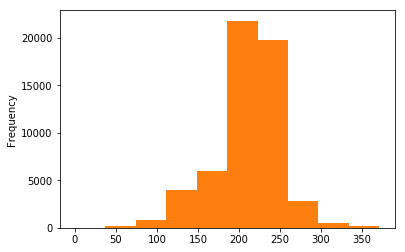

In [24]:
df.length.plot(kind='hist')
plt.show()

In [13]:
[d for d in train_imgs if 'len_bucket_20' not in d]

[]

In [14]:
train_imgs[0]

{'filename': '../extra_space/train_pics/xbycrpudtWaJEC0N/0058.jpg',
 'len_bucket_100': 58.0,
 'len_bucket_20': 11.0,
 'len_bucket_200': 116.0,
 'len_bucket_50': 29.0,
 'xmax': 863,
 'xmin': 647,
 'ymax': 520,
 'ymin': 305}

In [2]:
from keras.preprocessing.image import Iterator
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array

class FISH_ITERATOR(Iterator):
    def __init__(self,
                 data_list,
                 image_data_generator,
                 target_size=(180, 180),
                 batch_size=32,
                 shuffle=False,
                 num_classes=100,
                 seed=None):

        self.data_list = data_list
        self.samples = len(data_list)
        self.image_data_generator = image_data_generator
        self.target_size = tuple(target_size)
        self.image_shape = self.target_size + (3,)
        self.num_classes = num_classes

        print("Found %d images" % (self.samples))
        super(FISH_ITERATOR, self).__init__(self.samples, batch_size, shuffle, seed)

    def _get_batches_of_transformed_samples(self, index_array):
        batch_x = np.zeros((len(index_array[0]),) + self.image_shape, dtype=K.floatx())
        batch_y = np.zeros((len(batch_x), self.num_classes), dtype=K.floatx())
        
        counter = 0
        for i in index_array[0]:
            image_dict = self.data_list[i]
            fish_filename = image_dict['filename']
            
            if self.num_classes == 100:
                len_bucket = int(image_dict['len_bucket_100'])
            elif self.num_classes == 20:
                len_bucket = int(image_dict['len_bucket_20'])
            elif self.num_classes == 200:
                len_bucket = int(image_dict['len_bucket_200'])
            elif self.num_classes == 50:
                len_bucket = int(image_dict['len_bucket_50'])

            xmin = image_dict['xmin']
            xmax = image_dict['xmax']
            ymin = image_dict['ymin']
            ymax = image_dict['ymax']
            
            img = cv2.imread(fish_filename)
            img = img[ymin:ymax,xmin:xmax,:]
            
            a = np.zeros(self.image_shape)
            a[:img.shape[0],:img.shape[1],:] = img
            
            x = img_to_array(a)
            x = self.image_data_generator.random_transform(x)
            x = x / 255

            # Add the image and the label to the batch (one-hot encoded).
            batch_x[counter] = x
          
            batch_y[counter, len_bucket] = 1
                
            counter+=1

        return batch_x, batch_y


    def next(self):
        with self.lock:
            index_array = next(self.index_generator)
        return self._get_batches_of_transformed_samples(index_array)

Using TensorFlow backend.


In [31]:
data_gen_args = dict(
    rotation_range=1,
    channel_shift_range=0.3,
    fill_mode='constant',
    cval=0.,
    horizontal_flip=True
)


batch_size = 12

train_datagen = ImageDataGenerator(**data_gen_args)

train_gen = FISH_ITERATOR(
                         data_list=train_imgs,
                         image_data_generator = train_datagen,
                         target_size=(380, 380),
                         batch_size=32,
                         num_classes=100,
                         shuffle=True)

Found 43095 images


In [56]:
bx, by = next(train_gen)

In [61]:
np.argmax(by[2])

50

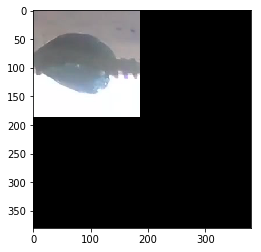

In [62]:
plt.imshow(bx[2])
plt.show()

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import pickle
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, CSVLogger
from tools.multi_gpu import *

def simple_model_1(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(380, 380,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model = make_parallel(model, gpu_count=2)
    
    return model



In [73]:
model = simple_model_1(100)

/home/keras/notebook/fish-video/tools/multi_gpu.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merged.append(merge(outputs, mode='concat', concat_axis=0))
/opt/conda/lib/python3.5/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/keras/notebook/fish-video/tools/multi_gpu.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  return Model(input=model.inputs, output=merged)


In [75]:
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.05)

model.compile(
    optimizer=optimizer, loss='categorical_crossentropy',
    metrics=['accuracy'])

data_gen_args = dict(
    rotation_range=0,
    channel_shift_range=0.3,
    fill_mode='constant',
    cval=0.,
    horizontal_flip=False
)


batch_size = 24 * 8

train_datagen = ImageDataGenerator(**data_gen_args)

train_gen = FISH_ITERATOR(
                         data_list=train_imgs,
                         image_data_generator = train_datagen,
                         target_size=(380, 380),
                         batch_size=32,
                         num_classes=100,
                         shuffle=True)

valid_gen = FISH_ITERATOR(
                         data_list=valid_imgs,
                         image_data_generator = train_datagen,
                         target_size=(380, 380),
                         batch_size=batch_size,
                         num_classes=100,    
                         shuffle=True)

early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=0.001, 
                           patience=3, 
                           mode='min', 
                           verbose=1)

checkpoint = ModelCheckpoint('weights/fish_len_regressor_100.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min', 
                             period=1)

csv_logger = CSVLogger('logs/fish_len_regressor_100.csv', separator=',', append=False)

model.load_weights('weights/fish_len_regressor.h5')

model.fit_generator(generator        = train_gen, 
                    validation_data  = valid_gen,                    
                    steps_per_epoch = len(train_imgs) // batch_size,
                    validation_steps = len(valid_imgs) // batch_size,                    
                    epochs           = 10, 
                    verbose          = 1,
                    callbacks        = [early_stop, checkpoint, csv_logger],
                    workers = 8  
                   )

Found 43095 images
Found 10774 images
Epoch 1/10
224/224 [==============================] - 69s - loss: 0.0064 - acc: 0.9993 - val_loss: 0.0146 - val_acc: 0.9988
Epoch 2/10
224/224 [==============================] - 68s - loss: 0.0112 - acc: 0.9989 - val_loss: 0.0111 - val_acc: 0.9991
Epoch 3/10
224/224 [==============================] - 67s - loss: 0.0037 - acc: 0.9997 - val_loss: 0.0113 - val_acc: 0.9991
Epoch 4/10
 34/224 [===>..........................] - ETA: 34s - loss: 0.0347 - acc: 0.9972

KeyboardInterrupt: 

In [77]:
df.species.value_counts()

species_windowpane    32194
species_grey sole      5931
species_plaice         5288
species_winter         4857
species_fourspot       4214
species_other          1840
species_summer         1808
Name: species, dtype: int64

In [ ]:
model = simple_model_1(200)

optimizer = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.05)

model.compile(
    optimizer=optimizer, loss='categorical_crossentropy',
    metrics=['accuracy'])

data_gen_args = dict(
    rotation_range=0,
    channel_shift_range=0.3,
    fill_mode='constant',
    cval=0.,
    horizontal_flip=False
)


batch_size = 24 * 4

train_datagen = ImageDataGenerator(**data_gen_args)

train_gen = FISH_ITERATOR(
                         data_list=train_imgs,
                         image_data_generator = train_datagen,
                         target_size=(380, 380),
                         batch_size=32,
                         num_classes=200,
                         shuffle=True)

valid_gen = FISH_ITERATOR(
                         data_list=valid_imgs,
                         image_data_generator = train_datagen,
                         target_size=(380, 380),
                         batch_size=batch_size,
                         num_classes=200,    
                         shuffle=True)

early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=0.001, 
                           patience=3, 
                           mode='min', 
                           verbose=1)

checkpoint = ModelCheckpoint('weights/fish_len_regressor_200.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min', 
                             period=1)

csv_logger = CSVLogger('logs/fish_len_regressor_200.csv', separator=',', append=False)

model.load_weights('weights/fish_len_regressor_200.h5')

model.fit_generator(generator        = train_gen, 
                    validation_data  = valid_gen,                    
                    steps_per_epoch = len(train_imgs) // batch_size,
                    validation_steps = len(valid_imgs) // batch_size,                    
                    epochs           = 20, 
                    verbose          = 1,
                    callbacks        = [early_stop, checkpoint, csv_logger],
                    workers = 8  
                   )

/home/keras/notebook/fish-video/tools/multi_gpu.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merged.append(merge(outputs, mode='concat', concat_axis=0))
/opt/conda/lib/python3.5/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/keras/notebook/fish-video/tools/multi_gpu.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  return Model(input=model.inputs, output=merged)


Found 43095 images
Found 10774 images
Epoch 1/20
448/448 [==============================] - 133s - loss: 0.0703 - acc: 0.9863 - val_loss: 0.0787 - val_acc: 0.9839
Epoch 2/20
448/448 [==============================] - 132s - loss: 0.0541 - acc: 0.9888 - val_loss: 0.0775 - val_acc: 0.9842
Epoch 3/20
447/448 [============================>.] - ETA: 0s - loss: 0.0536 - acc: 0.9890

## RF via xmax xmin

In [1]:
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import pickle
import os, cv2
from preprocessing import parse_annotation, BatchGenerator
from utils import WeightReader, decode_netout, draw_boxes
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import random 

LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 2
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG_FREQ = 0.2
VALID_SHARE = 0.2
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']


generator_config = {
    'IMAGE_H'         : IMAGE_H, 
    'IMAGE_W'         : IMAGE_W,
    'GRID_H'          : GRID_H,  
    'GRID_W'          : GRID_W,
    'BOX'             : BOX,
    'LABELS'          : LABELS,
    'CLASS'           : len(LABELS),
    'ANCHORS'         : ANCHORS,
    'BATCH_SIZE'      : BATCH_SIZE,
    'TRUE_BOX_BUFFER' : 2,
}


def change_coords(x1,y1,x2,y2,f_len):
    
    max_x = 1280
    max_y = 720
    
    x_av = (x2+x1)/2
    y_av = (y2+y1)/2
    

    if(x_av-f_len/2)>max_x:
        x1_new = max_x
    elif (x_av-f_len/2)<0:
        x1_new = 0
    else:
        x1_new=x_av-f_len/2 
        
    if(x_av+f_len/2)>max_x:
        x2_new = max_x
    else:
        x2_new=x_av+f_len/2 
        
    if(y_av-f_len/2)>max_y:
        y1_new = max_y
    elif (y_av-f_len/2)<0:
        y1_new = 0
    else:
        y1_new=y_av-f_len/2 

    if(y_av+f_len/2)>max_y:
        y2_new = max_y
    else:
        y2_new=y_av+f_len/2

    return x1_new,y1_new,x2_new,y2_new

df = pd.read_csv('train.csv')

df['len_bucket_100'] = pd.cut(df.length, 100, labels=False)
df['len_bucket_50'] = pd.cut(df.length, 50, labels=False)
df['len_bucket_200'] = pd.cut(df.length, 200, labels=False)
df['len_bucket_20'] = pd.cut(df.length, 20, labels=False)

df['_'] = df.apply(lambda row: change_coords(row['x1'],row['y1'],row['x2'],row['y2'],row['length']), axis=1)
df[['x1_new','y1_new','x2_new','y2_new']] = df['_'].apply(pd.Series)
del df['_']



In [55]:
species_list = LABELS
df['species'] = df[species_list].idxmax(axis=1)
df.loc[df.fish_number.isnull()==True, 'species'] = 'no_species'

species_dict = {'no_species':0,
            'species_fourspot':1,
           'species_grey sole':2,
           'species_other':3,
           'species_plaice':4,
           'species_summer':5,
           'species_windowpane':6,
           'species_winter':7}

df['species'] = df['species'].apply(lambda x: species_dict[x])

In [13]:
df.head()

row_id          video_id  frame  fish_number    length     x1     y1  \
0       0  00WK7DR6FyPZ5u3A      0          1.0  165.3028  766.0  531.0   
1       1  00WK7DR6FyPZ5u3A     18          2.0  176.5814  776.0  540.0   
2       2  00WK7DR6FyPZ5u3A     41          3.0  172.4297  772.0  538.0   
3       3  00WK7DR6FyPZ5u3A     63          4.0  166.6433  770.0  531.0   
4       4  00WK7DR6FyPZ5u3A     82          5.0  177.8820  777.0  544.0   

      x2     y2  species_fourspot   ...     species_winter  len_bucket_100  \
0  659.0  405.0                 0   ...                  0            44.0   
1  661.0  406.0                 0   ...                  0            47.0   
2  666.0  402.0                 0   ...                  0            46.0   
3  667.0  400.0                 0   ...                  0            44.0   
4  666.0  405.0                 0   ...                  0            47.0   

   len_bucket_50  len_bucket_200  len_bucket_20     x1_new     y1_new  \
0           22.0            89.0            8.0  629.84860  385.34860   
1           23.0            95.0            9.0  630.20930  384.70930   
2           23.0            92.0            9.0  632.78515  383.78515   
3           22.0            89.0            8.0  635.17835  382.17835   
4           23.0            95.0            9.0  632.55900  385.55900   

      x2_new     y2_new  species  
0  795.15140  550.65140        2  
1  806.79070  561.29070        2  
2  805.21485  556.21485        2  
3  801.82165  548.82165        2  
4  810.44100  563.44100        2  

[5 rows x 25 columns]

In [56]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams


predictors = ['x1_new','y1_new', 'x2_new', 'y2_new','species']
target = 'length'

rcParams['figure.figsize'] = 20, 10

In [229]:
from sklearn.linear_model import LinearRegression

X = df[df['x_d']>0][['x_d','y_d']].values
y = df[df['x_d']>0]['length'].values

clr = LinearRegression()
clr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
clr.score(X,y)

0.98829406008581833

In [227]:
df['length'].values

array([ 165.3028,  176.5814,  172.4297, ...,  212.1155,  212.059 ,
        223.0202])

In [34]:
def modelfit(alg, 
             dtrain,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(
            xgb_param,
            xgtrain,
            num_boost_round=alg.get_params()['n_estimators'],
            nfold=cv_folds,
            metrics='rmse',
            early_stopping_rounds=early_stopping_rounds,
            verbose_eval = False
        )
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    # dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("R^2: %.4g" % metrics.r2_score(dtrain[target].values, dtrain_predictions))

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [58]:
df['x_d'] = df['x2_new'] - df['x1_new']
df['y_d'] = df['y2_new'] - df['y1_new']


Model Report
R^2: 0.9468


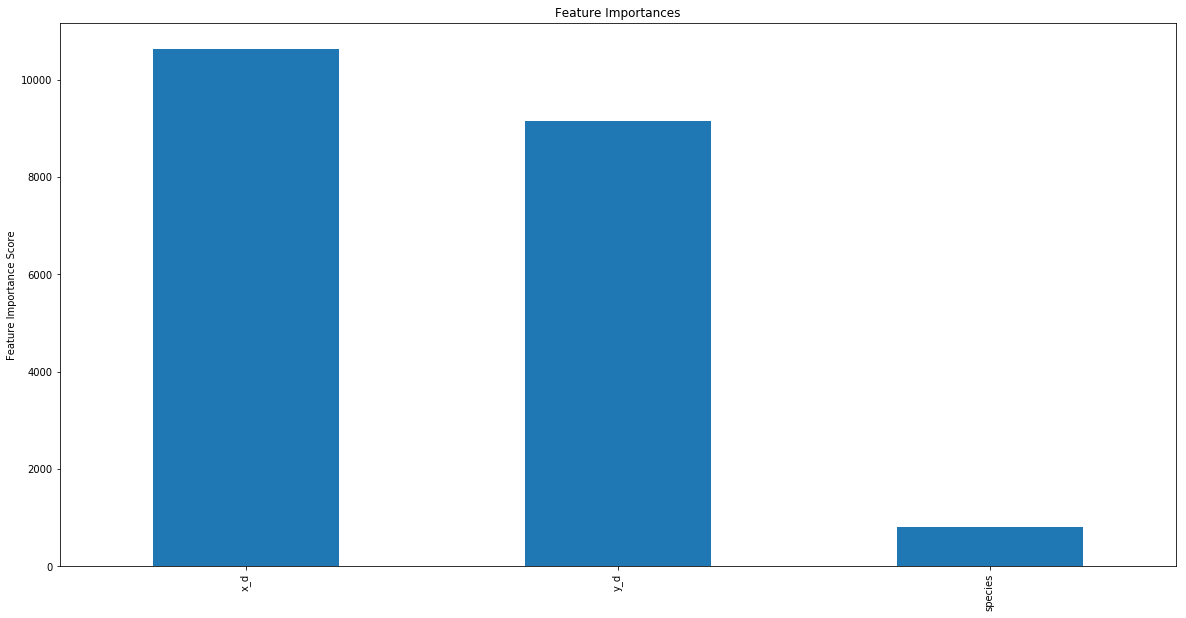

In [46]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

predictors = ['x_d','y_d', 'species']
target = 'length'

modelfit(xgb1, df[predictors+[target]][df.x1_new>0].sample(frac=0.1), predictors)


Model Report
R^2: 0.9579


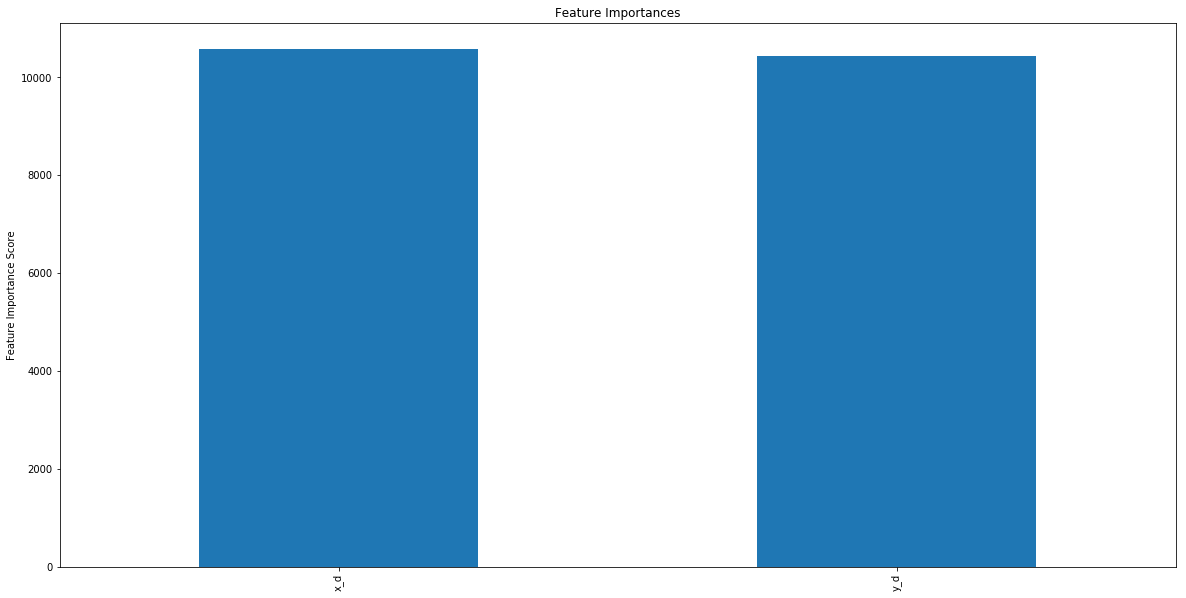

In [204]:
def modelfit(alg, 
             dtrain,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    # dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("R^2: %.4g" % metrics.r2_score(dtrain[target].values, dtrain_predictions))

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    return alg
    
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10,
 max_depth=100,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

predictors = ['x_d','y_d']
target = 'length'

model = modelfit(xgb1, df[predictors+[target]][df.x1_new>0].sample(frac=0.1), predictors)    

In [205]:
import pickle
pickle.dump(model, open("xgb_model.dat", "wb"))

# 6. Prepare data for submit

## Only one fish probability value

In [52]:
!ls -lah submission_model_1.csv

-rw-r--r-- 1 root root 73M Oct  7 19:43 submission_model_1.csv


In [50]:
from IPython.display import FileLink
FileLink('submission_model_1.csv')

/home/keras/notebook/fish-video/submission_model_1.csv

In [60]:
FileLink('test_videos/01rFQwp0fqXLHg33.mp4')

/home/keras/notebook/fish-video/test_videos/01rFQwp0fqXLHg33.mp4

In [ ]:
vid = '01rFQwp0fqXLHg33'

images = 'inspect_vids/live_model_test/{}_%04d.jpg'.format(vid)
target_vid = 'inspect_vids/live_model_test/{}.mp4'.format(vid)
!ffmpeg -loglevel quiet -f image2 -framerate 25 -i $images $target_vid


In [ ]:
dtrain_predictions = alg.predict(dtrain[predictors])

In [74]:
 block = df_sub[['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter',
 
'xmin','xmax', 'ymin', 'ymax'
 ]][26:31]

block

species_fourspot  species_grey sole  species_other  species_plaice  \
26               0.0                0.0            0.0             0.0   
27               0.0                0.0            0.0             0.0   
28               0.0                0.0            0.0             0.0   
29               0.0                0.0            0.0             0.0   
30               0.0                0.0            0.0             0.0   

    species_summer  species_windowpane  species_winter  xmin  xmax  ymin  ymax  
26             0.0            0.000000        0.736355   209   285   177   313  
27             0.0            0.000000        0.724856   208   285   178   315  
28             0.0            0.000000        0.790512   209   286   176   314  
29             0.0            0.000000        0.000000     0     0     0     0  
30             0.0            0.349995        0.000000   207   285   195   335

In [ ]:
1+1

In [93]:
box_list = ['xmin','xmax', 'ymin', 'ymax']

In [293]:
from tqdm import tqdm

df_sub = pd.read_csv('submission_model_1.csv')
del df_sub['Unnamed: 0']


# df_sub = df_sub[df_sub.video_id.isin(['01rFQwp0fqXLHg33','09WWcMSr5nbKk0lb'])]

current_idx = 0
block_start_idx = -1
block_end_idx = 0
is_block = 0
fish_number = 0
previous_vid = 'dfsdfsdfsdfsdfsddfs'
current_vid = 'asfsadfsdafdsafasdfsdfa'

def update_block(df,
                 idx_start,idx_end,
                 best_class,
                 best_class_prob,
                 xmin,xmax,ymix,ymax,
                 fish_number):
    
    # do some tweaking here
    df.loc[idx_start:idx_end-1,LABELS+box_list] = 0
    df.loc[idx_start:idx_end-1,best_class] = best_class_prob
    df.loc[idx_start:idx_end-1,box_list] = xmin,xmax,ymix,ymax
    df.loc[idx_start:idx_end-1,'fish_number'] = fish_number
    
def get_block(df,idx_start,idx_end):
    return df[LABELS+box_list][idx_start:idx_end]
def process_block(block):
    best_class = block[LABELS].sum(axis=0).sort_values(ascending=False).index[0]
    best_class_block = block[block[best_class]>0][box_list].mean(axis=0)
    best_class_prob = block[block[best_class]>0][best_class].max(axis=0)
    return best_class,best_class_prob,best_class_block['xmin'],best_class_block['xmax'],best_class_block['ymin'],best_class_block['ymax']

with tqdm(total = df_sub.shape[0]) as pbar:
    for index, row in df_sub.iterrows():
        
        current_vid = row['video_id']

        if(row['xmin']>0): 
            is_block = 1
            # print('is block triggered')
        else:
            is_block = 0

        if ((is_block == 1) & (block_start_idx == -1)):
            block_start_idx = current_idx
            # print('block_start_idx triggered')

        if((block_start_idx > -1) & (is_block==0) & (df_sub.loc[current_idx:current_idx+5,'xmin'].sum()==0) & (current_vid == previous_vid)):
            block_end_idx = current_idx
            # print('block_end_idx triggered')
            
        if((block_start_idx > -1) & (is_block==1) & (current_vid != previous_vid)):
            block_end_idx = current_idx 

        if (block_end_idx>0):
            block = get_block(df_sub,block_start_idx,block_end_idx)
            best_class,best_class_prob,xmin,xmax,ymin,ymax =  process_block(block)
            fish_number += 1

            update_block(df_sub,block_start_idx,block_end_idx,best_class,best_class_prob,xmin,xmax,ymin,ymax,int(fish_number))
            
            if current_vid != previous_vid:
                fish_number = 0
                
            if current_vid != previous_vid:
                block_start_idx = current_idx
            else:
                block_start_idx = -1
            
            block_end_idx = 0
            # print('block update triggered')        
        current_idx += 1
        previous_vid = row['video_id']
        # print(current_vid,previous_vid,fish_number)

        pbar.update(1) 

df_sub['x_d'] = df_sub['xmax'] - df_sub['xmin']
df_sub['y_d'] = df_sub['ymax'] - df_sub['ymin']
preds = clr.predict(df_sub[df_sub['x_d']>0][['x_d','y_d']])
df_sub.loc[df_sub['x_d']>0,'length'] = preds

df_sub.to_csv('submission_model_1_processed_2.csv')

del df_sub['xmin'],df_sub['xmax'],df_sub['ymin'],df_sub['ymax'],df_sub['x_d'],df_sub['y_d']
df_sub = df_sub.set_index('row_id')
df_sub.to_csv('submission_model_1_processed_3.csv')


100%|██████████| 918504/918504 [35:04<00:00, 436.49it/s]  


In [ ]:
row_id,frame,video_id,fish_number,length,species_fourspot,species_grey sole,species_other,species_plaice,species_summer,species_windowpane,species_winter

In [ ]:
row_id,frame,video_id,fish_number,length,species_fourspot,species_grey sole,species_other,species_plaice,species_summer,species_windowpane,species_winter

In [6]:
LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

In [ ]:
df_sub = pd.read_csv('submission.csv')

In [4]:
import pandas as pd
df_sub = pd.read_csv('submission_model_1_processed_3.csv')
df_sub = df_sub.set_index('row_id')
df_sub.shape

(918504, 11)

In [10]:
for fish_class in LABELS:
    df_sub.loc[df_sub[fish_class]==0,fish_class] = 0.05

In [12]:
df_sub.to_csv('submission_model_1_processed_4.csv')

In [13]:
df_sub = pd.read_csv('submission_model_1_processed_4.csv')
df_sub.shape

(918504, 12)

In [11]:
df_sub

frame          video_id  fish_number      length  species_fourspot  \
row_id                                                                       
0           0  01rFQwp0fqXLHg33          1.0  116.713396              0.05   
1           1  01rFQwp0fqXLHg33          1.0  116.713396              0.05   
2           2  01rFQwp0fqXLHg33          1.0  116.713396              0.05   
3           3  01rFQwp0fqXLHg33          1.0  116.713396              0.05   
4           4  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
5           5  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
6           6  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
7           7  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
8           8  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
9           9  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
10         10  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
11         11  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
12         12  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
13         13  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
14         14  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
15         15  01rFQwp0fqXLHg33          2.0  116.740742              0.05   
16         16  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
17         17  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
18         18  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
19         19  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
20         20  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
21         21  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
22         22  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
23         23  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
24         24  01rFQwp0fqXLHg33          0.0    0.000000              0.05   
25         25  01rFQwp0fqXLHg33          3.0  116.091632              0.05   
26         26  01rFQwp0fqXLHg33          3.0  116.091632              0.05   
27         27  01rFQwp0fqXLHg33          3.0  116.091632              0.05   
28         28  01rFQwp0fqXLHg33          3.0  116.091632              0.05   
29         29  01rFQwp0fqXLHg33          3.0  116.091632              0.05   
...       ...               ...          ...         ...               ...   
918474   2604  zyjEx84aUTaBzbIX         65.0   95.878546              0.05   
918475   2605  zyjEx84aUTaBzbIX         65.0   95.878546              0.05   
918476   2606  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918477   2607  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918478   2608  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918479   2609  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918480   2610  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918481   2611  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918482   2612  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918483   2613  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918484   2614  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918485   2615  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918486   2616  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918487   2617  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918488   2618  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918489   2619  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918490   2620  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918491   2621  zyjEx84aUTaBzbIX          0.0    0.000000              0.05   
918492   2622  zyjEx84aUTaBzbI

In [310]:
!ls -lah *submission*

-rwxrwxrwx 1  1001  1001 57M Aug 28 00:36 submission.csv
-rw-r--r-- 1 root  root  73M Oct  7 19:43 submission_model_1.csv
-rw-r--r-- 1 keras users 86M Oct  7 22:49 submission_model_1_processed_1.csv
-rw-r--r-- 1 keras users 98M Oct  8 00:16 submission_model_1_processed_2.csv
-rw-r--r-- 1 keras users 68M Oct  8 05:12 submission_model_1_processed_3.csv


In [313]:
df_sub = df_sub.set_index('row_id')
df_sub.to_csv('submission_model_1_processed_3.csv')


In [308]:
df_sub.to_csv('submission_model_1_processed_3.csv')

In [14]:
FileLink('submission_model_1_processed_4.csv')

NameError: name 'FileLink' is not defined

## Fish vector

### Do preliminary eye evaluation

In [5]:
import pandas as pd
df_sub = pd.read_csv('submission_vec_ths_10.csv')

In [7]:
from IPython.display import FileLink
FileLink('submission_vec_ths_10.csv')

/home/keras/notebook/fish-video/submission_vec_ths_10.csv

In [20]:
df_sub[df_sub.video_id == 'l31ndpFRLM7ozY3H'].to_csv('fish_vector_test_10.csv')

In [ ]:
def process_block(block):
    best_class = block[LABELS].sum(axis=0).sort_values(ascending=False).index[0]
    best_class_block = block[block[best_class]>0][box_list].mean(axis=0)
    best_class_prob = block[block[best_class]>0][best_class].max(axis=0)
    return best_class,best_class_prob,best_class_block['xmin'],best_class_block['xmax'],best_class_block['ymin'],best_class_block['ymax']


### Fish linear regression

In [ ]:
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import pickle
import os, cv2
from preprocessing import parse_annotation, BatchGenerator
from utils import WeightReader, decode_netout, draw_boxes
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import random 

LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
THRESHOLD        = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 12 * 2
WARM_UP_BATCHES  = 100
# TRUE_BOX_BUFFER  = 50
TRUE_BOX_BUFFER  = 2
REMOVE_NEGATIVE_ITEMS = 0.995
AUG_FREQ = 0.2
VALID_SHARE = 0.2
LAYER_SCRATCH = ['conv_20','conv_21','conv_22','conv_23']


generator_config = {
    'IMAGE_H'         : IMAGE_H, 
    'IMAGE_W'         : IMAGE_W,
    'GRID_H'          : GRID_H,  
    'GRID_W'          : GRID_W,
    'BOX'             : BOX,
    'LABELS'          : LABELS,
    'CLASS'           : len(LABELS),
    'ANCHORS'         : ANCHORS,
    'BATCH_SIZE'      : BATCH_SIZE,
    'TRUE_BOX_BUFFER' : 2,
}


def change_coords(x1,y1,x2,y2,f_len):
    
    max_x = 1280
    max_y = 720
    
    x_av = (x2+x1)/2
    y_av = (y2+y1)/2
    

    if(x_av-f_len/2)>max_x:
        x1_new = max_x
    elif (x_av-f_len/2)<0:
        x1_new = 0
    else:
        x1_new=x_av-f_len/2 
        
    if(x_av+f_len/2)>max_x:
        x2_new = max_x
    else:
        x2_new=x_av+f_len/2 
        
    if(y_av-f_len/2)>max_y:
        y1_new = max_y
    elif (y_av-f_len/2)<0:
        y1_new = 0
    else:
        y1_new=y_av-f_len/2 

    if(y_av+f_len/2)>max_y:
        y2_new = max_y
    else:
        y2_new=y_av+f_len/2

    return x1_new,y1_new,x2_new,y2_new

df = pd.read_csv('train.csv')

df['len_bucket_100'] = pd.cut(df.length, 100, labels=False)
df['len_bucket_50'] = pd.cut(df.length, 50, labels=False)
df['len_bucket_200'] = pd.cut(df.length, 200, labels=False)
df['len_bucket_20'] = pd.cut(df.length, 20, labels=False)

df['_'] = df.apply(lambda row: change_coords(row['x1'],row['y1'],row['x2'],row['y2'],row['length']), axis=1)
df[['x1_new','y1_new','x2_new','y2_new']] = df['_'].apply(pd.Series)
del df['_']



In [3]:
df['x_d'] = df['x2_new'] - df['x1_new']
df['y_d'] = df['y2_new'] - df['y1_new']

In [4]:
from sklearn.linear_model import LinearRegression

X = df[df['x_d']>0][['x_d','y_d']].values
y = df[df['x_d']>0]['length'].values

clr = LinearRegression()
clr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make a fish test video from the ready data

In [68]:
import pandas as pd
import cv2
import numpy as np
import pandas as pd
import threading
import queue
# import tensorflow as tf
from tqdm import tqdm
from utils import decode_netout, draw_boxes, get_best_box
from random import shuffle
from multiprocessing.dummy import Pool as ThreadPool 


species_list = ['species_fourspot', 'species_grey sole','species_other', 'species_plaice', 'species_summer','species_windowpane', 'species_winter']

df_test = pd.read_csv('fish_vector_test_10.csv')
video_id = 'l31ndpFRLM7ozY3H'
input_size = 416

def read_frame(video_id,frame,input_size):
    try:
        img = cv2.imread('../extra_space/test_pics/{}/{}.jpg'.format(video_id,str(frame+1).zfill(4)))
        img = cv2.resize(img, (input_size, input_size))
    except:
        img = np.random.rand(input_size,input_size,3)
        
    return img

def draw_box(image,xmin,ymin,xmax,ymax,label):
    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (255,0,0), 2)
    cv2.putText(image, label, 
                (xmin, ymin + 16), 
                0, 
                1e-3 * image.shape[0], 
                (255,0,0), 2)
        
    return image 

ids_test = [{'row_id':row[0],'frame':row[1],'video_id':row[2]} 
            for row in df_test[df_test.video_id == video_id][['row_id','frame','video_id']].values]

with tqdm(total=len(ids_test)) as pbar:

    for frame_id in ids_test:
        img = read_frame(frame_id['video_id'],frame_id['frame'],input_size)

        data = df_test[(df_test.video_id==frame_id['video_id'])&(df_test.frame == frame_id['frame'])][['xmin','ymin','xmax','ymax']].values 

        if data[0].shape[0]>0:
            label = df_test[(df_test.video_id == frame_id['video_id']) & (df_test.frame == frame_id['frame'])][species_list].values.argmax()
            label = species_list[label]    
            img = draw_box(img,int(data[0][0]),int(data[0][1]),int(data[0][2]),int(data[0][3]),label)

        cv2.imwrite('inspect_vids/live_model_test/{}_{}.jpg'.format(frame_id['video_id'],str(frame_id['frame']+1).zfill(4) ),img)

        pbar.update(1)

100%|██████████| 1128/1128 [00:27<00:00, 41.04it/s]


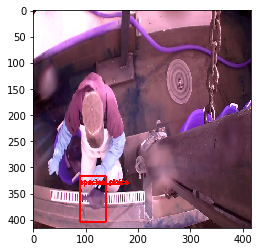

In [44]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [70]:
from IPython.display import FileLink
FileLink('inspect_vids/live_model_test/l31ndpFRLM7ozY3H.mp4')

/home/keras/notebook/fish-video/inspect_vids/live_model_test/l31ndpFRLM7ozY3H.mp4

In [69]:
import os
import glob

g = glob.glob('inspect_vids/live_model_test/*.jpg')
vids = set([gl.split('/')[2].split('_')[0] for gl in g])

for vid in vids:
    images = 'inspect_vids/live_model_test/{}_%04d.jpg'.format(vid)
    target_vid = 'inspect_vids/live_model_test/{}.mp4'.format(vid)
    !ffmpeg -loglevel quiet -f image2 -framerate 25 -i $images $target_vid

In [56]:
!ls inspect_vids/live_model_test/*.mp4

ls: cannot access 'inspect_vids/live_model_test/*.mp4': No such file or directory


In [36]:
species_list = ['species_fourspot', 'species_grey sole','species_other', 'species_plaice', 'species_summer','species_windowpane', 'species_winter']


In [38]:
label

'species_plaice'

In [34]:
data[0].shape

(4,)

### Rewrite fish frame processing

In [122]:
from tqdm import tqdm
import pandas as pd
import numpy as np


df_sub = pd.read_csv('submission_vec_ths_10.csv')
del df_sub['Unnamed: 0']

threshold = 0.2
block_high_prob_threshold = 0.75

LABELS =  ['species_fourspot',
           'species_grey sole',
           'species_other', 
           'species_plaice',
           'species_summer',
           'species_windowpane',
           'species_winter']

box_list = ['xmin','xmax', 'ymin', 'ymax']

def filter_dataframe(df,threshold):
    df.loc[df_sub[LABELS].sum(axis=1)<threshold,LABELS+box_list] = 0    
    return df

def get_block(df,idx_start,idx_end):
    return df[LABELS+box_list][idx_start:idx_end]

def process_block(block):
    block_start_offset = np.argmax(block[LABELS].sum(axis=1).values)
    block_max_value = np.max(block[LABELS].sum(axis=1).values)
    block_list = list(block.loc[block.index.values.min()+block_start_offset:,LABELS].sum(axis=1)>block_high_prob_threshold*block_max_value)
    try: 
        block_length = block_list.index(False) 
    except: 
        block_length = block.shape[0] - block_start_offset
    
    return block_start_offset,block_max_value,block_length

df_sub = filter_dataframe(df_sub,threshold)
        

In [117]:
def update_block(df,
                 idx_start,idx_end,
                 block_start_offset,block_length,
                 fish_number):
    
    # do some tweaking here
    if block_start_offset>0:
        df.loc[idx_start:idx_start+block_start_offset,LABELS+box_list] = 0
        
    df.loc[idx_start+block_start_offset+block_length:idx_end,LABELS+box_list] = 0
    df.loc[idx_start+block_start_offset:idx_start+block_start_offset+block_length,'fish_number'] = fish_number

In [125]:
df_sub.loc[5840+block_start_offset+block_length:5848,LABELS+box_list]

species_fourspot  species_grey sole  species_other  species_plaice  \
5846               0.0                0.0            0.0             0.0   
5847               0.0                0.0            0.0             0.0   
5848               0.0                0.0            0.0             0.0   

      species_summer  species_windowpane  species_winter  xmin  xmax  ymin  \
5846             0.0            0.000000        0.000000     0     0     0   
5847             0.0            0.109469        0.107496   203   286   203   
5848             0.0            0.000000        0.000000     0     0     0   

      ymax  
5846     0  
5847   350  
5848     0

In [119]:
block = get_block(df_sub,5840,5848)
block_start_offset,block_max_value,block_length = process_block(block)
update_block (df_sub,5840,5848,block_start_offset,block_length,1)

      species_fourspot  species_grey sole  species_other  species_plaice  \
5840               0.0                0.0            0.0             0.0   
5841               0.0                0.0            0.0             0.0   
5842               0.0                0.0            0.0             0.0   
5843               0.0                0.0            0.0             0.0   
5844               0.0                0.0            0.0             0.0   

      species_summer  species_windowpane  species_winter  xmin  xmax  ymin  \
5840             0.0                 0.0             0.0     0     0     0   
5841             0.0                 0.0             0.0     0     0     0   
5842             0.0                 0.0             0.0     0     0     0   
5843             0.0                 0.0             0.0     0     0     0   
5844             0.0                 0.0             0.0     0     0     0   

      ymax  
5840     0  
5841     0  
5842     0  
5843     0  
5844     

In [115]:
df_sub[5840:5840+block_start_offset]

row_id  frame          video_id  fish_number  length  species_fourspot  \
5840    5840   1138  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5841    5841   1139  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5842    5842   1140  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5843    5843   1141  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   

      species_grey sole  species_other  species_plaice  species_summer  \
5840                0.0            0.0             0.0             0.0   
5841                0.0            0.0             0.0             0.0   
5842                0.0            0.0             0.0             0.0   
5843                0.0            0.0             0.0             0.0   

      species_windowpane  species_winter  xmin  xmax  ymin  ymax  
5840            0.423785             0.0   202   284   168   314  
5841            0.269291             0.0   200   282   170   315  
5842            0.238858             0.0   202   283   172   314  
5843            0.416386             0.0   204   284   166   306

In [104]:
block_start_offset,block_max_value,block_length

(4, 0.84122341871261597, 2)

In [121]:
df_sub[5840+block_start_offset:5840+block_start_offset+block_length]

row_id  frame          video_id  fish_number  length  species_fourspot  \
5844    5844   1142  0G2cbTLjL7ktv4xM          1.0     0.0               0.0   
5845    5845   1143  0G2cbTLjL7ktv4xM          1.0     0.0               0.0   

      species_grey sole  species_other  species_plaice  species_summer  \
5844                0.0            0.0             0.0             0.0   
5845                0.0            0.0             0.0             0.0   

      species_windowpane  species_winter  xmin  xmax  ymin  ymax  
5844            0.000000             0.0     0     0     0     0  
5845            0.739294             0.0   203   286   171   316

In [127]:
df_sub[5840:5848]

row_id  frame          video_id  fish_number  length  species_fourspot  \
5840    5840   1138  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5841    5841   1139  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5842    5842   1140  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5843    5843   1141  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5844    5844   1142  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5845    5845   1143  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5846    5846   1144  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5847    5847   1145  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   

      species_grey sole  species_other  species_plaice  species_summer  \
5840                0.0            0.0             0.0             0.0   
5841                0.0            0.0             0.0             0.0   
5842                0.0            0.0             0.0             0.0   
5843                0.0            0.0             0.0             0.0   
5844                0.0            0.0             0.0             0.0   
5845                0.0            0.0             0.0             0.0   
5846                0.0            0.0             0.0             0.0   
5847                0.0            0.0             0.0             0.0   

      species_windowpane  species_winter  xmin  xmax  ymin  ymax  
5840            0.423785        0.000000   202   284   168   314  
5841            0.269291        0.000000   200   282   170   315  
5842            0.238858        0.000000   202   283   172   314  
5843            0.416386        0.000000   204   284   166   306  
5844            0.841223        0.000000   206   285   168   308  
5845            0.739294        0.000000   203   286   171   316  
5846            0.000000        0.000000     0     0     0     0  
5847            0.109469        0.107496   203   286   203   350

In [96]:
df_sub[5820+1:5834]

row_id  frame          video_id  fish_number  length  species_fourspot  \
5821    5821   1119  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5822    5822   1120  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5823    5823   1121  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5824    5824   1122  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5825    5825   1123  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5826    5826   1124  0G2cbTLjL7ktv4xM          1.0     0.0               0.0   
5827    5827   1125  0G2cbTLjL7ktv4xM          1.0     0.0               0.0   
5828    5828   1126  0G2cbTLjL7ktv4xM          1.0     0.0               0.0   
5829    5829   1127  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5830    5830   1128  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5831    5831   1129  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5832    5832   1130  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   
5833    5833   1131  0G2cbTLjL7ktv4xM          0.0     0.0               0.0   

      species_grey sole  species_other  species_plaice  species_summer  \
5821                0.0            0.0             0.0             0.0   
5822                0.0            0.0             0.0             0.0   
5823                0.0            0.0             0.0             0.0   
5824                0.0            0.0             0.0             0.0   
5825                0.0            0.0             0.0             0.0   
5826                0.0            0.0             0.0             0.0   
5827                0.0            0.0             0.0             0.0   
5828                0.0            0.0             0.0             0.0   
5829                0.0            0.0             0.0             0.0   
5830                0.0            0.0             0.0             0.0   
5831                0.0            0.0             0.0             0.0   
5832                0.0            0.0             0.0             0.0   
5833                0.0            0.0             0.0             0.0   

      species_windowpane  species_winter  xmin  xmax  ymin  ymax  
5821            0.000000             0.0     0     0     0     0  
5822            0.000000             0.0     0     0     0     0  
5823            0.000000             0.0     0     0     0     0  
5824            0.000000             0.0     0     0     0     0  
5825            0.000000             0.0     0     0     0     0  
5826            0.000000             0.0     0     0     0     0  
5827            0.460188             0.0   207   285   172   311  
5828            0.000000             0.0     0     0     0     0  
5829            0.000000             0.0     0     0     0     0  
5830            0.000000             0.0     0     0     0     0  
5831            0.000000             0.0     0     0     0     0  
5832            0.000000             0.0     0     0     0     0  
5833            0.000000             0.0     0     0     0     0

In [87]:
block_start_offset,block_max_value,block_length

(5, 0.57011985778808594, 2)

5

(5, 0.57011985778808594, 2)

In [ ]:
def process_block(block):
    best_class = block[LABELS].sum(axis=0).sort_values(ascending=False).index[0]
    best_class_block = block[block[best_class]>0][box_list].mean(axis=0)
    best_class_prob = block[block[best_class]>0][best_class].max(axis=0)
    return best_class,best_class_prob,best_class_block['xmin'],best_class_block['xmax'],best_class_block['ymin'],best_class_block['ymax']


In [21]:
df_sub[df_sub.xmin>0]

row_id  frame          video_id  fish_number  length  \
0            0      0  01rFQwp0fqXLHg33          0.0     0.0   
1            1      1  01rFQwp0fqXLHg33          0.0     0.0   
2            2      2  01rFQwp0fqXLHg33          0.0     0.0   
3            3      3  01rFQwp0fqXLHg33          0.0     0.0   
15          15     15  01rFQwp0fqXLHg33          0.0     0.0   
25          25     25  01rFQwp0fqXLHg33          0.0     0.0   
26          26     26  01rFQwp0fqXLHg33          0.0     0.0   
27          27     27  01rFQwp0fqXLHg33          0.0     0.0   
28          28     28  01rFQwp0fqXLHg33          0.0     0.0   
29          29     29  01rFQwp0fqXLHg33          0.0     0.0   
30          30     30  01rFQwp0fqXLHg33          0.0     0.0   
39          39     39  01rFQwp0fqXLHg33          0.0     0.0   
40          40     40  01rFQwp0fqXLHg33          0.0     0.0   
45          45     45  01rFQwp0fqXLHg33          0.0     0.0   
46          46     46  01rFQwp0fqXLHg33          0.0     0.0   
47          47     47  01rFQwp0fqXLHg33          0.0     0.0   
48          48     48  01rFQwp0fqXLHg33          0.0     0.0   
49          49     49  01rFQwp0fqXLHg33          0.0     0.0   
50          50     50  01rFQwp0fqXLHg33          0.0     0.0   
51          51     51  01rFQwp0fqXLHg33          0.0     0.0   
52          52     52  01rFQwp0fqXLHg33          0.0     0.0   
53          53     53  01rFQwp0fqXLHg33          0.0     0.0   
54          54     54  01rFQwp0fqXLHg33          0.0     0.0   
55          55     55  01rFQwp0fqXLHg33          0.0     0.0   
66          66     66  01rFQwp0fqXLHg33          0.0     0.0   
67          67     67  01rFQwp0fqXLHg33          0.0     0.0   
68          68     68  01rFQwp0fqXLHg33          0.0     0.0   
69          69     69  01rFQwp0fqXLHg33          0.0     0.0   
70          70     70  01rFQwp0fqXLHg33          0.0     0.0   
71          71     71  01rFQwp0fqXLHg33          0.0     0.0   
...        ...    ...               ...          ...     ...   
917596  917596   1726  zyjEx84aUTaBzbIX          0.0     0.0   
917603  917603   1733  zyjEx84aUTaBzbIX          0.0     0.0   
917662  917662   1792  zyjEx84aUTaBzbIX          0.0     0.0   
917671  917671   1801  zyjEx84aUTaBzbIX          0.0     0.0   
917672  917672   1802  zyjEx84aUTaBzbIX          0.0     0.0   
917677  917677   1807  zyjEx84aUTaBzbIX          0.0     0.0   
917693  917693   1823  zyjEx84aUTaBzbIX          0.0     0.0   
917695  917695   1825  zyjEx84aUTaBzbIX          0.0     0.0   
917748  917748   1878  zyjEx84aUTaBzbIX          0.0     0.0   
917777  917777   1907  zyjEx84aUTaBzbIX          0.0     0.0   
917840  917840   1970  zyjEx84aUTaBzbIX          0.0     0.0   
917850  917850   1980  zyjEx84aUTaBzbIX          0.0     0.0   
918370  918370   2500  zyjEx84aUTaBzbIX          0.0     0.0   
918404  918404   2534  zyjEx84aUTaBzbIX          0.0     0.0   
918405  918405   2535  zyjEx84aUTaBzbIX          0.0     0.0   
918408  918408   2538  zyjEx84aUTaBzbIX          0.0     0.0   
918432  918432   2562  zyjEx84aUTaBzbIX          0.0     0.0   
918433  918433   2563  zyjEx84aUTaBzbIX          0.0     0.0   
918453  918453   2583  zyjEx84aUTaBzbIX          0.0     0.0   
918454  918454   2584  zyjEx84aUTaBzbIX          0.0     0.0   
918455  918455   2585  zyjEx84aUTaBzbIX          0.0     0.0   
918474  918474   2604  zyjEx84aUTaBzbIX          0.0     0.0   
918475  918475   2605  zyjEx84aUTaBzbIX          0.0     0.0   
918487  918487   2617  zyjEx84aUTaBzbIX          0.0     0.0   
918488  918488   2618  zyjEx84aUTaBzbIX          0.0     0.0   
918489  918489   2619  zyjEx84aUTaBzbIX          0.0     0.0   
918498  918498   2628  zyjEx84aUTaBzbIX          0.0     0.0   
918499  918499   2629  zyjEx84aUTaBzbIX          0.0     0.0   
918500  918500   2630  zyjEx84aUTaBzbIX          0.0     0.0   
918501  918501   2631  zyjEx84aUTaBzbIX          0.0     0.0   

        species_fourspot  species_grey 

In [14]:
df_sub[df_sub.xmin>0]

Empty DataFrame
Columns: [row_id, frame, video_id, fish_number, length, species_fourspot, species_grey sole, species_other, species_plaice, species_summer, species_windowpane, species_winter, xmin, xmax, ymin, ymax]
Index: []

In [2]:
df_sub.head()

row_id  frame          video_id  fish_number  length  species_fourspot  \
0       0      0  01rFQwp0fqXLHg33          0.0     0.0               0.0   
1       1      1  01rFQwp0fqXLHg33          0.0     0.0               0.0   
2       2      2  01rFQwp0fqXLHg33          0.0     0.0               0.0   
3       3      3  01rFQwp0fqXLHg33          0.0     0.0               0.0   
4       4      4  01rFQwp0fqXLHg33          0.0     0.0               0.0   

   species_grey sole  species_other  species_plaice  species_summer  \
0                0.0            0.0             0.0        0.000000   
1                0.0            0.0             0.0        0.000000   
2                0.0            0.0             0.0        0.124784   
3                0.0            0.0             0.0        0.000000   
4                0.0            0.0             0.0        0.000000   

   species_windowpane  species_winter  xmin  xmax  ymin  ymax  
0            0.833828             0.0   210   286   179   316  
1            0.808272             0.0   210   287   179   316  
2            0.675412             0.0   211   287   179   317  
3            0.701336             0.0   208   285   178   315  
4            0.000000             0.0     0     0     0     0

In [ ]:
from tqdm import tqdm

df_sub = pd.read_csv('fish_vector_test.csv')
del df_sub['Unnamed: 0']


# df_sub = df_sub[df_sub.video_id.isin(['01rFQwp0fqXLHg33','09WWcMSr5nbKk0lb'])]

current_idx = 0
block_start_idx = -1
block_end_idx = 0
is_block = 0
fish_number = 0
previous_vid = 'dfsdfsdfsdfsdfsddfs'
current_vid = 'asfsadfsdafdsafasdfsdfa'

def update_block(df,
                 idx_start,idx_end,
                 best_class,
                 best_class_prob,
                 xmin,xmax,ymix,ymax,
                 fish_number):
    
    # do some tweaking here
    df.loc[idx_start:idx_end-1,LABELS+box_list] = 0
    df.loc[idx_start:idx_end-1,best_class] = best_class_prob
    df.loc[idx_start:idx_end-1,box_list] = xmin,xmax,ymix,ymax
    df.loc[idx_start:idx_end-1,'fish_number'] = fish_number
    
def get_block(df,idx_start,idx_end):
    return df[LABELS+box_list][idx_start:idx_end]
def process_block(block):
    best_class = block[LABELS].sum(axis=0).sort_values(ascending=False).index[0]
    best_class_block = block[block[best_class]>0][box_list].mean(axis=0)
    best_class_prob = block[block[best_class]>0][best_class].max(axis=0)
    return best_class,best_class_prob,best_class_block['xmin'],best_class_block['xmax'],best_class_block['ymin'],best_class_block['ymax']

with tqdm(total = df_sub.shape[0]) as pbar:
    for index, row in df_sub.iterrows():
        
        current_vid = row['video_id']

        if(row['xmin']>0): 
            is_block = 1
            # print('is block triggered')
        else:
            is_block = 0

        if ((is_block == 1) & (block_start_idx == -1)):
            block_start_idx = current_idx
            # print('block_start_idx triggered')

        if((block_start_idx > -1) & (is_block==0) & (df_sub.loc[current_idx:current_idx+5,'xmin'].sum()==0) & (current_vid == previous_vid)):
            block_end_idx = current_idx
            # print('block_end_idx triggered')
            
        if((block_start_idx > -1) & (is_block==1) & (current_vid != previous_vid)):
            block_end_idx = current_idx 

        if (block_end_idx>0):
            block = get_block(df_sub,block_start_idx,block_end_idx)
            best_class,best_class_prob,xmin,xmax,ymin,ymax =  process_block(block)
            fish_number += 1

            update_block(df_sub,block_start_idx,block_end_idx,best_class,best_class_prob,xmin,xmax,ymin,ymax,int(fish_number))
            
            if current_vid != previous_vid:
                fish_number = 0
                
            if current_vid != previous_vid:
                block_start_idx = current_idx
            else:
                block_start_idx = -1
            
            block_end_idx = 0
            # print('block update triggered')        
        current_idx += 1
        previous_vid = row['video_id']
        # print(current_vid,previous_vid,fish_number)

        pbar.update(1) 

df_sub['x_d'] = df_sub['xmax'] - df_sub['xmin']
df_sub['y_d'] = df_sub['ymax'] - df_sub['ymin']
preds = clr.predict(df_sub[df_sub['x_d']>0][['x_d','y_d']])
df_sub.loc[df_sub['x_d']>0,'length'] = preds

df_sub.to_csv('submission_model_1_processed_2.csv')

del df_sub['xmin'],df_sub['xmax'],df_sub['ymin'],df_sub['ymax'],df_sub['x_d'],df_sub['y_d']
df_sub = df_sub.set_index('row_id')
df_sub.to_csv('submission_model_1_processed_3.csv')
